### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

### <font color = 'Red'> I (a). Importing required libraries (<b>data</b>)

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py

### <font color = 'Red'> I (b). Reading and viewing the dataset for Regression task (<b>data</b>)

In [3]:
data = pd.read_csv('twitter.data', header=None)

In [4]:
namesList = ['NCD_0','NCD_1','NCD_2','NCD_3','NCD_4','NCD_5','NCD_6','AI_0', 'AI_1', 'AI_2', 'AI_3', 'AI_4', 'AI_5', 'AI_6','AS(NA)_0', 'AS(NA)_1', 'AS(NA)_2', 'AS(NA)_3', 'AS(NA)_4','AS(NA)_5', 'AS(NA)_6', 'BL_0', 'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6', 'NAC_0', 'NAC_1', 'NAC_2', 'NAC_3', 'NAC_4', 'NAC_5', 'NAC_6','AS(NAC)_0', 'AS(NAC)_1', 'AS(NAC)_2', 'AS(NAC)_3', 'AS(NAC)_4','AS(NAC)_5', 'AS(NAC)_6' , 'CS_0', 'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6', 'AT_0', 'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6', 'NA_0', 'NA_1', 'NA_2', 'NA_3', 'NA_4', 'NA_5', 'NA_6', 'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3', 'ADL_4', 'ADL_5', 'ADL_6',  'NAD_0', 'NAD_1', 'NAD_2', 'NAD_3', 'NAD_4', 'NAD_5', 'NAD_6','buzz']

In [5]:
data.columns = namesList

In [6]:
data.head()
len(data)

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,buzz
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


583250

### <font color = 'Red'> I (c). Reading and viewing the dataset for Classification task (<b>df</b>)

In [7]:
df = pd.read_csv('Twitter-Absolute-Sigma-500.data', header=None)

In [8]:
collist = ['NCD_0', 'NCD_1', 'NCD_2', 'NCD_3', 'NCD_4', 'NCD_5', 'NCD_6', 'AI_0', 'AI_1', 'AI_2', 'AI_3', 'AI_4', 'AI_5', 'AI_6', 'AS(NA)_0', 'AS(NA)_1', 'AS(NA)_2', 'AS(NA)_3', 'AS(NA)_4',
 'AS(NA)_5', 'AS(NA)_6', 'BL_0', 'BL_1', 'BL_2', 'BL_3', 'BL_4', 'BL_5', 'BL_6', 'NAC_0', 'NAC_1', 'NAC_2', 'NAC_3', 'NAC_4', 'NAC_5', 'NAC_6', 'AS(NAC)_0', 'AS(NAC)_1', 'AS(NAC)_2', 'AS(NAC)_3', 'AS(NAC)_4',
'AS(NAC)_5', 'AS(NAC)_6', 'CS_0', 'CS_1', 'CS_2', 'CS_3', 'CS_4', 'CS_5', 'CS_6', 'AT_0', 'AT_1', 'AT_2', 'AT_3', 'AT_4', 'AT_5', 'AT_6', 'NA_0', 'NA_1', 'NA_2', 'NA_3', 'NA_4', 'NA_5', 'NA_6', 'ADL_0', 'ADL_1', 'ADL_2', 'ADL_3', 'ADL_4', 'ADL_5', 'ADL_6', 'NAD_0', 'NAD_1', 'NAD_2', 'NAD_3', 'NAD_4', 'NAD_5', 'NAD_6', 'Buzz']

In [9]:
len(collist)

78

In [10]:
df.columns = collist

In [11]:
df.head()
len(df)

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,Buzz
0,889,939,960,805,805,1143,1121,549,613,587,...,1.0,1.0,889,939,960,805,805,1143,1121,1.0
1,542,473,504,626,647,795,832,366,288,318,...,1.0,1.0,542,473,504,626,647,795,832,1.0
2,92,99,196,100,184,79,162,66,59,118,...,1.0,1.0,92,99,196,100,184,79,162,0.0
3,90,87,92,344,184,848,184,83,78,76,...,1.0,1.0,90,87,92,344,184,848,184,1.0
4,169,98,101,90,96,95,185,141,68,85,...,1.0,1.0,169,98,101,90,96,95,185,1.0


140707

### <font color = 'Red'> I (d). Proceeding with the Regression Task (<b>data</b>)

<b> <font color = 'Red'> Viewing the data and it's summary statistics

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
NCD_0        583250 non-null int64
NCD_1        583250 non-null int64
NCD_2        583250 non-null int64
NCD_3        583250 non-null int64
NCD_4        583250 non-null int64
NCD_5        583250 non-null int64
NCD_6        583250 non-null int64
AI_0         583250 non-null int64
AI_1         583250 non-null int64
AI_2         583250 non-null int64
AI_3         583250 non-null int64
AI_4         583250 non-null int64
AI_5         583250 non-null int64
AI_6         583250 non-null int64
AS(NA)_0     583250 non-null float64
AS(NA)_1     583250 non-null float64
AS(NA)_2     583250 non-null float64
AS(NA)_3     583250 non-null float64
AS(NA)_4     583250 non-null float64
AS(NA)_5     583250 non-null float64
AS(NA)_6     583250 non-null float64
BL_0         583250 non-null float64
BL_1         583250 non-null float64
BL_2         583250 non-null float64
BL_3         583250 non-null 

 <font color = 'blue'> We can see that all of our variables are integer and float. We do not have any categorical variables

In [18]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,buzz
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [19]:
data.shape

(583250, 78)

<b> <font color = 'Red'> Looking for missing values </b>

In [20]:
sum(data.isnull().sum()>0)

0

<font color = 'blue'> It appears that the data set has been cleaned, there are no missing values in our dataset. I will proceed with looking at the correlation matrix and the distribution of each of the variables 

<b> <font color = 'Red'> Looking at the correlation matrix for our data </b>

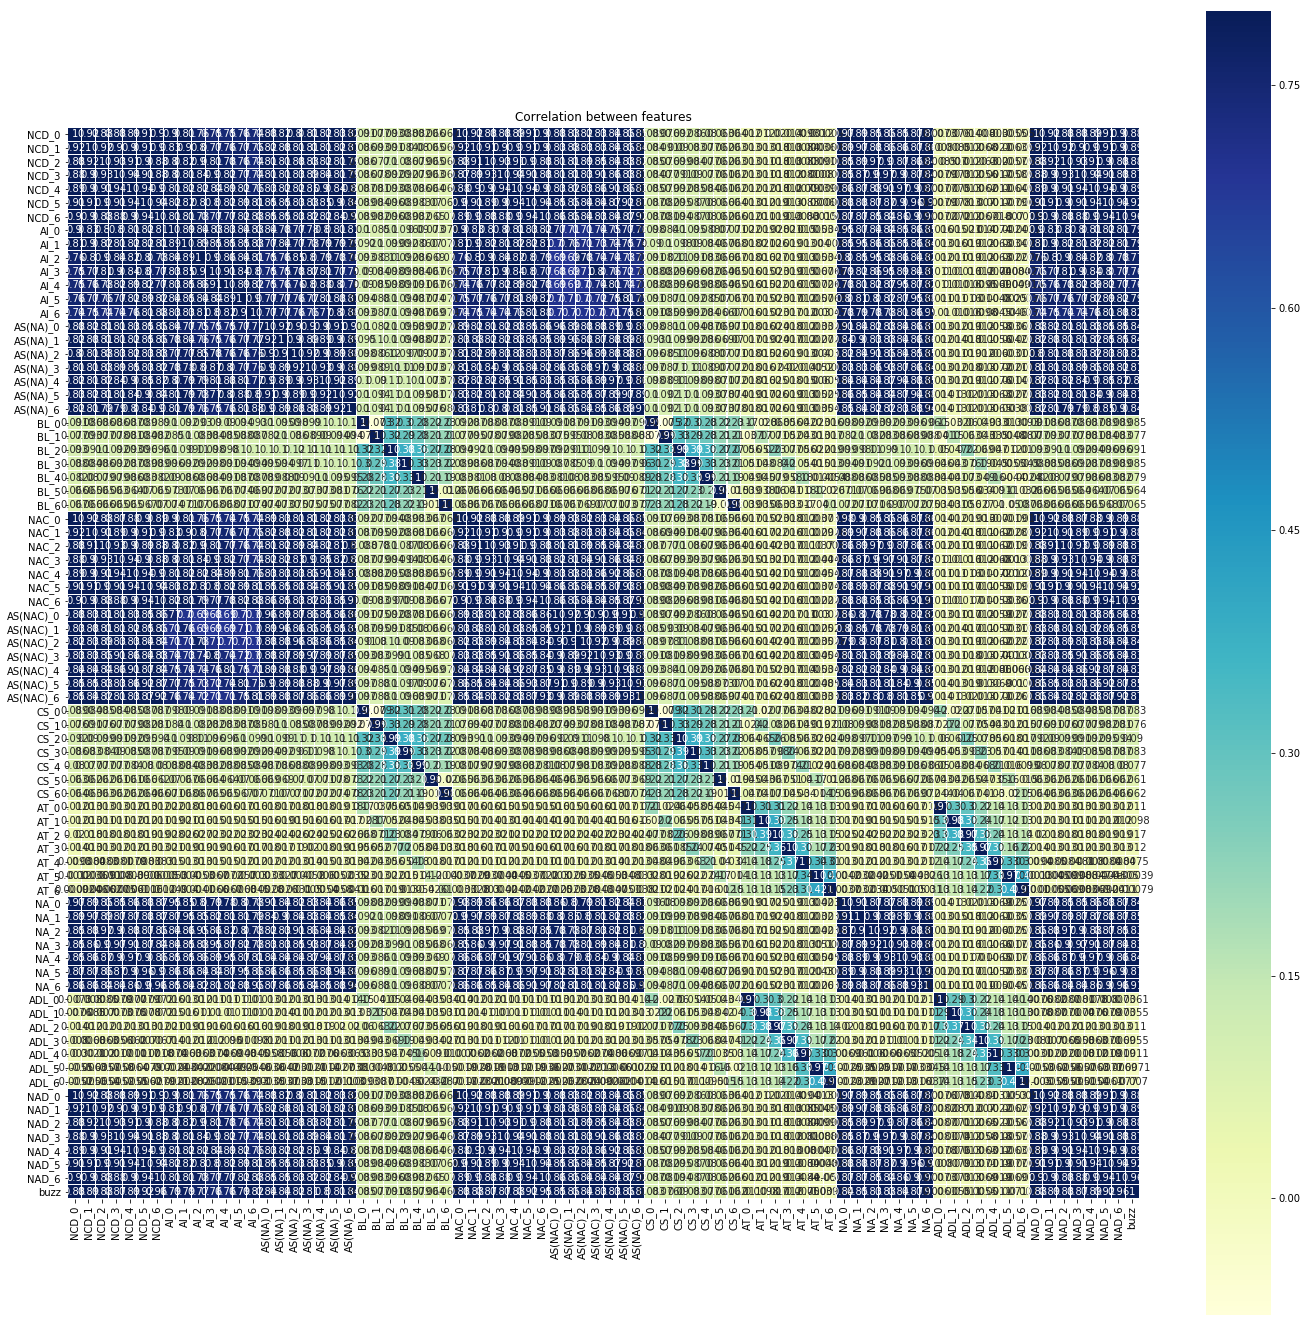

In [21]:
plt.figure(figsize = (24,24))
sns.heatmap(data.corr(), vmax=0.8, linewidths=0.01,
            square=True, annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

 <font color = 'blue'> It can be seen clearly that our data has quite a lot of variables that are correlated with each other. We can notice this with some clear patterns in our correlation matrix. We would ideally expect there to be some correlation in data for an attribute which is collected over t time periods as is the case with some of our variables (NCD, AI, AS(NA), NAC etc). But there are strong correlations between variables(NAC & NAD, AS(NAC) & NAD etc.) as well. There correlation will exist since are variables from the look of it appear to be related to each other. For instance the Number of Created Discussions would infact have an effect on Author Increase.

#### <b> <font color = 'Red'> Looking at the distribution of our all other variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D104C7F748>]],
      dtype=object)

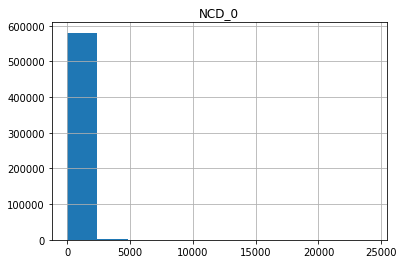

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D104CEDD30>]],
      dtype=object)

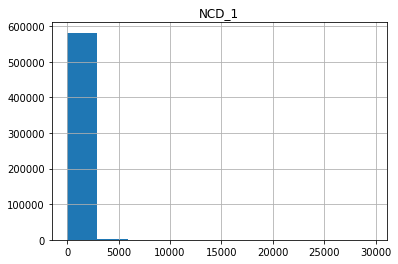

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1050F30F0>]],
      dtype=object)

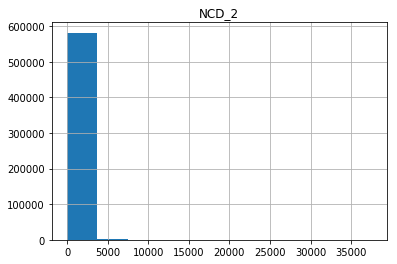

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D105034668>]],
      dtype=object)

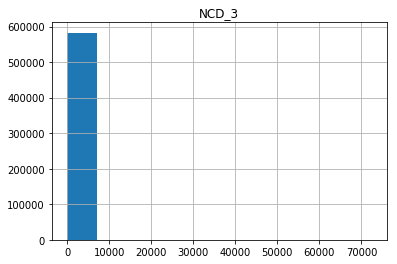

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D105038160>]],
      dtype=object)

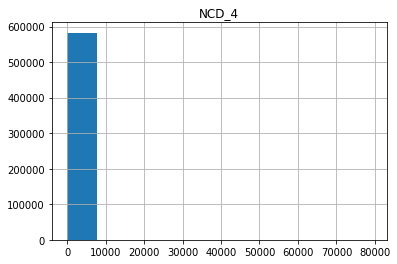

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1021F71D0>]],
      dtype=object)

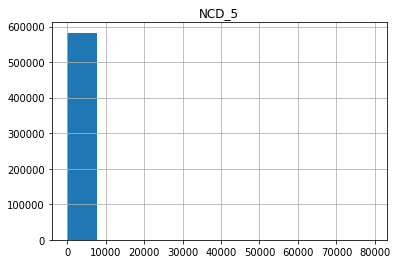

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D10268A710>]],
      dtype=object)

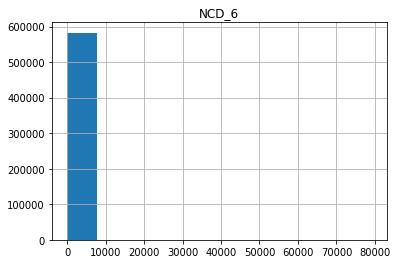

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1022CCF28>]],
      dtype=object)

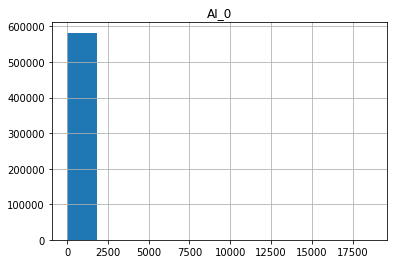

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102340588>]],
      dtype=object)

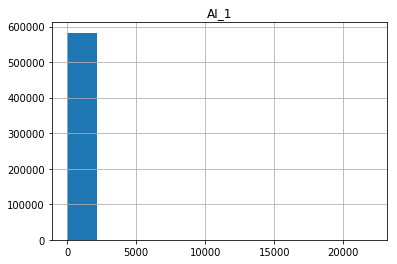

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1023C4BE0>]],
      dtype=object)

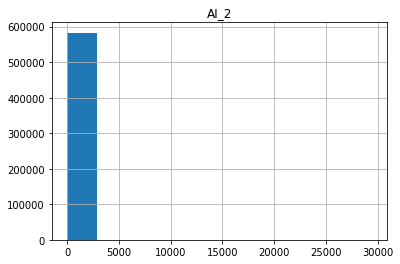

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102468908>]],
      dtype=object)

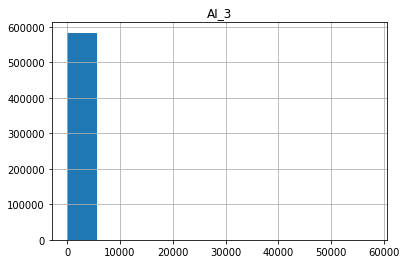

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1024ABDD8>]],
      dtype=object)

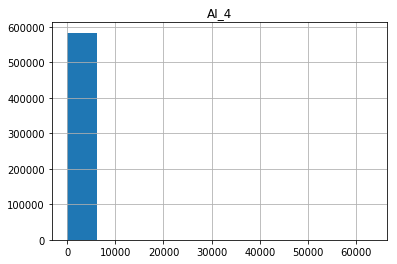

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D10245EA20>]],
      dtype=object)

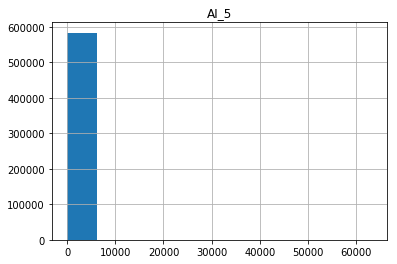

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1023B87B8>]],
      dtype=object)

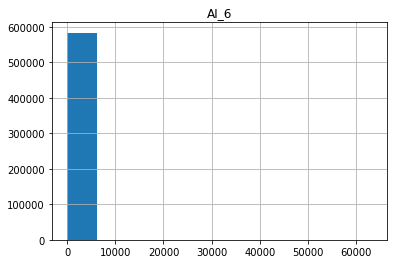

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102276550>]],
      dtype=object)

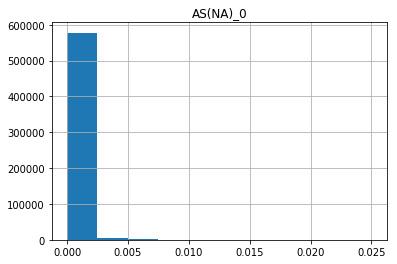

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D100005080>]],
      dtype=object)

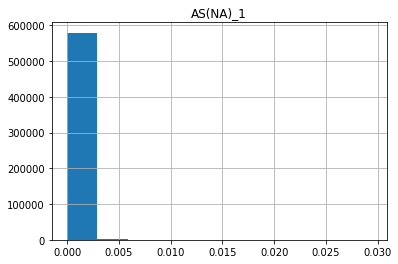

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D100009940>]],
      dtype=object)

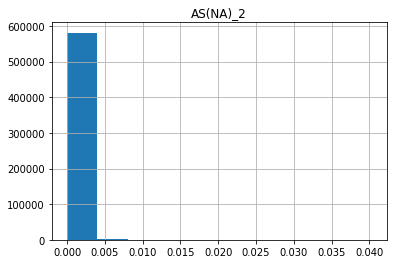

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D100005358>]],
      dtype=object)

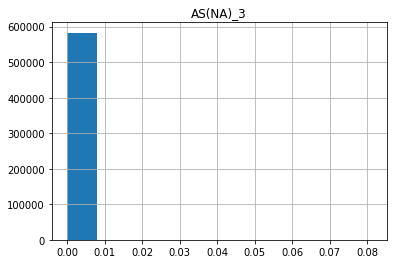

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102D59B70>]],
      dtype=object)

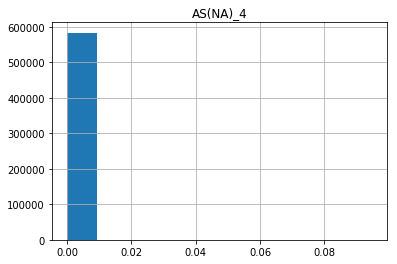

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1020658D0>]],
      dtype=object)

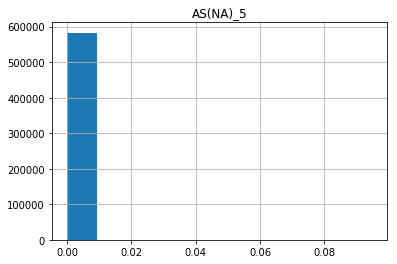

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102065208>]],
      dtype=object)

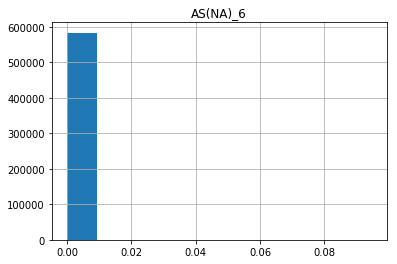

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1022B1EF0>]],
      dtype=object)

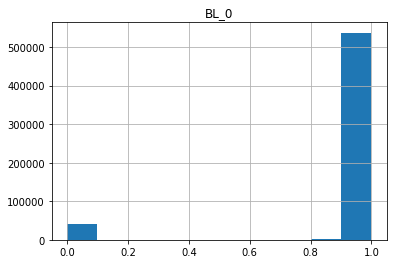

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102D86B70>]],
      dtype=object)

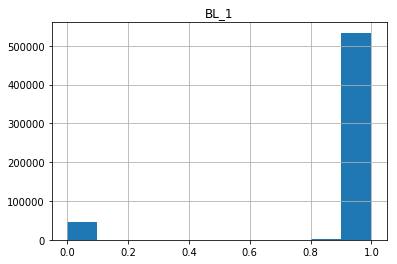

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1050F35C0>]],
      dtype=object)

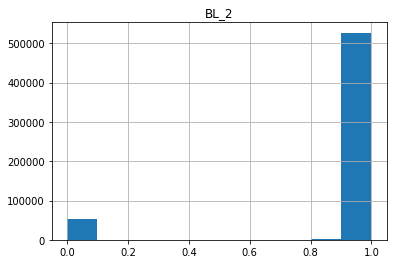

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D105021630>]],
      dtype=object)

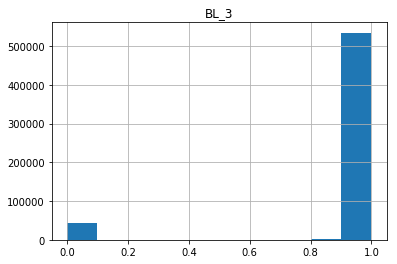

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102AC1A90>]],
      dtype=object)

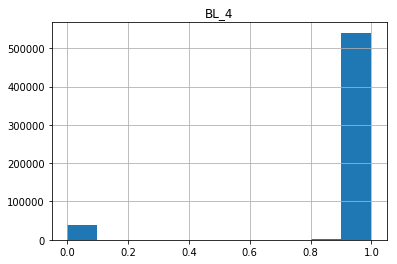

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102128588>]],
      dtype=object)

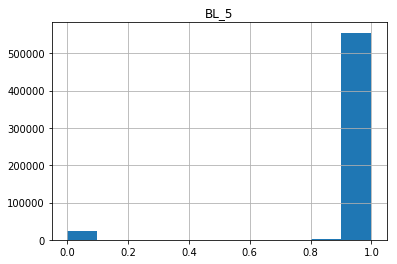

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1050F3978>]],
      dtype=object)

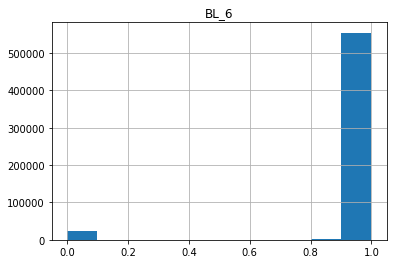

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102226EF0>]],
      dtype=object)

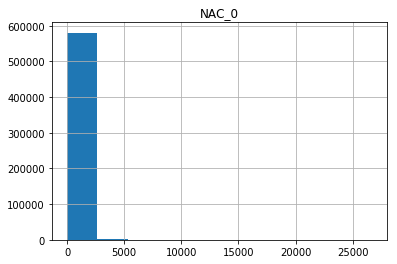

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D100032668>]],
      dtype=object)

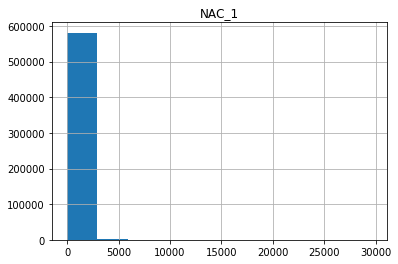

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D162C38C88>]],
      dtype=object)

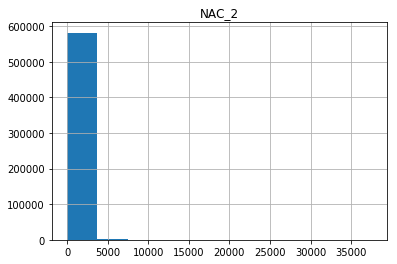

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102DA59E8>]],
      dtype=object)

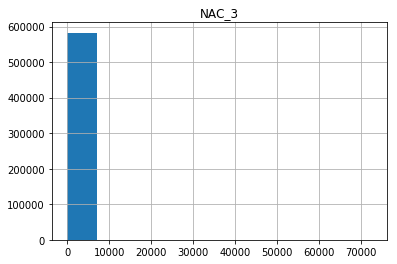

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102078C88>]],
      dtype=object)

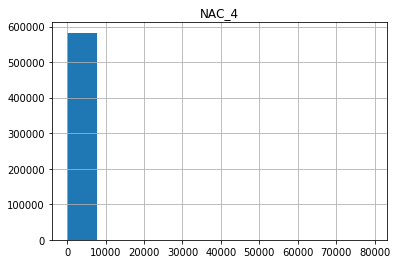

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102DEEFD0>]],
      dtype=object)

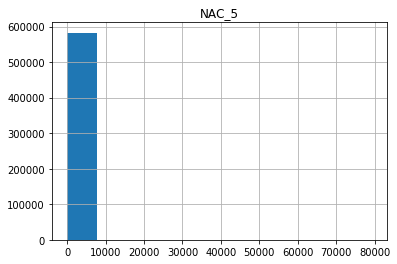

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102DDB080>]],
      dtype=object)

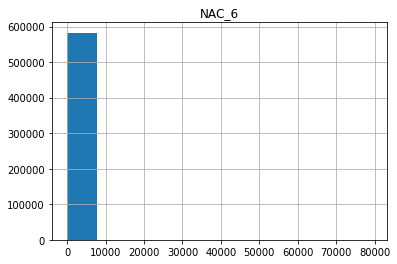

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1023E7CC0>]],
      dtype=object)

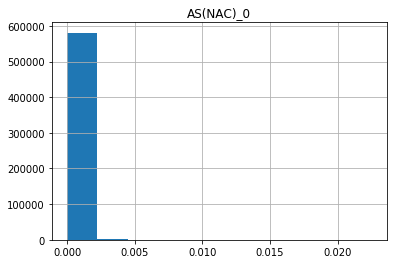

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1022F6BE0>]],
      dtype=object)

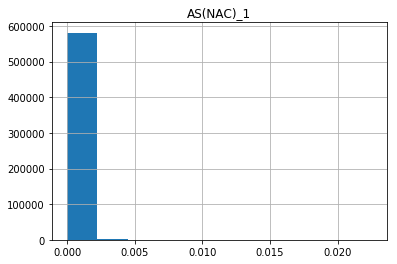

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102361780>]],
      dtype=object)

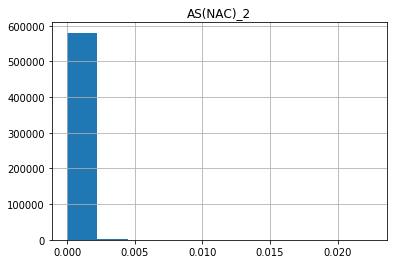

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D10225A0B8>]],
      dtype=object)

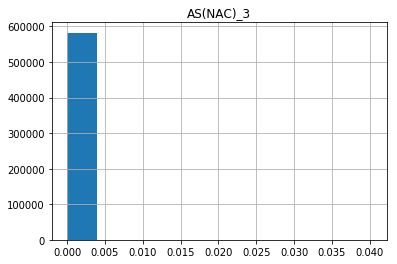

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102185320>]],
      dtype=object)

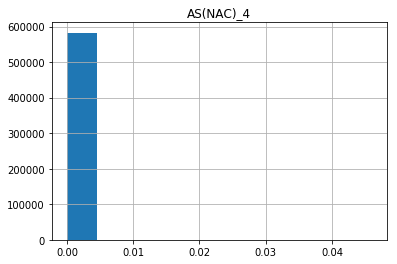

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D10250A898>]],
      dtype=object)

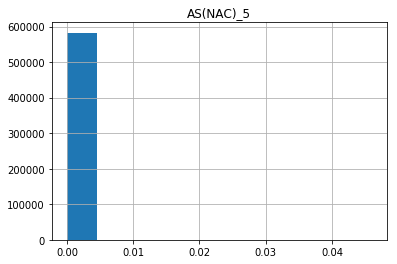

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1022EBA58>]],
      dtype=object)

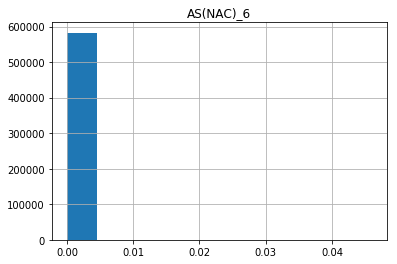

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1023F0A58>]],
      dtype=object)

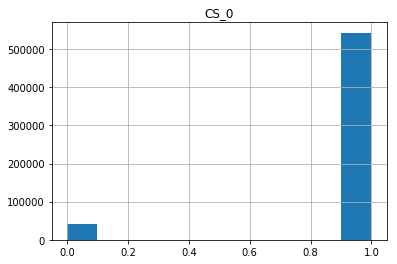

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102DE6208>]],
      dtype=object)

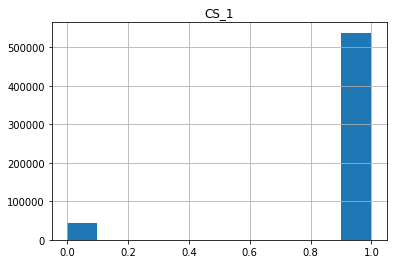

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102D59940>]],
      dtype=object)

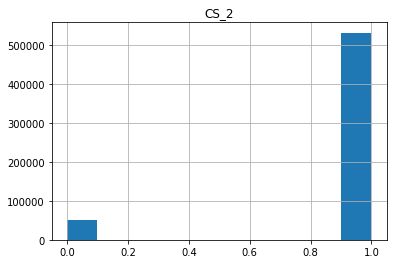

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102DD7898>]],
      dtype=object)

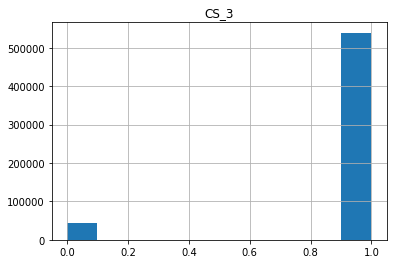

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1022C6240>]],
      dtype=object)

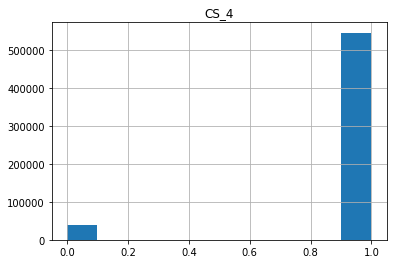

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1022FBCC0>]],
      dtype=object)

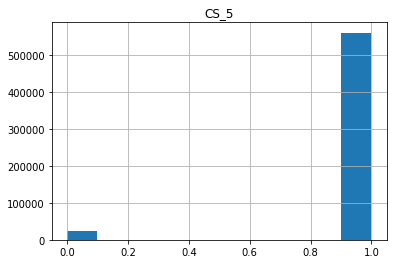

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102384E80>]],
      dtype=object)

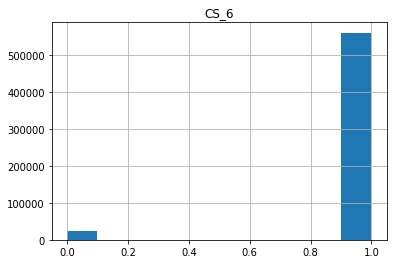

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1020BC438>]],
      dtype=object)

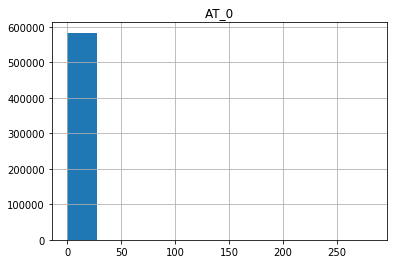

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1050E44A8>]],
      dtype=object)

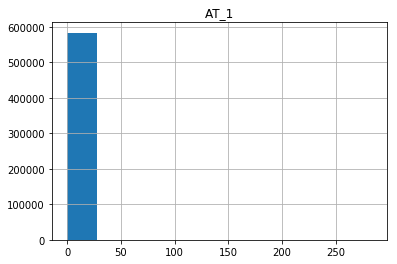

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1022A4CC0>]],
      dtype=object)

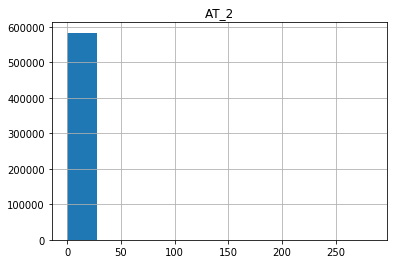

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D10551D518>]],
      dtype=object)

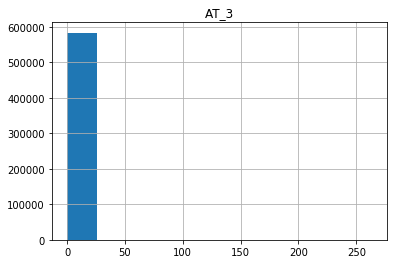

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1022FBC50>]],
      dtype=object)

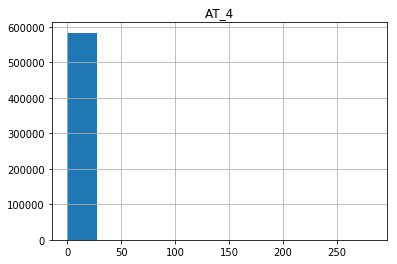

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1021E4438>]],
      dtype=object)

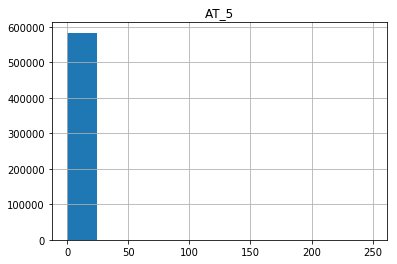

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1021F8BE0>]],
      dtype=object)

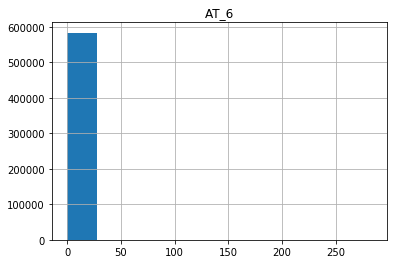

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1020BC518>]],
      dtype=object)

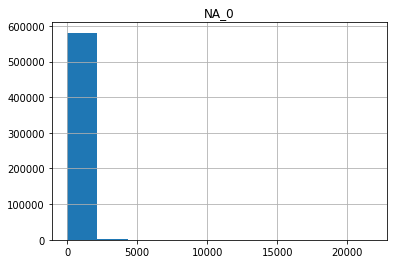

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1605D5978>]],
      dtype=object)

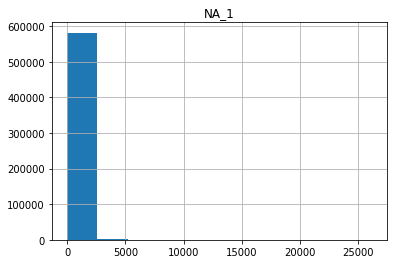

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102DD77B8>]],
      dtype=object)

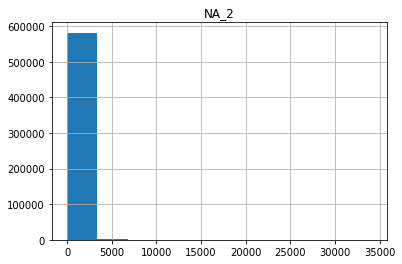

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D100032160>]],
      dtype=object)

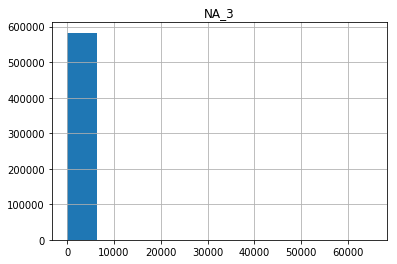

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1021A5048>]],
      dtype=object)

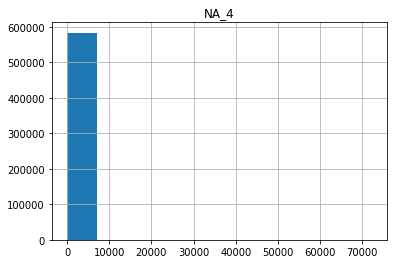

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D104CC9DD8>]],
      dtype=object)

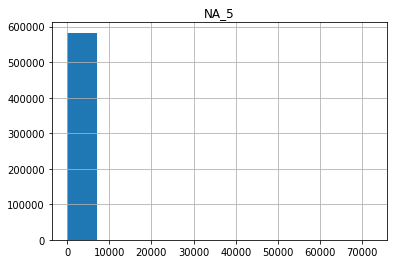

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102D987B8>]],
      dtype=object)

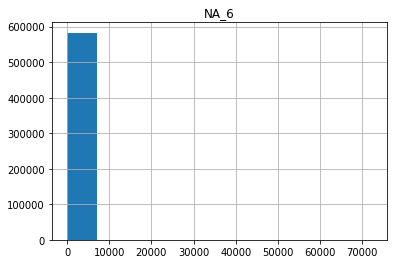

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102DC6B38>]],
      dtype=object)

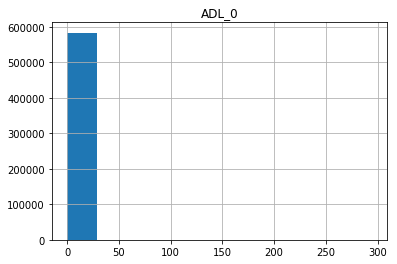

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1023FD400>]],
      dtype=object)

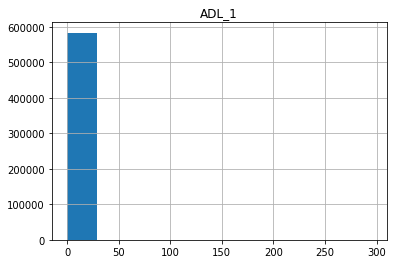

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D10248B908>]],
      dtype=object)

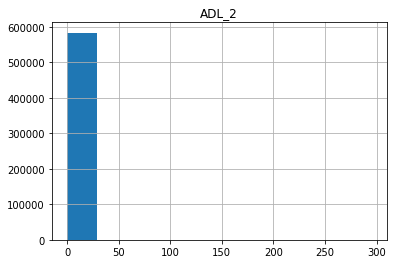

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102342F28>]],
      dtype=object)

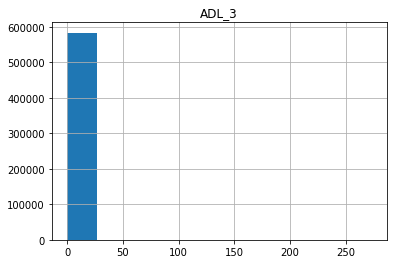

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102440B70>]],
      dtype=object)

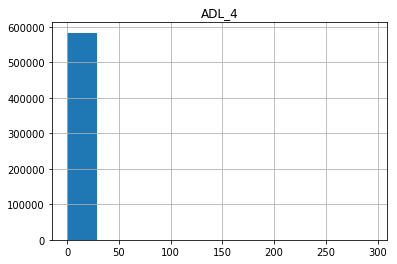

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D10226A320>]],
      dtype=object)

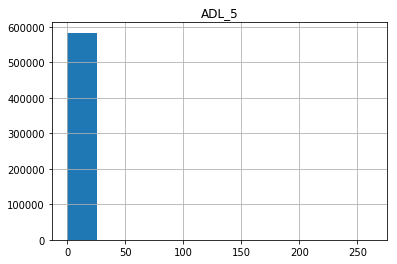

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1024BD518>]],
      dtype=object)

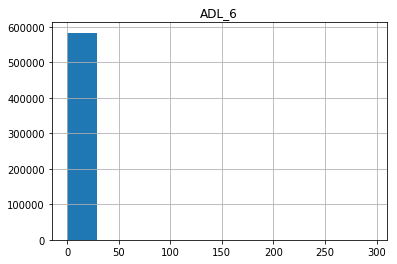

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1022CB780>]],
      dtype=object)

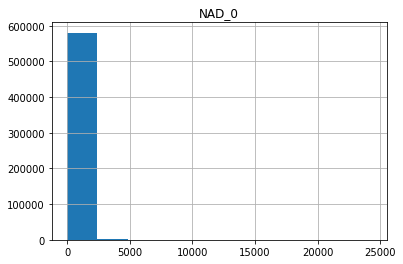

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102DB8518>]],
      dtype=object)

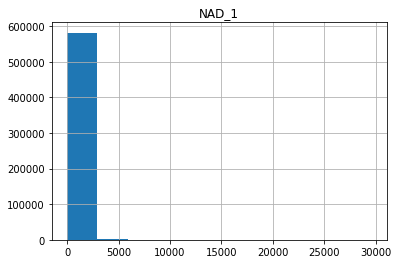

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D10000FEF0>]],
      dtype=object)

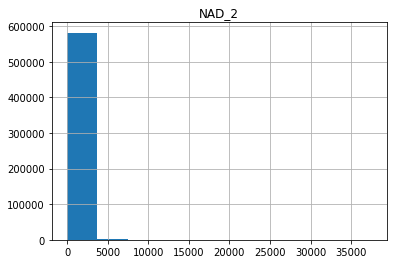

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102DB8240>]],
      dtype=object)

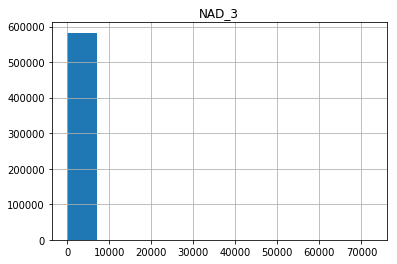

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1023F58D0>]],
      dtype=object)

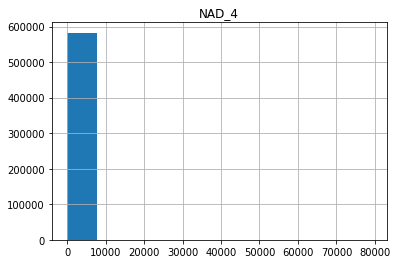

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102140F60>]],
      dtype=object)

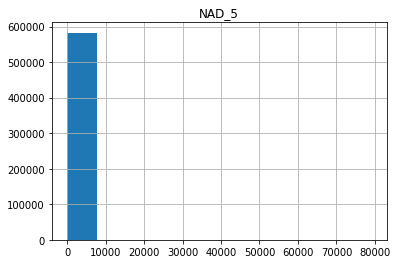

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102DDE7B8>]],
      dtype=object)

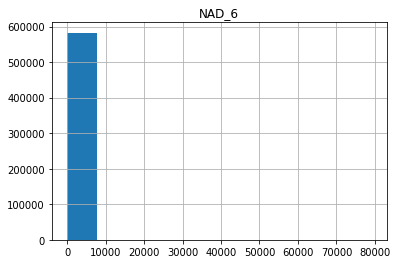

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D102DDE048>]],
      dtype=object)

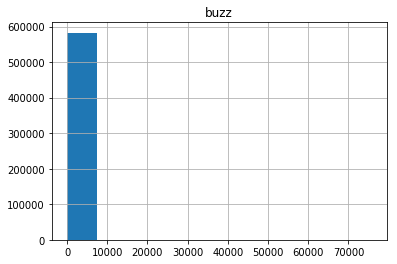

In [18]:
for i in data.columns:
    data.hist(column=i)
    plt.show()

 <font color = 'blue'>  Looking at the distribution of our response variable did not prove helpful as our data is extremely skewed, the standard deviations are very high and the numbers range from 0 to 80000. It is clear that we have quite a lot of outliers in our dataset.

#### <b> <font color = 'Red'> Using IQR we try to count the number of outliers we can in every column in our dataset

In [19]:
data.describe()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6,buzz
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


In [22]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [23]:
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

NCD_0        79878
NCD_1        80382
NCD_2        81462
NCD_3        81434
NCD_4        82010
NCD_5        81819
NCD_6        82162
AI_0         75182
AI_1         75528
AI_2         76659
AI_3         77224
AI_4         78112
AI_5         77998
AI_6         78195
AS(NA)_0     80611
AS(NA)_1     81790
AS(NA)_2     81299
AS(NA)_3     81138
AS(NA)_4     80901
AS(NA)_5     80806
AS(NA)_6     81281
BL_0        134578
BL_1        134224
BL_2        143132
BL_3        140806
BL_4        139082
BL_5        129184
BL_6        131892
NAC_0        79304
NAC_1        80351
             ...  
CS_6         22965
AT_0        125882
AT_1        131422
AT_2        135221
AT_3        126739
AT_4        117746
AT_5        102225
AT_6        102636
NA_0         77947
NA_1         78641
NA_2         79725
NA_3         80314
NA_4         80883
NA_5         80736
NA_6         81212
ADL_0       131251
ADL_1       136415
ADL_2       140616
ADL_3       130105
ADL_4       123493
ADL_5       107158
ADL_6       

 <font color = 'blue'>  We can see that the count of outliers in almost all of our variables in the data set is quite high. For that very reason we will have to use a scaling technique that would help us correct for this. We have selected <b> RobustScaler </b> because even though we have extreme outliers in our data, we believe that they hold importace in our dataset and we don't want to lose any useful information in the process. MinMaxScaler is sensitive to outliers, hence we did not use it. Also, since our variables are not normally distributed, we decided not to use StandardScaler.

### <font color='Red'> Preparing the data for running Machine Learning Models

#### <b> <font color = 'Red'> Random sampling and preparing dataset for test and train split

In [12]:
datanew = data.copy()
X = datanew.drop(columns=['buzz'])
y = datanew['buzz']
X.head()
X.shape
y.shape
y.head()

,NCD_0,NCD_1,NCD_2,NCD_3,NCD_4,NCD_5,NCD_6,AI_0,AI_1,AI_2,...,ADL_4,ADL_5,ADL_6,NAD_0,NAD_1,NAD_2,NAD_3,NAD_4,NAD_5,NAD_6
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,1.0,0,2,0,0,1,1,1
1,2,1,0,0,0,0,4,2,1,0,...,0.0,0.0,1.0,2,1,0,0,0,0,4
2,1,0,0,0,0,4,1,1,0,0,...,0.0,1.0,1.0,1,0,0,0,0,4,1
3,1,0,0,1,0,0,1,1,0,0,...,0.0,0.0,1.0,1,0,0,1,0,0,1
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,1.0,0,1,0,0,1,2,3


(583250, 77)

(583250,)

0    0.0
1    0.5
2    0.0
3    2.5
4    0.5
Name: buzz, dtype: float64

<font color = 'blue'> Since we have too many correlated variables, we have decide to select relevant variables on the basis of the F-value between label/feature for regression tasks.

#### <font color=red> Dividing Data into X and Y and then splitting the dataset into train and test dataset and then normalizing it
As we saw above from the distribution, we need to scale the data to understand the effect of variables on the response variable 'buzz'.


In [8]:
from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)
sample_data.shape
sample_target.shape

(58325, 77)

(58325,)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sample_data,sample_target, test_size = 0.33, random_state = 10)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(39077, 77)

(19248, 77)

(39077,)

(19248,)

#### <font color=red> Scaling Data using RobustScaler Scaler 
<font color = 'blue'>  We can see that the count of outliers in almost all of our variables in the data set is quite high. For that very reason we will have to use a scaling technique that would help us correct for this. We have selected <font color = 'RED'> <b> RobustScaler </b> </font> because even though we have extreme outliers in our data, we believe that they hold importace in our dataset and we don't want to lose any useful information in the process. MinMaxScaler is sensitive to outliers, hence we did not use it. Also, since our variables are not normally distributed, we decided not to use StandardScaler. Also, as can be seen below in the histograms, I think that robust scaler does the best job in retaining characteristics of our variables
    

(39077, 77)

(19248, 77)

(array([70.,  2.,  1.,  0.,  1.,  0.,  2.,  0.,  0.,  1.]),
 array([-0.18604651,  1.23881693,  2.66368037,  4.08854381,  5.51340725,
         6.93827069,  8.36313413,  9.78799757, 11.21286101, 12.63772445,
        14.06258789]),
 <a list of 10 Patch objects>)

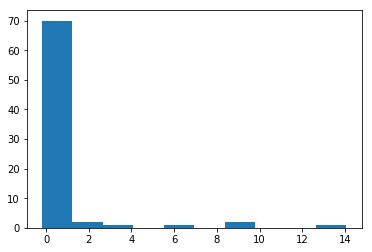

(array([ 5.,  7., 16., 12.,  4.,  5.,  0.,  0.,  0., 28.]),
 array([-0.17045455, -0.15340909, -0.13636364, -0.11931818, -0.10227273,
        -0.08522727, -0.06818182, -0.05113636, -0.03409091, -0.01704545,
         0.        ]),
 <a list of 10 Patch objects>)

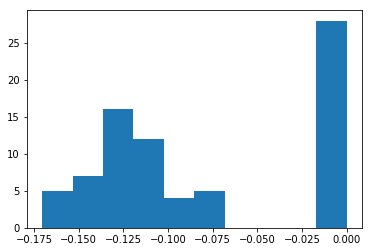

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  2., 24., 44.,  5.]),
 array([-17.8107078 , -15.407654  , -13.00460019, -10.60154639,
         -8.19849259,  -5.79543879,  -3.39238499,  -0.98933119,
          1.41372262,   3.81677642,   6.21983022]),
 <a list of 10 Patch objects>)

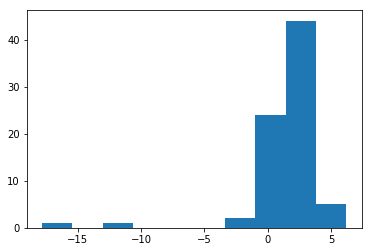

(array([ 3.,  1.,  1.,  2.,  1.,  0.,  0.,  0.,  0., 69.]),
 array([-19.55569462, -17.60012516, -15.64455569, -13.68898623,
        -11.73341677,  -9.77784731,  -7.82227785,  -5.86670839,
         -3.91113892,  -1.95556946,   0.        ]),
 <a list of 10 Patch objects>)

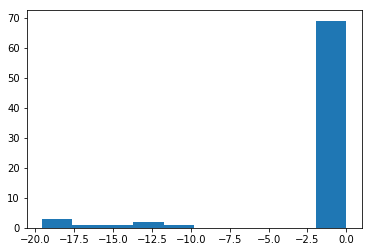

(array([30.,  2.,  8.,  7.,  9.,  7.,  5.,  4.,  2.,  3.]),
 array([0.        , 0.09206349, 0.18412698, 0.27619048, 0.36825397,
        0.46031746, 0.55238095, 0.64444444, 0.73650794, 0.82857143,
        0.92063492]),
 <a list of 10 Patch objects>)

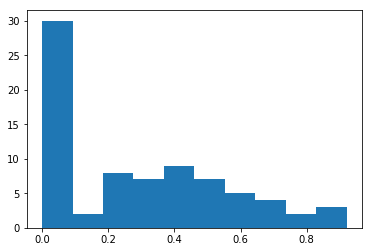

(array([28.,  0.,  0.,  0., 11., 10.,  0., 12., 10.,  6.]),
 array([-2.65400000e-03,  5.67336898e+00,  1.13493920e+01,  1.70254149e+01,
         2.27014379e+01,  2.83774609e+01,  3.40534839e+01,  3.97295068e+01,
         4.54055298e+01,  5.10815528e+01,  5.67575758e+01]),
 <a list of 10 Patch objects>)

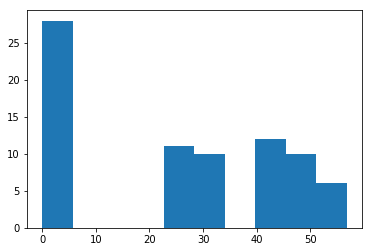

(array([ 9.,  5.,  6., 12., 10.,  6.,  0.,  0.,  1., 28.]),
 array([-0.1744186 , -0.15697674, -0.13953488, -0.12209302, -0.10465116,
        -0.0872093 , -0.06976744, -0.05232558, -0.03488372, -0.01744186,
         0.        ]),
 <a list of 10 Patch objects>)

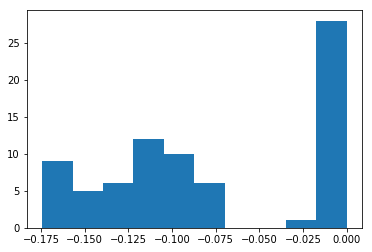

(array([24., 47.,  0.,  0.,  1.,  2.,  1.,  1.,  0.,  1.]),
 array([-0.1375    , -0.01691666,  0.10366669,  0.22425003,  0.34483337,
         0.46541672,  0.58600006,  0.70658341,  0.82716675,  0.94775009,
         1.06833344]),
 <a list of 10 Patch objects>)

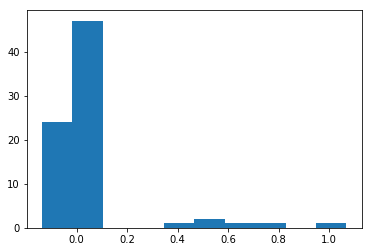

(array([14., 22., 12.,  1.,  0.,  0.,  0.,  0.,  0., 28.]),
 array([-0.18181818, -0.16363636, -0.14545455, -0.12727273, -0.10909091,
        -0.09090909, -0.07272727, -0.05454545, -0.03636364, -0.01818182,
         0.        ]),
 <a list of 10 Patch objects>)

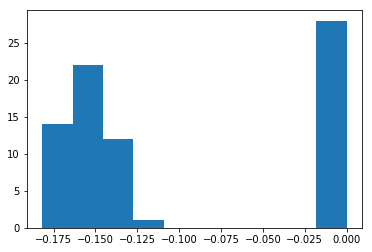

(array([17.,  5.,  6.,  1., 14., 15., 13.,  0.,  0.,  6.]),
 array([-0.019231  ,  0.48147259,  0.98217618,  1.48287976,  1.98358335,
         2.48428694,  2.98499053,  3.48569411,  3.9863977 ,  4.48710129,
         4.98780488]),
 <a list of 10 Patch objects>)

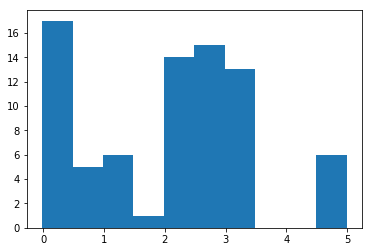

(array([42., 15., 11.,  5.,  1.,  1.,  0.,  0.,  0.,  2.]),
 array([-0.12790698,  0.22774262,  0.58339221,  0.93904181,  1.29469141,
         1.650341  ,  2.0059906 ,  2.36164019,  2.71728979,  3.07293938,
         3.42858898]),
 <a list of 10 Patch objects>)

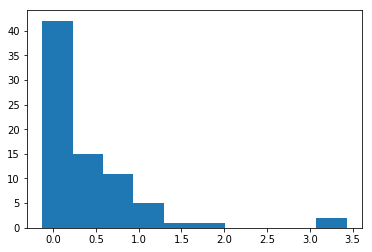

(array([67.,  1.,  4.,  0.,  0.,  0.,  0.,  3.,  1.,  1.]),
 array([-0.13636364,  0.30341227,  0.74318817,  1.18296407,  1.62273997,
         2.06251587,  2.50229178,  2.94206768,  3.38184358,  3.82161948,
         4.26139538]),
 <a list of 10 Patch objects>)

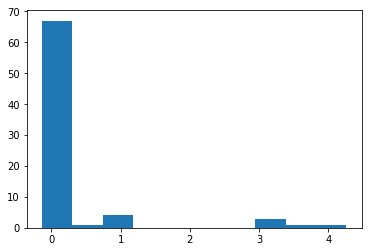

(array([24.,  9.,  6., 28.,  1.,  0.,  4.,  2.,  1.,  2.]),
 array([-0.17460317, -0.1278974 , -0.08119162, -0.03448585,  0.01221993,
         0.05892571,  0.10563148,  0.15233726,  0.19904303,  0.24574881,
         0.29245458]),
 <a list of 10 Patch objects>)

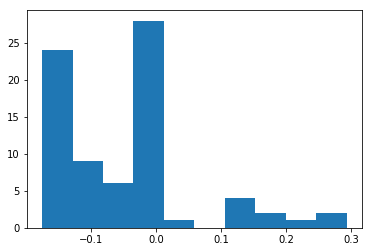

(array([73.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  2.]),
 array([-1.92310000e-02,  8.67005631e+00,  1.73593436e+01,  2.60486309e+01,
         3.47379182e+01,  4.34272055e+01,  5.21164929e+01,  6.08057802e+01,
         6.94950675e+01,  7.81843548e+01,  8.68736421e+01]),
 <a list of 10 Patch objects>)

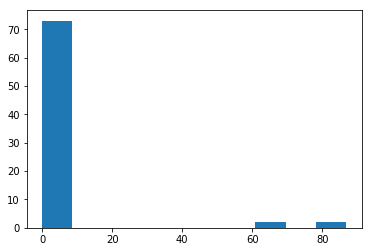

(array([28.,  0.,  5., 10.,  8.,  8.,  7.,  5.,  2.,  4.]),
 array([0.        , 0.89032258, 1.78064516, 2.67096774, 3.56129032,
        4.4516129 , 5.34193548, 6.23225806, 7.12258065, 8.01290323,
        8.90322581]),
 <a list of 10 Patch objects>)

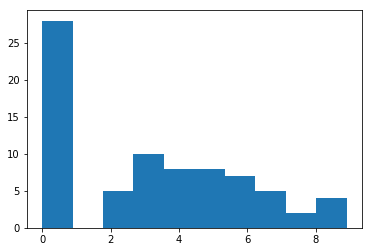

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 75.]),
 array([-18.5000185 , -16.65001665, -14.8000148 , -12.95001295,
        -11.1000111 ,  -9.25000925,  -7.4000074 ,  -5.55000555,
         -3.7000037 ,  -1.85000185,   0.        ]),
 <a list of 10 Patch objects>)

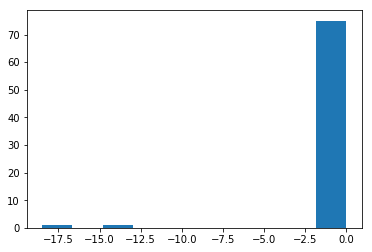

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., 75.]),
 array([-15.81252668, -14.23127402, -12.65002135, -11.06876868,
         -9.48751601,  -7.90626334,  -6.32501067,  -4.74375801,
         -3.16250534,  -1.58125267,   0.        ]),
 <a list of 10 Patch objects>)

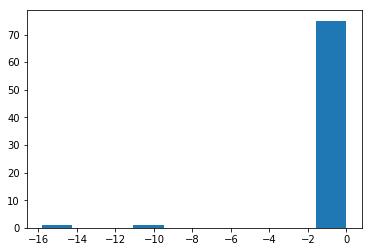

(array([46., 23.,  3.,  2.,  0.,  1.,  0.,  1.,  0.,  1.]),
 array([-0.076923  ,  0.53248238,  1.14188776,  1.75129314,  2.36069852,
         2.97010389,  3.57950927,  4.18891465,  4.79832003,  5.40772541,
         6.01713079]),
 <a list of 10 Patch objects>)

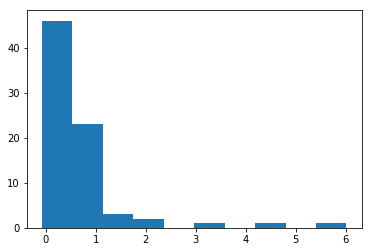

(array([20.,  5.,  8., 21., 11.,  8.,  1.,  2.,  0.,  1.]),
 array([-0.013699  ,  0.07458423,  0.16286746,  0.25115069,  0.33943392,
         0.42771715,  0.51600037,  0.6042836 ,  0.69256683,  0.78085006,
         0.86913329]),
 <a list of 10 Patch objects>)

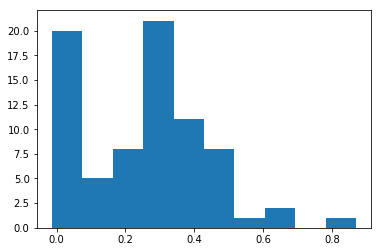

(array([70.,  4.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([-0.333333  ,  5.47777763, 11.28888827, 17.0999989 , 22.91110953,
        28.72222017, 34.5333308 , 40.34444143, 46.15555207, 51.9666627 ,
        57.77777333]),
 <a list of 10 Patch objects>)

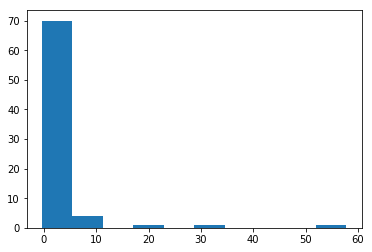

(array([18.,  9.,  1.,  7., 15., 16.,  4.,  4.,  1.,  2.]),
 array([-0.006803  ,  0.40975032,  0.82630363,  1.24285695,  1.65941026,
         2.07596358,  2.4925169 ,  2.90907021,  3.32562353,  3.74217684,
         4.15873016]),
 <a list of 10 Patch objects>)

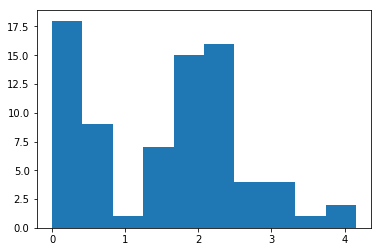

(array([28.,  0.,  3.,  6., 16.,  9.,  9.,  3.,  1.,  2.]),
 array([-5.13000000e-04,  3.38135648e+00,  6.76322596e+00,  1.01450954e+01,
         1.35269649e+01,  1.69088344e+01,  2.02907039e+01,  2.36725734e+01,
         2.70544429e+01,  3.04363123e+01,  3.38181818e+01]),
 <a list of 10 Patch objects>)

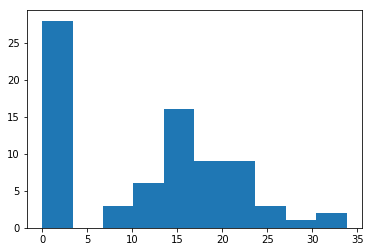

(array([75.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([-0.2       ,  0.13625053,  0.47250107,  0.8087516 ,  1.14500213,
         1.48125267,  1.8175032 ,  2.15375374,  2.49000427,  2.8262548 ,
         3.16250534]),
 <a list of 10 Patch objects>)

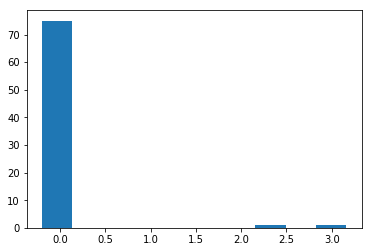

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 75.]),
 array([-18.5000185 , -16.65001665, -14.8000148 , -12.95001295,
        -11.1000111 ,  -9.25000925,  -7.4000074 ,  -5.55000555,
         -3.7000037 ,  -1.85000185,   0.        ]),
 <a list of 10 Patch objects>)

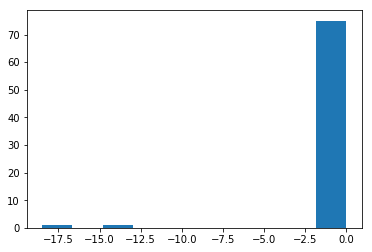

(array([ 2.,  2.,  2.,  4., 15., 16.,  8.,  0.,  0., 28.]),
 array([-0.19047619, -0.17142857, -0.15238095, -0.13333333, -0.11428571,
        -0.0952381 , -0.07619048, -0.05714286, -0.03809524, -0.01904762,
         0.        ]),
 <a list of 10 Patch objects>)

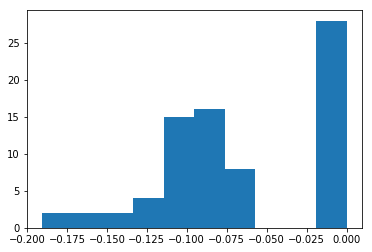

(array([14.,  2.,  9., 40.,  1.,  5.,  1.,  1.,  3.,  1.]),
 array([-0.18571429, -0.12877076, -0.07182724, -0.01488372,  0.0420598 ,
         0.09900332,  0.15594684,  0.21289037,  0.26983389,  0.32677741,
         0.38372093]),
 <a list of 10 Patch objects>)

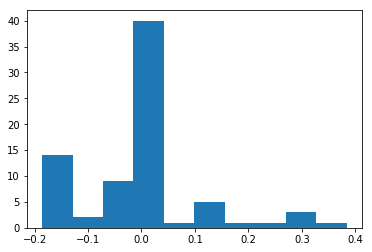

(array([ 2., 14., 18.,  5.,  3.,  2.,  0.,  2., 30.,  1.]),
 array([-0.18571429, -0.1625974 , -0.13948052, -0.11636364, -0.09324675,
        -0.07012987, -0.04701299, -0.0238961 , -0.00077922,  0.02233766,
         0.04545455]),
 <a list of 10 Patch objects>)

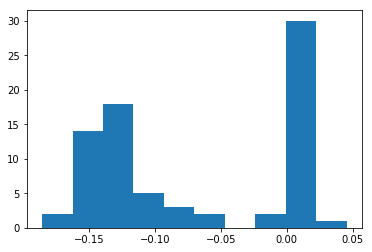

(array([71.,  0.,  0.,  0.,  2.,  1.,  0.,  1.,  1.,  1.]),
 array([-0.19767442,  2.04431569,  4.2863058 ,  6.52829591,  8.77028602,
        11.01227612, 13.25426623, 15.49625634, 17.73824645, 19.98023656,
        22.22222667]),
 <a list of 10 Patch objects>)

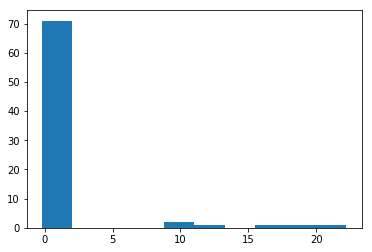

(array([69.,  0.,  0.,  2.,  1.,  0.,  0.,  2.,  1.,  2.]),
 array([-0.175     ,  0.40094339,  0.97688679,  1.55283018,  2.12877357,
         2.70471697,  3.28066036,  3.85660375,  4.43254715,  5.00849054,
         5.58443393]),
 <a list of 10 Patch objects>)

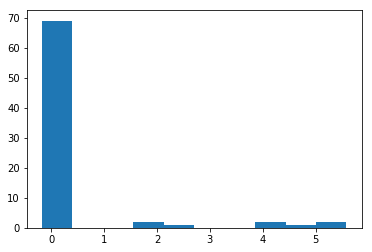

(array([28.,  0.,  3., 11.,  8.,  8., 11.,  6.,  1.,  1.]),
 array([0.        , 0.55789474, 1.11578947, 1.67368421, 2.23157895,
        2.78947368, 3.34736842, 3.90526316, 4.46315789, 5.02105263,
        5.57894737]),
 <a list of 10 Patch objects>)

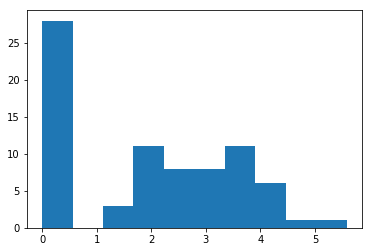

(array([24., 35.,  7.,  5.,  3.,  1.,  0.,  0.,  0.,  2.]),
 array([-0.011111  ,  0.2450748 ,  0.50126061,  0.75744641,  1.01363221,
         1.26981801,  1.52600382,  1.78218962,  2.03837542,  2.29456122,
         2.55074703]),
 <a list of 10 Patch objects>)

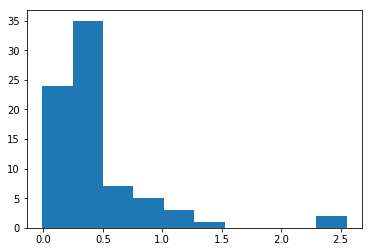

(array([ 2.,  1.,  2.,  1.,  2.,  0.,  0.,  0.,  0., 69.]),
 array([-19.55569462, -17.60012516, -15.64455569, -13.68898623,
        -11.73341677,  -9.77784731,  -7.82227785,  -5.86670839,
         -3.91113892,  -1.95556946,   0.        ]),
 <a list of 10 Patch objects>)

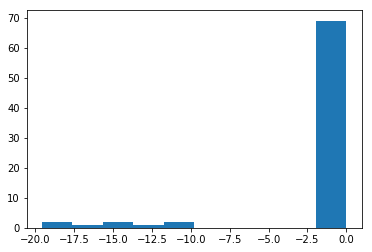

(array([ 1.,  2.,  4.,  8.,  3.,  6., 12.,  4.,  3., 34.]),
 array([-0.14285714, -0.127852  , -0.11284687, -0.09784173, -0.08283659,
        -0.06783145, -0.05282631, -0.03782117, -0.02281603, -0.00781089,
         0.00719424]),
 <a list of 10 Patch objects>)

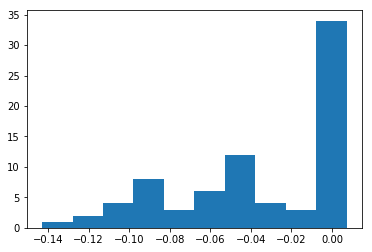

(array([26.,  2.,  6., 11.,  7., 15.,  7.,  1.,  1.,  1.]),
 array([-5.78000000e-03,  6.23369429e-01,  1.25251886e+00,  1.88166829e+00,
         2.51081771e+00,  3.13996714e+00,  3.76911657e+00,  4.39826600e+00,
         5.02741543e+00,  5.65656486e+00,  6.28571429e+00]),
 <a list of 10 Patch objects>)

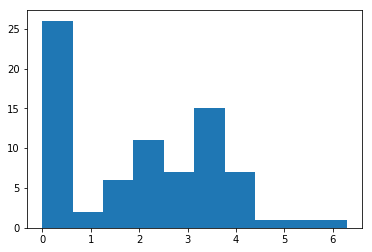

(array([ 3.,  1.,  1.,  3.,  0.,  0.,  0.,  0.,  0., 69.]),
 array([-18.75011719, -16.87510547, -15.00009375, -13.12508203,
        -11.25007031,  -9.37505859,  -7.50004688,  -5.62503516,
         -3.75002344,  -1.87501172,   0.        ]),
 <a list of 10 Patch objects>)

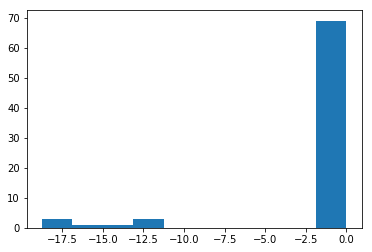

(array([71.,  1.,  2.,  0.,  0.,  0.,  0.,  2.,  0.,  1.]),
 array([-0.1627907 ,  0.48706391,  1.13691852,  1.78677313,  2.43662774,
         3.08648235,  3.73633696,  4.38619157,  5.03604618,  5.68590079,
         6.3357554 ]),
 <a list of 10 Patch objects>)

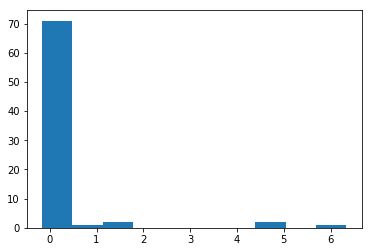

(array([ 2.,  2.,  1.,  1.,  2.,  0.,  0.,  0.,  0., 69.]),
 array([-19.55569462, -17.60012516, -15.64455569, -13.68898623,
        -11.73341677,  -9.77784731,  -7.82227785,  -5.86670839,
         -3.91113892,  -1.95556946,   0.        ]),
 <a list of 10 Patch objects>)

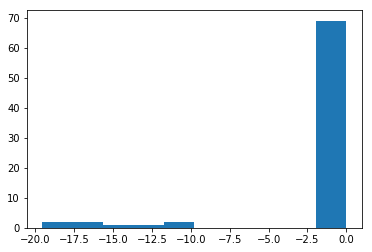

(array([54.,  3.,  8.,  4.,  2.,  2.,  2.,  0.,  1.,  1.]),
 array([0.        , 0.20222222, 0.40444444, 0.60666667, 0.80888889,
        1.01111111, 1.21333333, 1.41555556, 1.61777778, 1.82      ,
        2.02222222]),
 <a list of 10 Patch objects>)

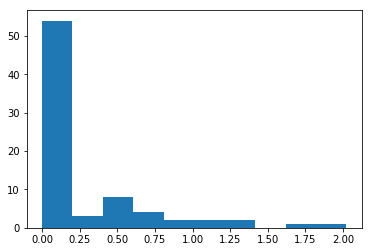

(array([18., 21., 16.,  6.,  2.,  0.,  1.,  9.,  2.,  2.]),
 array([-0.010152  ,  0.74700355,  1.5041591 ,  2.26131465,  3.0184702 ,
         3.77562575,  4.53278131,  5.28993686,  6.04709241,  6.80424796,
         7.56140351]),
 <a list of 10 Patch objects>)

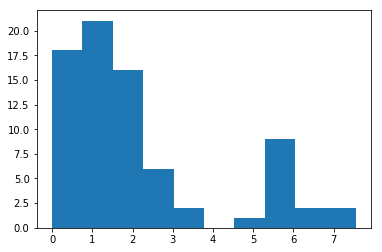

(array([ 8., 15.,  6., 35.,  3.,  5.,  0.,  0.,  3.,  2.]),
 array([-0.09090909, -0.06422559, -0.03754209, -0.01085859,  0.01582492,
         0.04250842,  0.06919192,  0.09587542,  0.12255892,  0.14924242,
         0.17592593]),
 <a list of 10 Patch objects>)

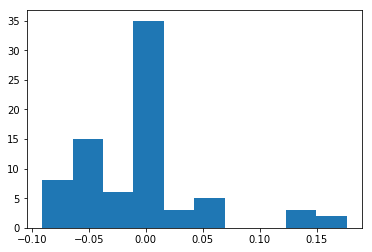

(array([ 3.,  0.,  1.,  2.,  0.,  0.,  0.,  0.,  0., 71.]),
 array([-18.5000185 , -16.65001665, -14.8000148 , -12.95001295,
        -11.1000111 ,  -9.25000925,  -7.4000074 ,  -5.55000555,
         -3.7000037 ,  -1.85000185,   0.        ]),
 <a list of 10 Patch objects>)

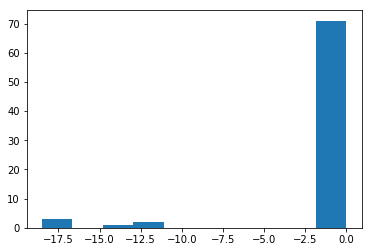

(array([ 7., 27.,  8.,  2.,  4.,  1.,  0.,  0.,  0., 28.]),
 array([-0.18604651, -0.16744186, -0.14883721, -0.13023256, -0.11162791,
        -0.09302326, -0.0744186 , -0.05581395, -0.0372093 , -0.01860465,
         0.        ]),
 <a list of 10 Patch objects>)

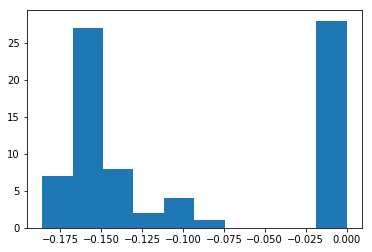

(array([69.,  1.,  0.,  2.,  0.,  1.,  3.,  0.,  0.,  1.]),
 array([-1.02040000e-02,  1.75956640e+00,  3.52933680e+00,  5.29910720e+00,
         7.06887760e+00,  8.83864800e+00,  1.06084184e+01,  1.23781888e+01,
         1.41479592e+01,  1.59177296e+01,  1.76875000e+01]),
 <a list of 10 Patch objects>)

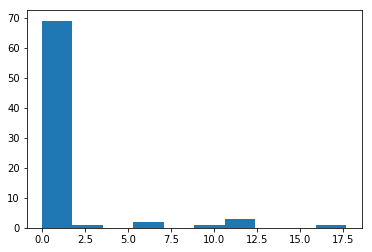

(array([ 1.,  1.,  0.,  0.,  0., 34., 27.,  8.,  4.,  2.]),
 array([-18.75011719, -15.31146947, -11.87282175,  -8.43417403,
         -4.99552631,  -1.55687859,   1.88176912,   5.32041684,
          8.75906456,  12.19771228,  15.63636   ]),
 <a list of 10 Patch objects>)

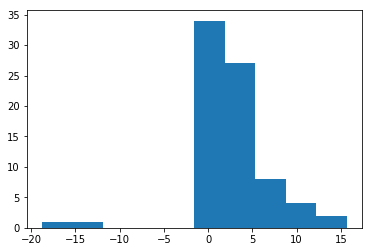

(array([14.,  4.,  4.,  5.,  6., 10.,  6., 10., 10.,  8.]),
 array([-1.47700000e-02,  1.75305315e+00,  3.52087631e+00,  5.28869946e+00,
         7.05652262e+00,  8.82434577e+00,  1.05921689e+01,  1.23599921e+01,
         1.41278152e+01,  1.58956384e+01,  1.76634615e+01]),
 <a list of 10 Patch objects>)

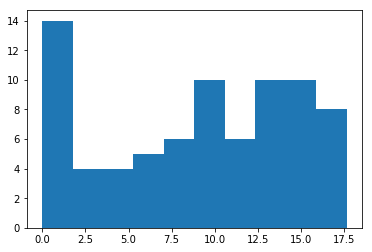

(array([65.,  5.,  0.,  2.,  0.,  3.,  1.,  0.,  0.,  1.]),
 array([-0.06504065,  1.84646341,  3.75796748,  5.66947154,  7.58097561,
         9.49247967, 11.40398374, 13.3154878 , 15.22699187, 17.13849593,
        19.05      ]),
 <a list of 10 Patch objects>)

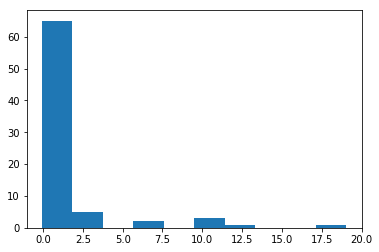

(array([32.,  3.,  3., 10., 10.,  9.,  6.,  1.,  2.,  1.]),
 array([ 0.        ,  2.17818182,  4.35636364,  6.53454545,  8.71272727,
        10.89090909, 13.06909091, 15.24727273, 17.42545455, 19.60363636,
        21.78181818]),
 <a list of 10 Patch objects>)

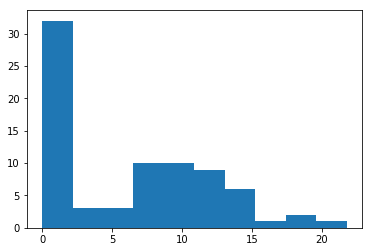

(array([ 1.,  1.,  0.,  0., 73.,  0.,  1.,  0.,  0.,  1.]),
 array([-16.75013819, -12.91955708,  -9.08897597,  -5.25839486,
         -1.42781375,   2.40276736,   6.23334847,  10.06392958,
         13.89451069,  17.7250918 ,  21.55567291]),
 <a list of 10 Patch objects>)

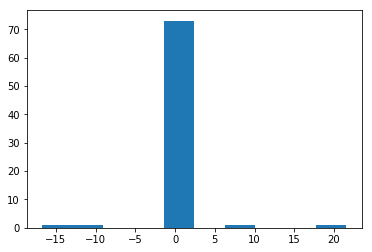

(array([ 7.,  8., 20.,  8.,  5.,  1.,  0.,  0.,  0., 28.]),
 array([-0.19767442, -0.17790698, -0.15813953, -0.13837209, -0.11860465,
        -0.09883721, -0.07906977, -0.05930233, -0.03953488, -0.01976744,
         0.        ]),
 <a list of 10 Patch objects>)

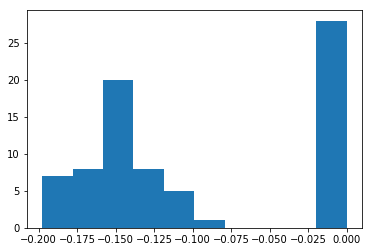

(array([67.,  2.,  0.,  0.,  1.,  2.,  1.,  1.,  2.,  1.]),
 array([-0.10526316,  1.5382692 ,  3.18180157,  4.82533393,  6.46886629,
         8.11239865,  9.75593102, 11.39946338, 13.04299574, 14.6865281 ,
        16.33006046]),
 <a list of 10 Patch objects>)

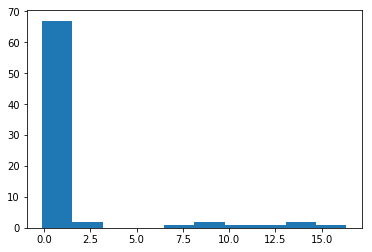

(array([29., 18.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 28.]),
 array([-0.17857143, -0.16071429, -0.14285714, -0.125     , -0.10714286,
        -0.08928571, -0.07142857, -0.05357143, -0.03571429, -0.01785714,
         0.        ]),
 <a list of 10 Patch objects>)

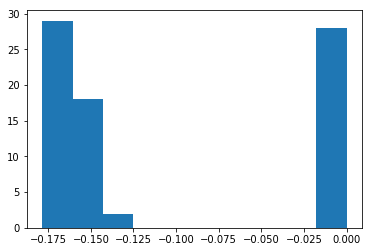

(array([21., 14., 26.,  4.,  9.,  2.,  0.,  0.,  0.,  1.]),
 array([-0.028571  ,  0.23259892,  0.49376883,  0.75493875,  1.01610867,
         1.27727859,  1.5384485 ,  1.79961842,  2.06078834,  2.32195826,
         2.58312817]),
 <a list of 10 Patch objects>)

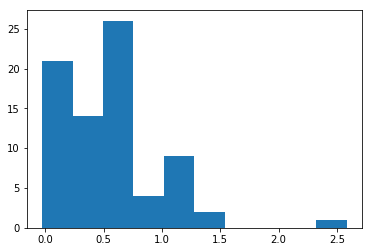

(array([ 1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0., 73.]),
 array([-18.5000185 , -16.65001665, -14.8000148 , -12.95001295,
        -11.1000111 ,  -9.25000925,  -7.4000074 ,  -5.55000555,
         -3.7000037 ,  -1.85000185,   0.        ]),
 <a list of 10 Patch objects>)

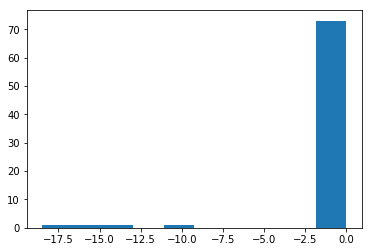

(array([16.,  6.,  9.,  7., 18.,  7.,  6.,  2.,  4.,  2.]),
 array([-0.013289  ,  0.58365394,  1.18059687,  1.77753981,  2.37448274,
         2.97142568,  3.56836861,  4.16531155,  4.76225448,  5.35919742,
         5.95614035]),
 <a list of 10 Patch objects>)

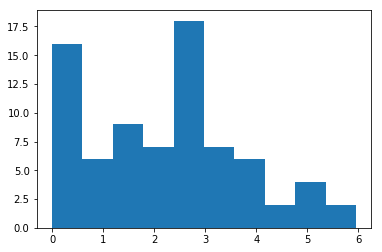

(array([ 1.,  1.,  1.,  1.,  0.,  0.,  4., 66.,  2.,  1.]),
 array([-18.75011719, -16.17964681, -13.60917644, -11.03870607,
         -8.46823569,  -5.89776532,  -3.32729495,  -0.75682457,
          1.8136458 ,   4.38411618,   6.95458655]),
 <a list of 10 Patch objects>)

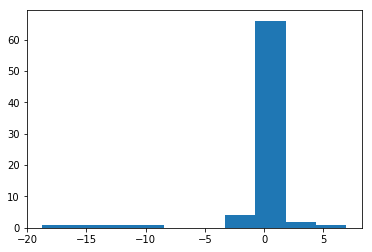

(array([28.,  0.,  4.,  7., 12., 10.,  6.,  1.,  6.,  3.]),
 array([0.        , 0.19428571, 0.38857143, 0.58285714, 0.77714286,
        0.97142857, 1.16571429, 1.36      , 1.55428571, 1.74857143,
        1.94285714]),
 <a list of 10 Patch objects>)

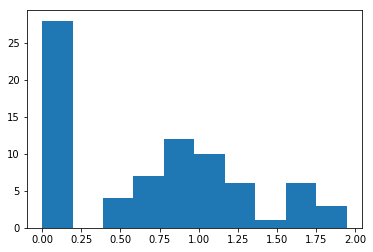

(array([16.,  5.,  8.,  9.,  9.,  9.,  2.,  8.,  5.,  6.]),
 array([-0.027397  ,  0.72358831,  1.47457363,  2.22555894,  2.97654426,
         3.72752957,  4.47851488,  5.2295002 ,  5.98048551,  6.73147083,
         7.48245614]),
 <a list of 10 Patch objects>)

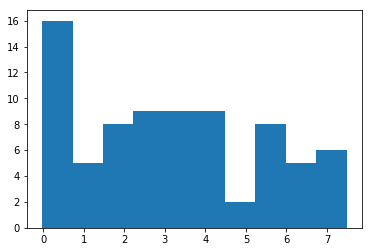

(array([ 6., 12., 10.,  6.,  5.,  8., 28.,  1.,  0.,  1.]),
 array([-0.12222222, -0.10454545, -0.08686869, -0.06919192, -0.05151515,
        -0.03383838, -0.01616162,  0.00151515,  0.01919192,  0.03686869,
         0.05454545]),
 <a list of 10 Patch objects>)

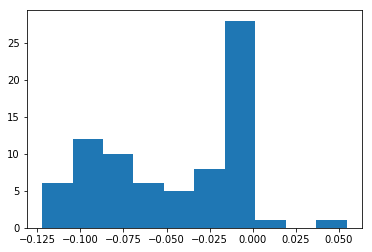

(array([16., 15., 25.,  7.,  1.,  0.,  3.,  3.,  2.,  5.]),
 array([-0.011111  ,  1.04614045,  2.1033919 ,  3.16064335,  4.2178948 ,
         5.27514625,  6.33239771,  7.38964916,  8.44690061,  9.50415206,
        10.56140351]),
 <a list of 10 Patch objects>)

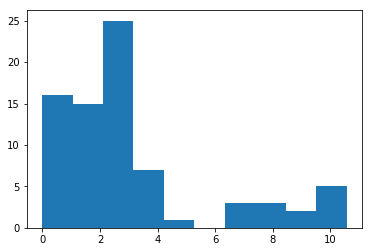

(array([40., 17.,  6., 11.,  0.,  0.,  1.,  1.,  0.,  1.]),
 array([ 0.        ,  1.72845528,  3.45691057,  5.18536585,  6.91382114,
         8.64227642, 10.37073171, 12.09918699, 13.82764228, 15.55609756,
        17.28455285]),
 <a list of 10 Patch objects>)

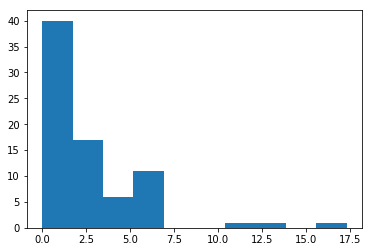

(array([62.,  9.,  0.,  0.,  0.,  2.,  0.,  1.,  0.,  3.]),
 array([-0.045455  ,  0.7141597 ,  1.4737744 ,  2.23338909,  2.99300379,
         3.75261849,  4.51223319,  5.27184789,  6.03146259,  6.79107728,
         7.55069198]),
 <a list of 10 Patch objects>)

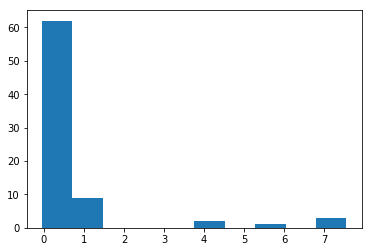

(array([70.,  3.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([-0.17142857,  1.18500891,  2.54144638,  3.89788386,  5.25432134,
         6.61075882,  7.96719629,  9.32363377, 10.68007125, 12.03650873,
        13.39294621]),
 <a list of 10 Patch objects>)

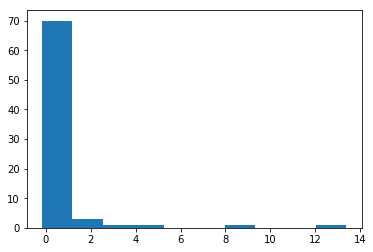

(array([13.,  4., 19.,  6.,  3.,  3.,  1.,  0.,  0., 28.]),
 array([-0.18181818, -0.16363636, -0.14545455, -0.12727273, -0.10909091,
        -0.09090909, -0.07272727, -0.05454545, -0.03636364, -0.01818182,
         0.        ]),
 <a list of 10 Patch objects>)

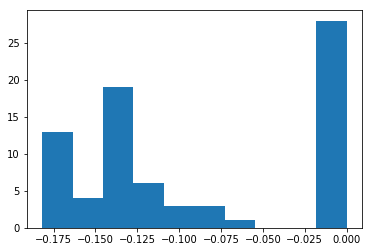

(array([75.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-0.2       ,  0.89778365,  1.99556729,  3.09335094,  4.19113458,
         5.28891823,  6.38670187,  7.48448552,  8.58226917,  9.68005281,
        10.77783646]),
 <a list of 10 Patch objects>)

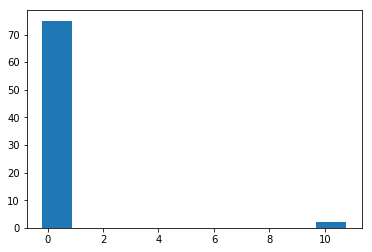

(array([20., 21., 23.,  7.,  0.,  1.,  0.,  1.,  3.,  1.]),
 array([-0.009174  ,  0.18692917,  0.38303233,  0.5791355 ,  0.77523866,
         0.97134183,  1.16744499,  1.36354816,  1.55965133,  1.75575449,
         1.95185766]),
 <a list of 10 Patch objects>)

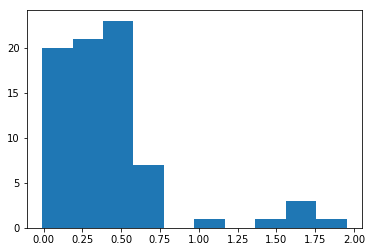

(array([ 2.,  0.,  2.,  1.,  1.,  0.,  0.,  0.,  0., 71.]),
 array([-19.55569462, -17.60012516, -15.64455569, -13.68898623,
        -11.73341677,  -9.77784731,  -7.82227785,  -5.86670839,
         -3.91113892,  -1.95556946,   0.        ]),
 <a list of 10 Patch objects>)

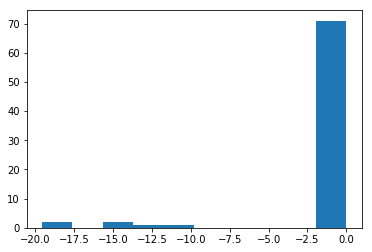

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0., 75.]),
 array([-18.75011719, -16.87510547, -15.00009375, -13.12508203,
        -11.25007031,  -9.37505859,  -7.50004688,  -5.62503516,
         -3.75002344,  -1.87501172,   0.        ]),
 <a list of 10 Patch objects>)

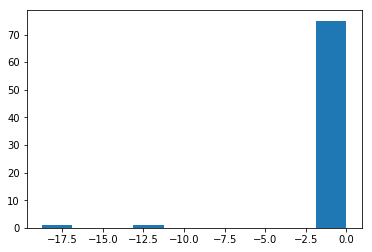

(array([17., 12.,  5.,  3.,  3., 34.,  2.,  0.,  0.,  1.]),
 array([-0.13235294, -0.11002674, -0.08770053, -0.06537433, -0.04304813,
        -0.02072193,  0.00160428,  0.02393048,  0.04625668,  0.06858289,
         0.09090909]),
 <a list of 10 Patch objects>)

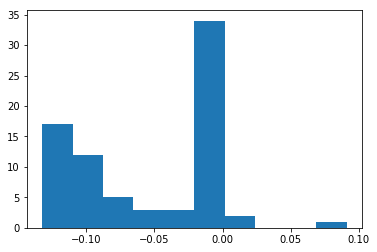

(array([ 3.,  0.,  2.,  2.,  1.,  0.,  0.,  0.,  0., 69.]),
 array([-19.55569462, -17.60012516, -15.64455569, -13.68898623,
        -11.73341677,  -9.77784731,  -7.82227785,  -5.86670839,
         -3.91113892,  -1.95556946,   0.        ]),
 <a list of 10 Patch objects>)

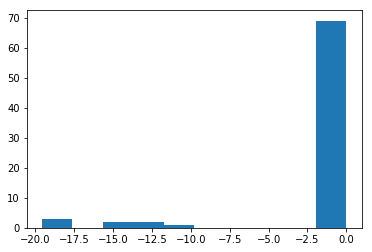

(array([ 3.,  2.,  1.,  3.,  1.,  0.,  0.,  0.,  0., 67.]),
 array([-18.75011719, -16.87510547, -15.00009375, -13.12508203,
        -11.25007031,  -9.37505859,  -7.50004688,  -5.62503516,
         -3.75002344,  -1.87501172,   0.        ]),
 <a list of 10 Patch objects>)

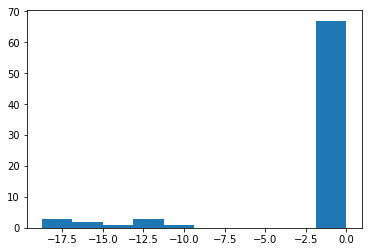

(array([10., 10., 11.,  8.,  3.,  4.,  2.,  0., 28.,  1.]),
 array([-0.12107623, -0.10611147, -0.0911467 , -0.07618193, -0.06121717,
        -0.0462524 , -0.03128764, -0.01632287, -0.0013581 ,  0.01360666,
         0.02857143]),
 <a list of 10 Patch objects>)

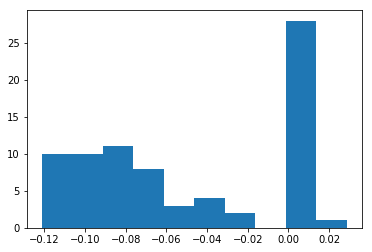

(array([25., 28., 13.,  5.,  2.,  1.,  2.,  0.,  0.,  1.]),
 array([0.        , 0.18102205, 0.3620441 , 0.54306615, 0.72408819,
        0.90511024, 1.08613229, 1.26715434, 1.44817639, 1.62919844,
        1.81022048]),
 <a list of 10 Patch objects>)

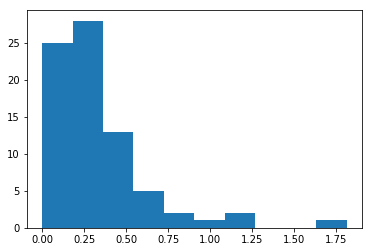

(array([63.,  0.,  2.,  3.,  3.,  1.,  2.,  0.,  2.,  1.]),
 array([-0.18181818,  3.17456518,  6.53094854,  9.8873319 , 13.24371527,
        16.60009863, 19.95648199, 23.31286535, 26.66924871, 30.02563208,
        33.38201544]),
 <a list of 10 Patch objects>)

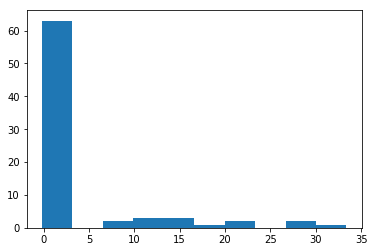

(array([67.,  4.,  3.,  1.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([-0.06666667,  1.795072  ,  3.65681067,  5.51854933,  7.380288  ,
         9.24202667, 11.10376533, 12.965504  , 14.82724267, 16.68898133,
        18.55072   ]),
 <a list of 10 Patch objects>)

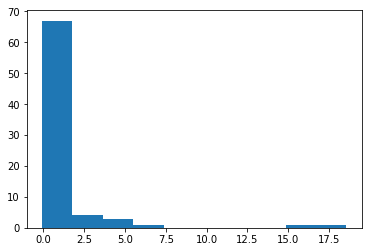

(array([16., 21., 20.,  7.,  2.,  5.,  1.,  0.,  2.,  3.]),
 array([-0.030864  ,  0.46991051,  0.97068502,  1.47145953,  1.97223404,
         2.47300855,  2.97378306,  3.47455757,  3.97533208,  4.47610659,
         4.97688111]),
 <a list of 10 Patch objects>)

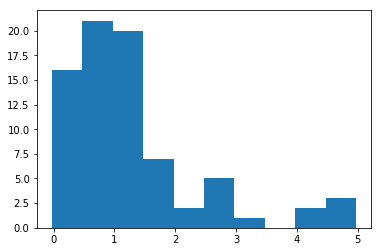

(array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0., 75.]),
 array([-18.5000185 , -16.65001665, -14.8000148 , -12.95001295,
        -11.1000111 ,  -9.25000925,  -7.4000074 ,  -5.55000555,
         -3.7000037 ,  -1.85000185,   0.        ]),
 <a list of 10 Patch objects>)

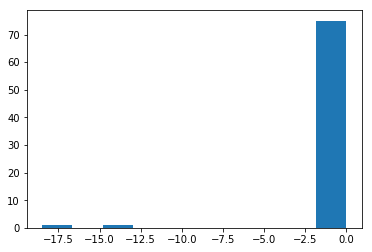

(array([71.,  2.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([-0.18181818,  2.514951  ,  5.21172019,  7.90848937, 10.60525856,
        13.30202774, 15.99879692, 18.69556611, 21.39233529, 24.08910448,
        26.78587366]),
 <a list of 10 Patch objects>)

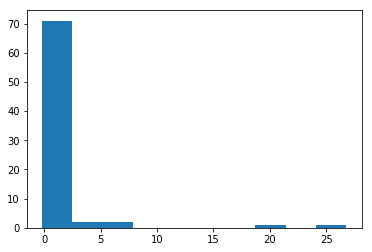

In [10]:
# Using RobustScaler()
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)
X_train1.shape
X_test1.shape
for i in range(77):
    plt.hist(X_train1[i])
    plt.show();
    
import warnings
warnings.filterwarnings("ignore")

(39077, 77)

(19248, 77)

(array([25., 19.,  5.,  1., 11.,  2.,  0.,  0.,  4., 10.]),
 array([-0.37386488, -0.30375164, -0.23363839, -0.16352514, -0.0934119 ,
        -0.02329865,  0.04681459,  0.11692784,  0.18704109,  0.25715433,
         0.32726758]),
 <a list of 10 Patch objects>)

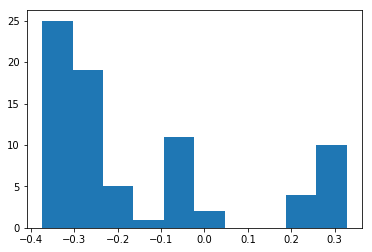

(array([11.,  3.,  2.,  6., 16., 17., 10.,  9.,  1.,  2.]),
 array([-0.09629801, -0.02987216,  0.03655369,  0.10297954,  0.16940538,
         0.23583123,  0.30225708,  0.36868293,  0.43510878,  0.50153463,
         0.56796048]),
 <a list of 10 Patch objects>)

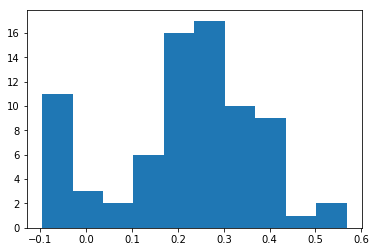

(array([29., 16., 12., 13.,  1.,  3.,  1.,  0.,  1.,  1.]),
 array([-0.17418654, -0.02740214,  0.11938227,  0.26616668,  0.41295109,
         0.55973549,  0.7065199 ,  0.85330431,  1.00008871,  1.14687312,
         1.29365753]),
 <a list of 10 Patch objects>)

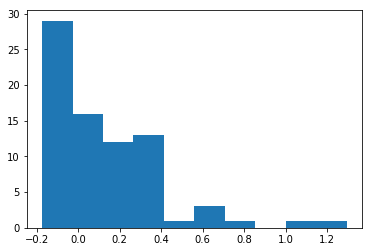

(array([ 4.,  0.,  0.,  0.,  0.,  0.,  2.,  2., 51., 18.]),
 array([-3.45782663, -3.08166746, -2.70550829, -2.32934912, -1.95318994,
        -1.57703077, -1.2008716 , -0.82471243, -0.44855326, -0.07239409,
         0.30376508]),
 <a list of 10 Patch objects>)

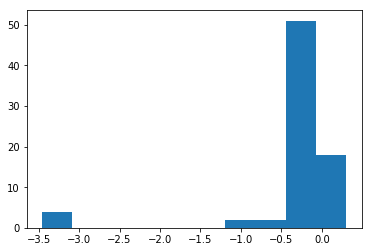

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 50., 23.]),
 array([-3.84229241, -3.42533641, -3.00838041, -2.59142441, -2.17446842,
        -1.75751242, -1.34055642, -0.92360042, -0.50664442, -0.08968842,
         0.32726758]),
 <a list of 10 Patch objects>)

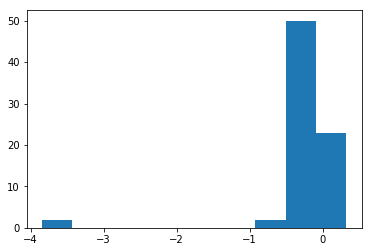

(array([ 2.,  0.,  0.,  0.,  0.,  1.,  1.,  0., 44., 29.]),
 array([-3.20080925, -2.85021411, -2.49961898, -2.14902384, -1.7984287 ,
        -1.44783357, -1.09723843, -0.74664329, -0.39604816, -0.04545302,
         0.30514212]),
 <a list of 10 Patch objects>)

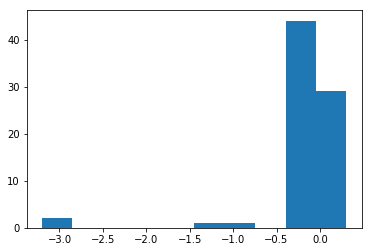

(array([ 2.,  2.,  2.,  0.,  0.,  0.,  3., 52., 14.,  2.]),
 array([-4.93707153, -4.34704652, -3.75702151, -3.1669965 , -2.57697148,
        -1.98694647, -1.39692146, -0.80689645, -0.21687143,  0.37315358,
         0.96317859]),
 <a list of 10 Patch objects>)

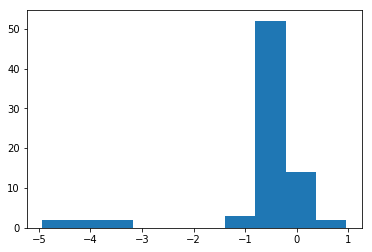

(array([ 2.,  0.,  5.,  2.,  0.,  0.,  2.,  9., 49.,  8.]),
 array([-4.97417573, -4.39687519, -3.81957464, -3.2422741 , -2.66497355,
        -2.08767301, -1.51037246, -0.93307192, -0.35577137,  0.22152918,
         0.79882972]),
 <a list of 10 Patch objects>)

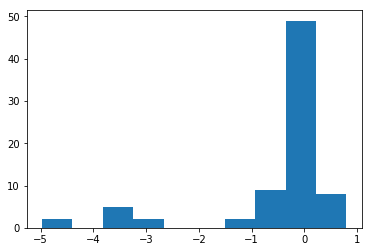

(array([ 2.,  4.,  1.,  0., 64.,  5.,  0.,  0.,  0.,  1.]),
 array([-4.97417573, -3.92013019, -2.86608464, -1.81203909, -0.75799354,
         0.296052  ,  1.35009755,  2.4041431 ,  3.45818865,  4.5122342 ,
         5.56627974]),
 <a list of 10 Patch objects>)

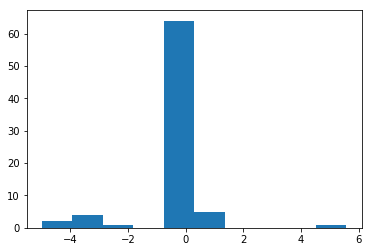

(array([10., 20., 13., 16.,  4.,  0.,  0.,  3.,  4.,  7.]),
 array([-0.23236346, -0.17640036, -0.12043725, -0.06447415, -0.00851105,
         0.04745206,  0.10341516,  0.15937827,  0.21534137,  0.27130447,
         0.32726758]),
 <a list of 10 Patch objects>)

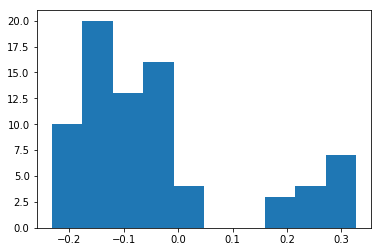

(array([ 2.,  0.,  2.,  0.,  0.,  0.,  0.,  4., 49., 20.]),
 array([-4.93707153, -4.41063762, -3.88420371, -3.3577698 , -2.83133589,
        -2.30490198, -1.77846807, -1.25203416, -0.72560024, -0.19916633,
         0.32726758]),
 <a list of 10 Patch objects>)

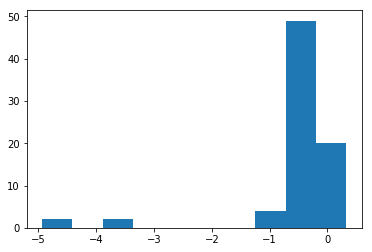

(array([23., 19.,  6.,  5.,  6.,  3.,  1.,  2.,  3.,  9.]),
 array([-0.27881256, -0.21820455, -0.15759653, -0.09698852, -0.03638051,
         0.02422751,  0.08483552,  0.14544354,  0.20605155,  0.26665956,
         0.32726758]),
 <a list of 10 Patch objects>)

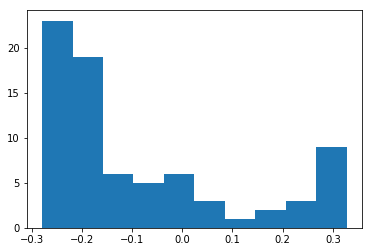

(array([23., 27.,  9., 11.,  0.,  1.,  3.,  2.,  0.,  1.]),
 array([-0.21332047, -0.07447429,  0.06437189,  0.20321807,  0.34206425,
         0.48091043,  0.61975661,  0.75860279,  0.89744897,  1.03629515,
         1.17514133]),
 <a list of 10 Patch objects>)

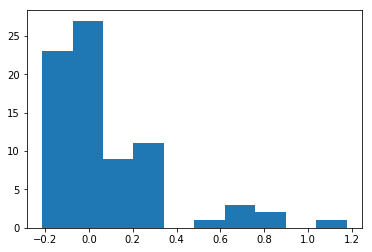

(array([22., 20.,  0., 14.,  7.,  0.,  0.,  2.,  3.,  9.]),
 array([-0.25419031, -0.19604452, -0.13789873, -0.07975295, -0.02160716,
         0.03653863,  0.09468442,  0.15283021,  0.210976  ,  0.26912179,
         0.32726758]),
 <a list of 10 Patch objects>)

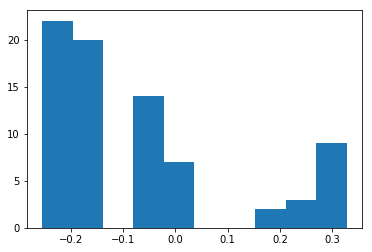

(array([14.,  5., 12.,  8., 10.,  1., 18.,  6.,  2.,  1.]),
 array([-0.07738925,  0.09536231,  0.26811386,  0.44086541,  0.61361697,
         0.78636852,  0.95912007,  1.13187163,  1.30462318,  1.47737474,
         1.65012629]),
 <a list of 10 Patch objects>)

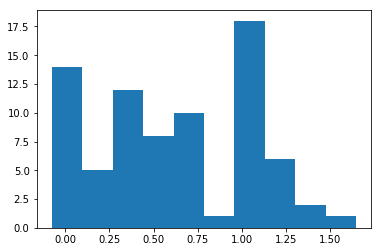

(array([35.,  3., 25.,  7.,  1.,  0.,  4.,  1.,  0.,  1.]),
 array([-0.25749407, -0.0391882 ,  0.17911768,  0.39742356,  0.61572944,
         0.83403531,  1.05234119,  1.27064707,  1.48895295,  1.70725882,
         1.9255647 ]),
 <a list of 10 Patch objects>)

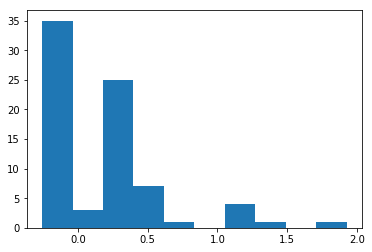

(array([ 6.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 50., 15.]),
 array([-3.84229241, -3.42533641, -3.00838041, -2.59142441, -2.17446842,
        -1.75751242, -1.34055642, -0.92360042, -0.50664442, -0.08968842,
         0.32726758]),
 <a list of 10 Patch objects>)

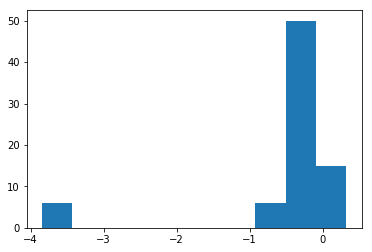

(array([17.,  7., 17., 11., 14.,  2.,  2.,  2.,  2.,  3.]),
 array([-0.16951756, -0.06647108,  0.03657541,  0.1396219 ,  0.24266839,
         0.34571487,  0.44876136,  0.55180785,  0.65485434,  0.75790082,
         0.86094731]),
 <a list of 10 Patch objects>)

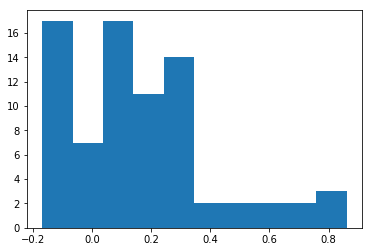

(array([40.,  9.,  0.,  0.,  9.,  1.,  1.,  1.,  4., 12.]),
 array([-0.37161257, -0.30172455, -0.23183654, -0.16194852, -0.09206051,
        -0.0221725 ,  0.04771552,  0.11760353,  0.18749155,  0.25737956,
         0.32726758]),
 <a list of 10 Patch objects>)

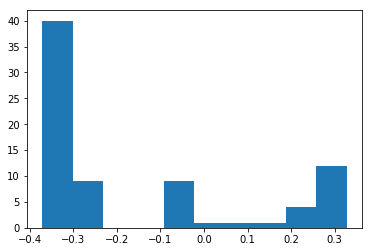

(array([25., 22.,  2.,  2., 12.,  0.,  0.,  0.,  5.,  9.]),
 array([-0.33964592, -0.27295457, -0.20626322, -0.13957187, -0.07288052,
        -0.00618917,  0.06050218,  0.12719353,  0.19388488,  0.26057623,
         0.32726758]),
 <a list of 10 Patch objects>)

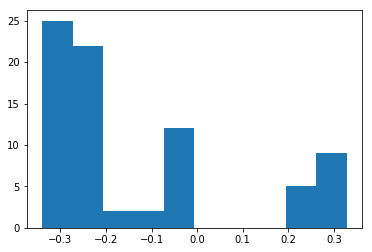

(array([ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  4., 52., 17.]),
 array([-3.65242159, -3.25445268, -2.85648376, -2.45851484, -2.06054592,
        -1.66257701, -1.26460809, -0.86663917, -0.46867026, -0.07070134,
         0.32726758]),
 <a list of 10 Patch objects>)

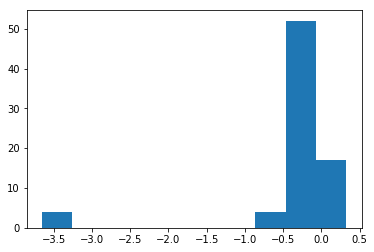

(array([ 2.,  2.,  6.,  0.,  0.,  2., 57.,  7.,  0.,  1.]),
 array([-4.97417573, -4.2740413 , -3.57390686, -2.87377242, -2.17363798,
        -1.47350354, -0.77336911, -0.07323467,  0.62689977,  1.32703421,
         2.02716865]),
 <a list of 10 Patch objects>)

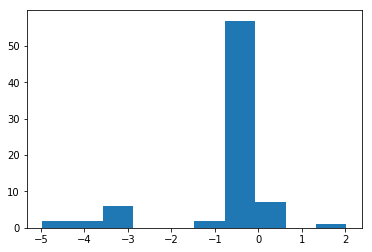

(array([12., 28.,  9.,  4., 10.,  0.,  1.,  2.,  3.,  8.]),
 array([-0.30161506, -0.2387268 , -0.17583853, -0.11295027, -0.050062  ,
         0.01282626,  0.07571452,  0.13860279,  0.20149105,  0.26437931,
         0.32726758]),
 <a list of 10 Patch objects>)

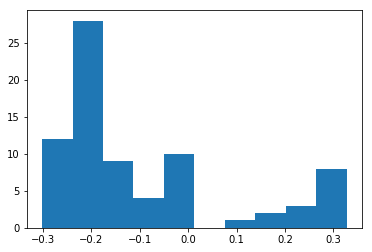

(array([ 5., 13., 13.,  7.,  9.,  4.,  0.,  6.,  9., 11.]),
 array([-0.16534796, -0.11386034, -0.06237273, -0.01088511,  0.0406025 ,
         0.09209012,  0.14357773,  0.19506535,  0.24655296,  0.29804058,
         0.34952819]),
 <a list of 10 Patch objects>)

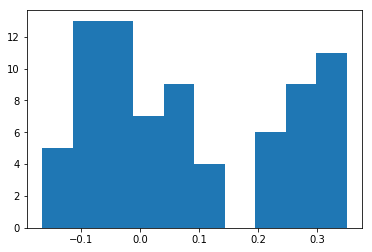

(array([29., 20.,  0.,  2., 11.,  1.,  0.,  0.,  4., 10.]),
 array([-0.36715212, -0.29771015, -0.22826818, -0.15882621, -0.08938424,
        -0.01994227,  0.0494997 ,  0.11894167,  0.18838364,  0.25782561,
         0.32726758]),
 <a list of 10 Patch objects>)

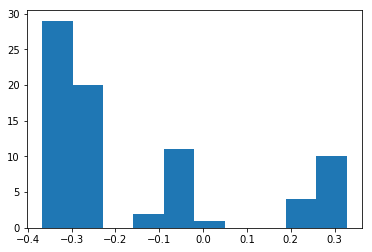

(array([49.,  0.,  1.,  7.,  1.,  4., 10.,  3.,  0.,  2.]),
 array([-0.37520743, -0.27769845, -0.18018946, -0.08268047,  0.01482852,
         0.11233751,  0.20984649,  0.30735548,  0.40486447,  0.50237346,
         0.59988245]),
 <a list of 10 Patch objects>)

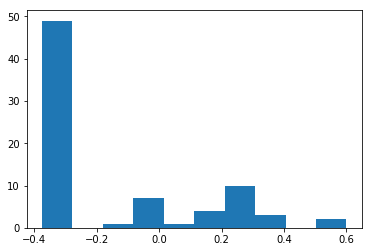

(array([ 2.,  0.,  6.,  0.,  0.,  0.,  0.,  5., 52., 12.]),
 array([-4.97417573, -4.4440314 , -3.91388707, -3.38374274, -2.85359841,
        -2.32345408, -1.79330975, -1.26316542, -0.73302108, -0.20287675,
         0.32726758]),
 <a list of 10 Patch objects>)

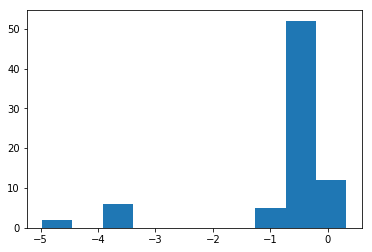

(array([16.,  9., 14.,  3., 11.,  8.,  9.,  4.,  1.,  2.]),
 array([-0.06896248, -0.01134594,  0.04627061,  0.10388715,  0.1615037 ,
         0.21912024,  0.27673679,  0.33435333,  0.39196988,  0.44958642,
         0.50720297]),
 <a list of 10 Patch objects>)

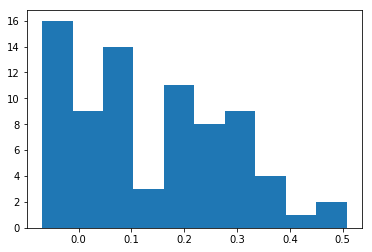

(array([34., 15.,  0.,  1., 12.,  1.,  0.,  0.,  4., 10.]),
 array([-0.36874861, -0.29914699, -0.22954537, -0.15994375, -0.09034214,
        -0.02074052,  0.0488611 ,  0.11846272,  0.18806434,  0.25766596,
         0.32726758]),
 <a list of 10 Patch objects>)

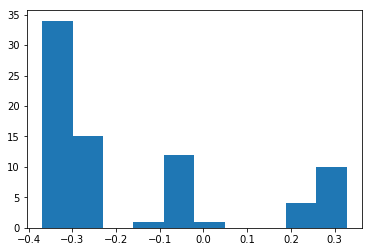

(array([34., 12.,  3.,  4., 10.,  0.,  0.,  0.,  5.,  9.]),
 array([-0.32200999, -0.25708223, -0.19215448, -0.12722672, -0.06229896,
         0.00262879,  0.06755655,  0.13248431,  0.19741206,  0.26233982,
         0.32726758]),
 <a list of 10 Patch objects>)

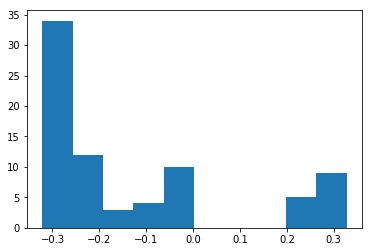

(array([ 2.,  0.,  1., 23., 47.,  1.,  1.,  0.,  0.,  2.]),
 array([-3.84229241, -2.96219774, -2.08210307, -1.2020084 , -0.32191373,
         0.55818094,  1.43827561,  2.31837028,  3.19846495,  4.07855962,
         4.95865429]),
 <a list of 10 Patch objects>)

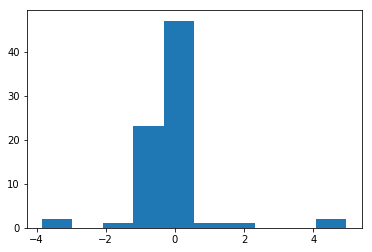

(array([ 4.,  0.,  0.,  2., 49., 18.,  1.,  1.,  0.,  2.]),
 array([-3.65242159, -2.97882484, -2.30522809, -1.63163133, -0.95803458,
        -0.28443783,  0.38915893,  1.06275568,  1.73635243,  2.40994918,
         3.08354594]),
 <a list of 10 Patch objects>)

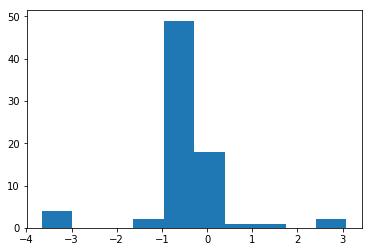

(array([22.,  6.,  4.,  7., 16., 11.,  7.,  3.,  0.,  1.]),
 array([-0.09629801,  0.28663004,  0.66955809,  1.05248614,  1.43541419,
         1.81834224,  2.20127029,  2.58419834,  2.96712639,  3.35005444,
         3.73298249]),
 <a list of 10 Patch objects>)

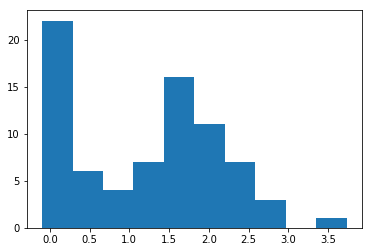

(array([42.,  7.,  0.,  6.,  6.,  2.,  0.,  2.,  3.,  9.]),
 array([-0.25836555, -0.19980224, -0.14123893, -0.08267561, -0.0241123 ,
         0.03445101,  0.09301433,  0.15157764,  0.21014095,  0.26870426,
         0.32726758]),
 <a list of 10 Patch objects>)

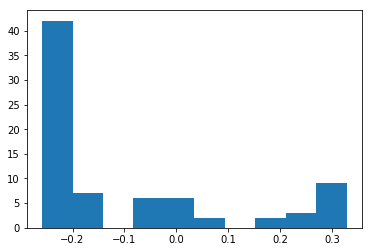

(array([38., 11.,  0.,  1.,  8.,  1.,  1.,  2.,  5., 10.]),
 array([-0.3727052 , -0.30270792, -0.23271065, -0.16271337, -0.09271609,
        -0.02271881,  0.04727847,  0.11727574,  0.18727302,  0.2572703 ,
         0.32726758]),
 <a list of 10 Patch objects>)

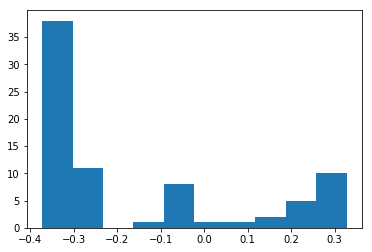

(array([36., 13.,  0.,  0.,  9.,  4.,  1.,  0.,  4., 10.]),
 array([-0.36731663, -0.29785821, -0.22839979, -0.15894137, -0.08948295,
        -0.02002453,  0.04943389,  0.11889231,  0.18835074,  0.25780916,
         0.32726758]),
 <a list of 10 Patch objects>)

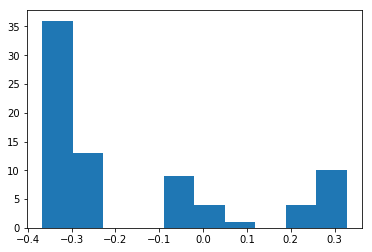

(array([ 2.,  0.,  0.,  0.,  0.,  1.,  1.,  0., 57., 16.]),
 array([-3.20080925, -2.85021411, -2.49961898, -2.14902384, -1.7984287 ,
        -1.44783357, -1.09723843, -0.74664329, -0.39604816, -0.04545302,
         0.30514212]),
 <a list of 10 Patch objects>)

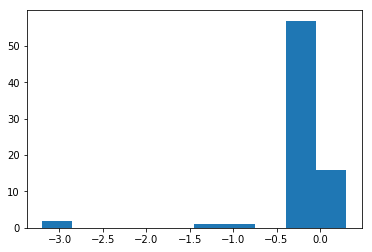

(array([21., 25.,  3.,  2., 12.,  0.,  0.,  0.,  4., 10.]),
 array([-0.34583695, -0.2785265 , -0.21121605, -0.14390559, -0.07659514,
        -0.00928469,  0.05802577,  0.12533622,  0.19264667,  0.25995713,
         0.32726758]),
 <a list of 10 Patch objects>)

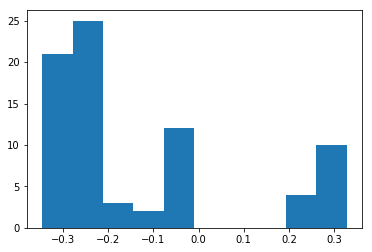

(array([19., 23.,  8.,  7.,  1.,  1.,  4.,  8.,  4.,  2.]),
 array([-0.17944902, -0.12247982, -0.06551063, -0.00854143,  0.04842776,
         0.10539696,  0.16236616,  0.21933535,  0.27630455,  0.33327374,
         0.39024294]),
 <a list of 10 Patch objects>)

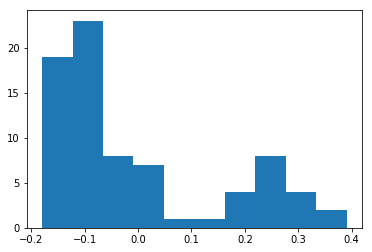

(array([ 6., 12.,  7.,  9.,  7.,  7., 12.,  8.,  7.,  2.]),
 array([-0.11334072, -0.0638041 , -0.01426749,  0.03526913,  0.08480575,
         0.13434236,  0.18387898,  0.2334156 ,  0.28295221,  0.33248883,
         0.38202545]),
 <a list of 10 Patch objects>)

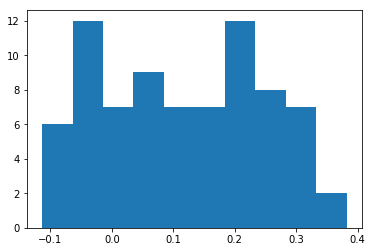

(array([ 2.,  6., 11., 18.,  9.,  3.,  8.,  7.,  6.,  7.]),
 array([-0.1661575 , -0.11637852, -0.06659955, -0.01682057,  0.0329584 ,
         0.08273738,  0.13251635,  0.18229533,  0.2320743 ,  0.28185328,
         0.33163225]),
 <a list of 10 Patch objects>)

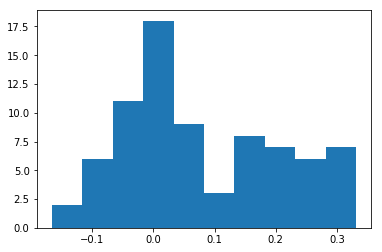

(array([20., 23., 11.,  5.,  6.,  9.,  2.,  0.,  0.,  1.]),
 array([-0.16678937, -0.07894162,  0.00890613,  0.09675388,  0.18460163,
         0.27244938,  0.36029713,  0.44814488,  0.53599263,  0.62384038,
         0.71168813]),
 <a list of 10 Patch objects>)

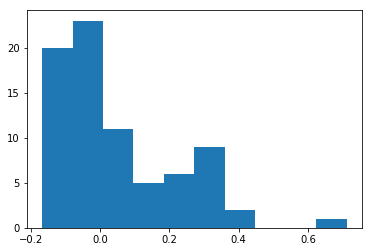

(array([39., 10.,  2.,  8.,  2.,  5., 10.,  0.,  0.,  1.]),
 array([-0.31905226, -0.22026745, -0.12148263, -0.02269782,  0.076087  ,
         0.17487181,  0.27365663,  0.37244144,  0.47122626,  0.57001107,
         0.66879589]),
 <a list of 10 Patch objects>)

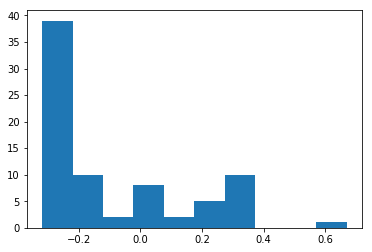

(array([ 2.,  0.,  0.,  0.,  0.,  0., 50., 11., 12.,  2.]),
 array([-3.48990353, -3.03232772, -2.5747519 , -2.11717609, -1.65960027,
        -1.20202446, -0.74444865, -0.28687283,  0.17070298,  0.62827879,
         1.08585461]),
 <a list of 10 Patch objects>)

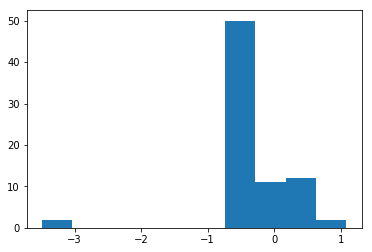

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 49., 24.]),
 array([-4.93707153, -4.41063762, -3.88420371, -3.3577698 , -2.83133589,
        -2.30490198, -1.77846807, -1.25203416, -0.72560024, -0.19916633,
         0.32726758]),
 <a list of 10 Patch objects>)

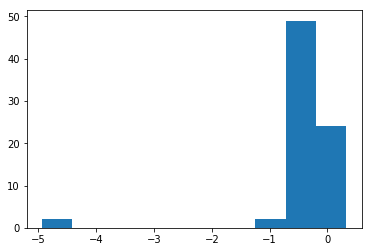

(array([43.,  6.,  0.,  2., 11.,  1.,  0.,  0.,  4., 10.]),
 array([-0.36715212, -0.29771015, -0.22826818, -0.15882621, -0.08938424,
        -0.01994227,  0.0494997 ,  0.11894167,  0.18838364,  0.25782561,
         0.32726758]),
 <a list of 10 Patch objects>)

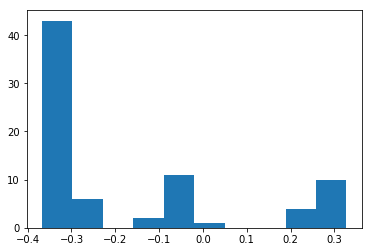

(array([19., 30.,  0.,  3., 11.,  0.,  0.,  0.,  5.,  9.]),
 array([-0.33112417, -0.265285  , -0.19944582, -0.13360665, -0.06776747,
        -0.0019283 ,  0.06391088,  0.12975005,  0.19558923,  0.2614284 ,
         0.32726758]),
 <a list of 10 Patch objects>)

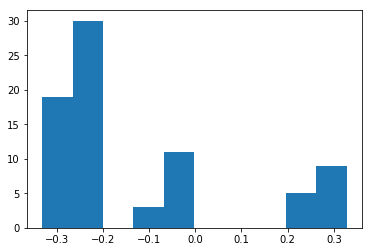

(array([14., 31.,  4.,  2., 11.,  1.,  0.,  0.,  4., 10.]),
 array([-0.35134371, -0.28348258, -0.21562145, -0.14776032, -0.07989919,
        -0.01203807,  0.05582306,  0.12368419,  0.19154532,  0.25940645,
         0.32726758]),
 <a list of 10 Patch objects>)

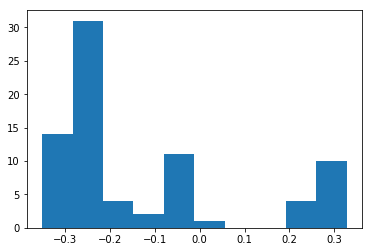

(array([23., 16., 13.,  5.,  4.,  1.,  1.,  3.,  3.,  8.]),
 array([-0.19475133, -0.14254944, -0.09034755, -0.03814565,  0.01405624,
         0.06625813,  0.11846002,  0.17066191,  0.2228638 ,  0.27506569,
         0.32726758]),
 <a list of 10 Patch objects>)

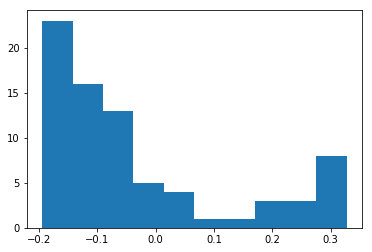

(array([39., 10.,  0.,  3.,  4.,  5.,  2.,  1.,  4.,  9.]),
 array([-0.29893241, -0.23631241, -0.17369241, -0.11107242, -0.04845242,
         0.01416758,  0.07678758,  0.13940758,  0.20202758,  0.26464758,
         0.32726758]),
 <a list of 10 Patch objects>)

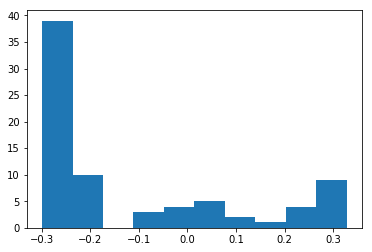

(array([23., 18.,  8.,  9.,  3.,  1.,  1.,  2.,  4.,  8.]),
 array([-0.26707812, -0.20764355, -0.14820898, -0.08877441, -0.02933984,
         0.03009473,  0.0895293 ,  0.14896387,  0.20839844,  0.26783301,
         0.32726758]),
 <a list of 10 Patch objects>)

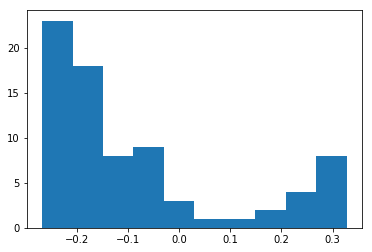

(array([ 2.,  0.,  2.,  0.,  1.,  0.,  0.,  2., 51., 19.]),
 array([-4.93707153, -4.41063762, -3.88420371, -3.3577698 , -2.83133589,
        -2.30490198, -1.77846807, -1.25203416, -0.72560024, -0.19916633,
         0.32726758]),
 <a list of 10 Patch objects>)

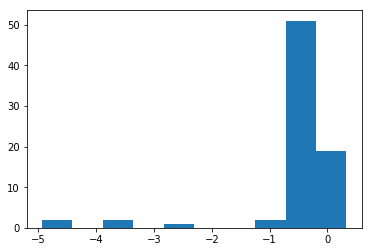

(array([ 2.,  0.,  0.,  2.,  0.,  0.,  0.,  4., 49., 20.]),
 array([-4.93707153, -4.41285017, -3.8886288 , -3.36440744, -2.84018607,
        -2.31596471, -1.79174334, -1.26752198, -0.74330061, -0.21907925,
         0.30514212]),
 <a list of 10 Patch objects>)

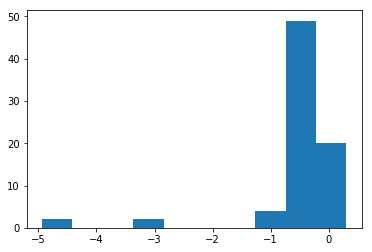

(array([ 2.,  0.,  6.,  0.,  0.,  0.,  8., 53.,  6.,  2.]),
 array([-4.93707153, -4.30239197, -3.66771241, -3.03303285, -2.39835329,
        -1.76367373, -1.12899418, -0.49431462,  0.14036494,  0.7750445 ,
         1.40972406]),
 <a list of 10 Patch objects>)

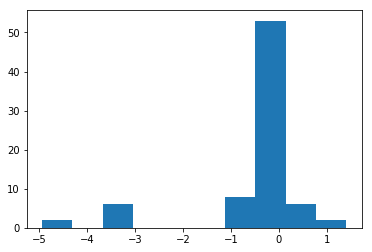

(array([ 6.,  2.,  0.,  0.,  0.,  0.,  2.,  6., 49., 12.]),
 array([-3.84229241, -3.42877081, -3.01524922, -2.60172762, -2.18820603,
        -1.77468443, -1.36116283, -0.94764124, -0.53411964, -0.12059804,
         0.29292355]),
 <a list of 10 Patch objects>)

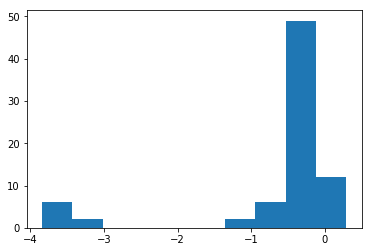

(array([11., 28.,  6.,  2.,  3.,  3.,  5.,  9.,  7.,  3.]),
 array([-0.14814905, -0.09249526, -0.03684148,  0.0188123 ,  0.07446609,
         0.13011987,  0.18577365,  0.24142744,  0.29708122,  0.352735  ,
         0.40838879]),
 <a list of 10 Patch objects>)

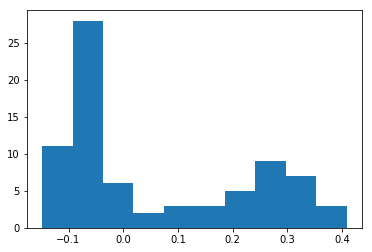

(array([20., 29.,  0.,  1.,  7.,  6.,  0.,  0.,  4., 10.]),
 array([-0.36446702, -0.29529356, -0.2261201 , -0.15694664, -0.08777318,
        -0.01859972,  0.05057374,  0.1197472 ,  0.18892066,  0.25809412,
         0.32726758]),
 <a list of 10 Patch objects>)

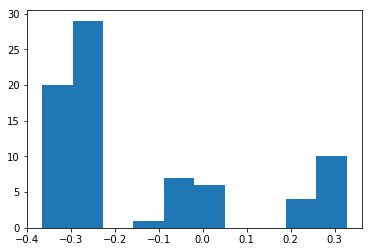

(array([32., 14., 11., 15.,  2.,  0.,  1.,  0.,  1.,  1.]),
 array([-0.36178192, -0.19366908, -0.02555625,  0.14255659,  0.31066942,
         0.47878226,  0.64689509,  0.81500792,  0.98312076,  1.15123359,
         1.31934643]),
 <a list of 10 Patch objects>)

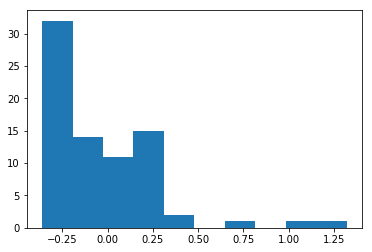

(array([ 2.,  0.,  0.,  2., 54., 16.,  1.,  1.,  0.,  1.]),
 array([-3.65242159, -2.90002708, -2.14763257, -1.39523806, -0.64284355,
         0.10955096,  0.86194547,  1.61433999,  2.3667345 ,  3.11912901,
         3.87152352]),
 <a list of 10 Patch objects>)

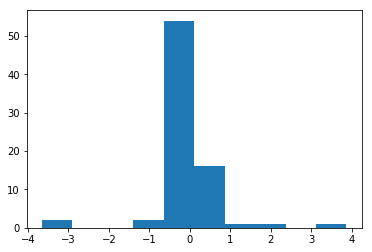

(array([22., 20.,  5., 10.,  6.,  0.,  0.,  1.,  4.,  9.]),
 array([-0.29811305, -0.23557499, -0.17303693, -0.11049886, -0.0479608 ,
         0.01457726,  0.07711533,  0.13965339,  0.20219145,  0.26472952,
         0.32726758]),
 <a list of 10 Patch objects>)

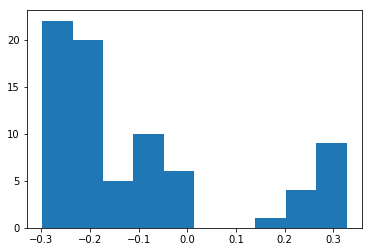

(array([ 6.,  2.,  0.,  0.,  0.,  0.,  2.,  6., 49., 12.]),
 array([-3.84229241, -3.42768666, -3.01308091, -2.59847516, -2.18386941,
        -1.76926367, -1.35465792, -0.94005217, -0.52544642, -0.11084067,
         0.30376508]),
 <a list of 10 Patch objects>)

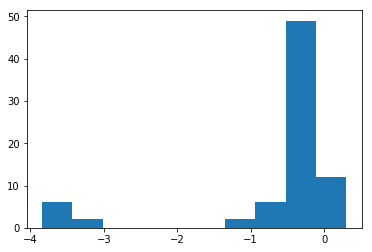

(array([ 9., 11., 22., 12.,  3.,  3.,  1.,  5.,  3.,  8.]),
 array([-0.22247959, -0.16593161, -0.10938363, -0.05283565,  0.00371233,
         0.06026032,  0.1168083 ,  0.17335628,  0.22990426,  0.28645224,
         0.34300023]),
 <a list of 10 Patch objects>)

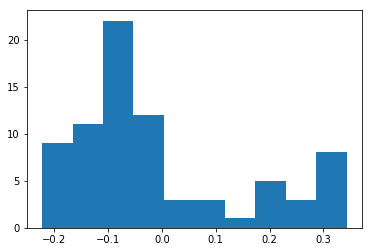

(array([16., 27.,  6.,  4., 10.,  0.,  0.,  0.,  5.,  9.]),
 array([-0.32039359, -0.25562747, -0.19086135, -0.12609524, -0.06132912,
         0.003437  ,  0.06820311,  0.13296923,  0.19773535,  0.26250146,
         0.32726758]),
 <a list of 10 Patch objects>)

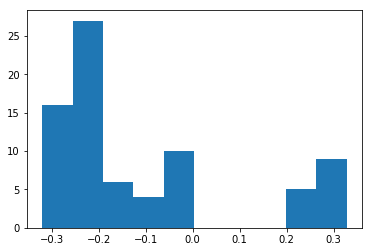

(array([41.,  8.,  0.,  1.,  1.,  8.,  2.,  1.,  5., 10.]),
 array([-0.32844153, -0.26287062, -0.19729971, -0.1317288 , -0.06615789,
        -0.00058697,  0.06498394,  0.13055485,  0.19612576,  0.26169667,
         0.32726758]),
 <a list of 10 Patch objects>)

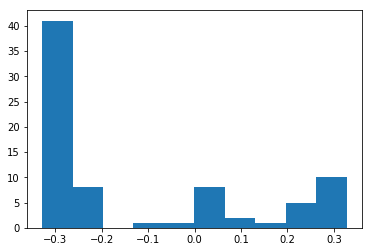

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 53., 20.]),
 array([-3.48990353, -3.10818642, -2.72646931, -2.3447522 , -1.96303509,
        -1.58131798, -1.19960086, -0.81788375, -0.43616664, -0.05444953,
         0.32726758]),
 <a list of 10 Patch objects>)

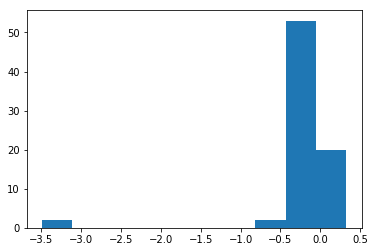

(array([27., 21.,  1.,  2., 11.,  1.,  0.,  0.,  4., 10.]),
 array([-0.3483564 , -0.280794  , -0.2132316 , -0.14566921, -0.07810681,
        -0.01054441,  0.05701799,  0.12458039,  0.19214278,  0.25970518,
         0.32726758]),
 <a list of 10 Patch objects>)

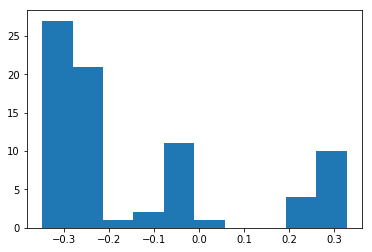

(array([16., 32.,  1.,  1.,  4.,  6.,  2.,  0.,  6.,  9.]),
 array([-0.37654999, -0.30616823, -0.23578647, -0.16540472, -0.09502296,
        -0.0246412 ,  0.04574055,  0.11612231,  0.18650407,  0.25688582,
         0.32726758]),
 <a list of 10 Patch objects>)

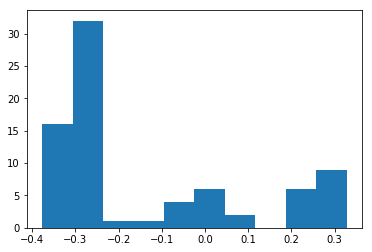

(array([ 2.,  2.,  0.,  0.,  0.,  0.,  2.,  2., 50., 19.]),
 array([-3.65242159, -3.25666522, -2.86090885, -2.46515248, -2.06939611,
        -1.67363974, -1.27788337, -0.882127  , -0.48637063, -0.09061426,
         0.30514212]),
 <a list of 10 Patch objects>)

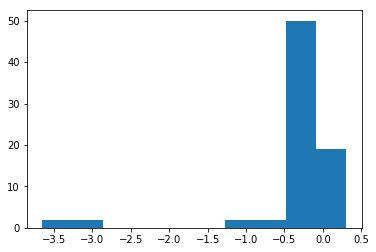

(array([ 6., 17., 10., 11.,  3.,  8., 14.,  7.,  0.,  1.]),
 array([-0.13394963, -0.07434401, -0.0147384 ,  0.04486722,  0.10447283,
         0.16407845,  0.22368407,  0.28328968,  0.3428953 ,  0.40250092,
         0.46210653]),
 <a list of 10 Patch objects>)

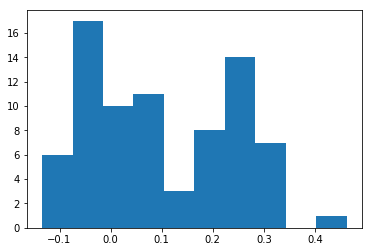

(array([21.,  7.,  2.,  8., 12., 15.,  9.,  2.,  0.,  1.]),
 array([-0.05978652,  0.28422275,  0.62823201,  0.97224128,  1.31625055,
         1.66025982,  2.00426909,  2.34827836,  2.69228762,  3.03629689,
         3.38030616]),
 <a list of 10 Patch objects>)

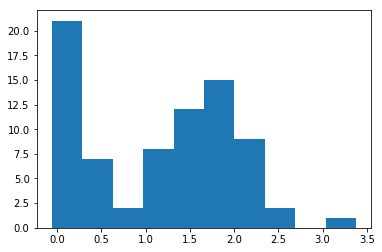

(array([ 2.,  0.,  2.,  2.,  0.,  0.,  0.,  6., 49., 16.]),
 array([-4.93707153, -4.41285017, -3.8886288 , -3.36440744, -2.84018607,
        -2.31596471, -1.79174334, -1.26752198, -0.74330061, -0.21907925,
         0.30514212]),
 <a list of 10 Patch objects>)

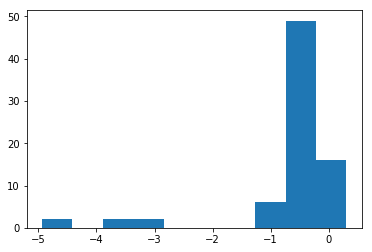

(array([16., 22.,  9., 10.,  6.,  0.,  0.,  1.,  4.,  9.]),
 array([-0.29858165, -0.23599673, -0.17341181, -0.11082688, -0.04824196,
         0.01434296,  0.07692789,  0.13951281,  0.20209773,  0.26468265,
         0.32726758]),
 <a list of 10 Patch objects>)

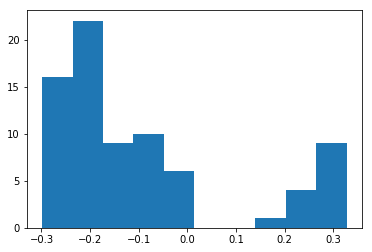

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 52., 21.]),
 array([-3.65242159, -3.25445268, -2.85648376, -2.45851484, -2.06054592,
        -1.66257701, -1.26460809, -0.86663917, -0.46867026, -0.07070134,
         0.32726758]),
 <a list of 10 Patch objects>)

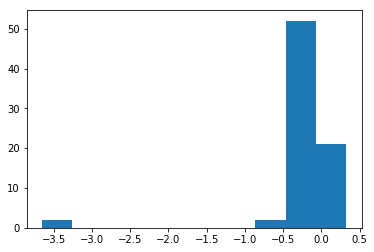

(array([ 6., 13., 19.,  6.,  4.,  6.,  7.,  6.,  3.,  7.]),
 array([-0.22684417, -0.17291765, -0.11899114, -0.06506462, -0.0111381 ,
         0.04278841,  0.09671493,  0.15064144,  0.20456796,  0.25849448,
         0.31242099]),
 <a list of 10 Patch objects>)

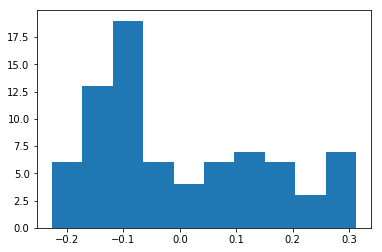

(array([ 2.,  0.,  2.,  2.,  0.,  0.,  0.,  4., 51., 16.]),
 array([-4.93707153, -4.41285017, -3.8886288 , -3.36440744, -2.84018607,
        -2.31596471, -1.79174334, -1.26752198, -0.74330061, -0.21907925,
         0.30514212]),
 <a list of 10 Patch objects>)

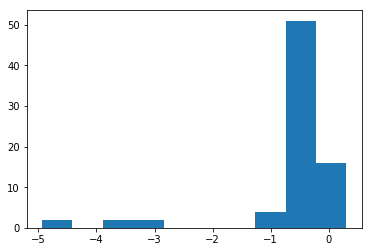

(array([26., 23.,  0.,  2., 11.,  1.,  0.,  0.,  4., 10.]),
 array([-0.36158872, -0.29270309, -0.22381746, -0.15493183, -0.0860462 ,
        -0.01716057,  0.05172506,  0.12061069,  0.18949632,  0.25838195,
         0.32726758]),
 <a list of 10 Patch objects>)

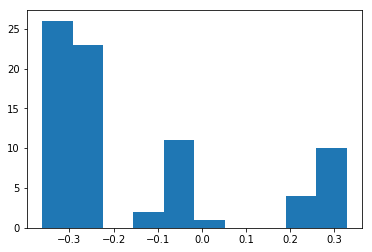

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  2., 50., 23.]),
 array([-3.84229241, -3.42533641, -3.00838041, -2.59142441, -2.17446842,
        -1.75751242, -1.34055642, -0.92360042, -0.50664442, -0.08968842,
         0.32726758]),
 <a list of 10 Patch objects>)

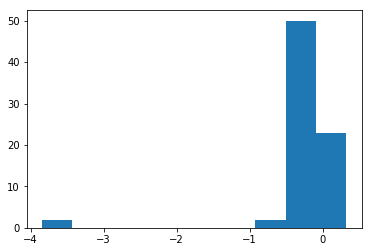

In [14]:
# Using StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2= scaler.transform(X_test)
X_train2.shape
X_test2.shape
for i in range(77):
    plt.hist(X_train2[i])
    plt.show()

(39077, 77)

(19248, 77)

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.00249134, 0.1022422 , 0.20199307, 0.30174394, 0.4014948 ,
        0.50124567, 0.60099653, 0.7007474 , 0.80049827, 0.90024913,
        1.        ]),
 <a list of 10 Patch objects>)

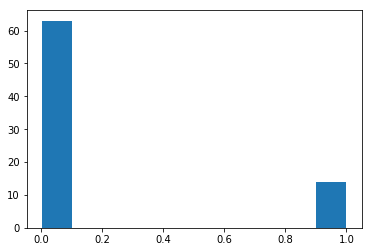

(array([73.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

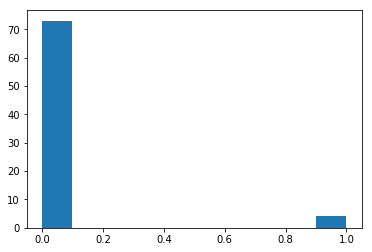

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([1.10852455e-04, 1.00099767e-01, 2.00088682e-01, 3.00077597e-01,
        4.00066511e-01, 5.00055426e-01, 6.00044341e-01, 7.00033256e-01,
        8.00022170e-01, 9.00011085e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

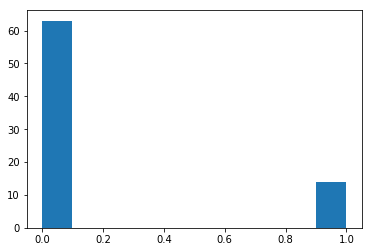

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.0027238 , 0.10245142, 0.20217904, 0.30190666, 0.40163428,
        0.5013619 , 0.60108952, 0.70081714, 0.80054476, 0.90027238,
        1.        ]),
 <a list of 10 Patch objects>)

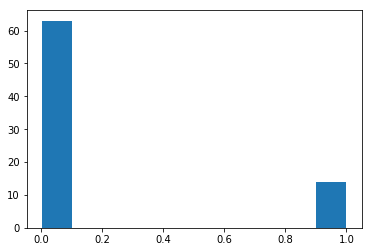

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([5.97044629e-04, 1.00537340e-01, 2.00477636e-01, 3.00417931e-01,
        4.00358227e-01, 5.00298522e-01, 6.00238818e-01, 7.00179113e-01,
        8.00119409e-01, 9.00059704e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

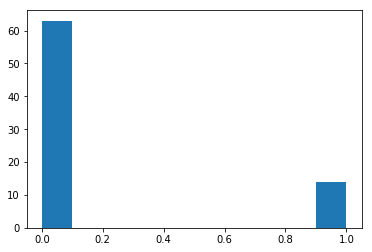

(array([67.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

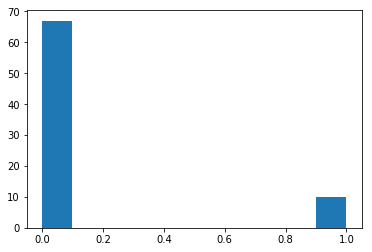

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.00135328, 0.10121795, 0.20108262, 0.3009473 , 0.40081197,
        0.50067664, 0.60054131, 0.70040598, 0.80027066, 0.90013533,
        1.        ]),
 <a list of 10 Patch objects>)

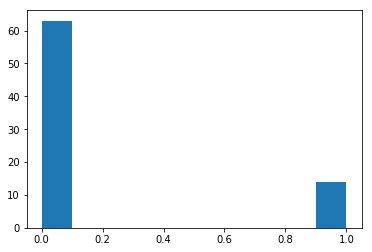

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

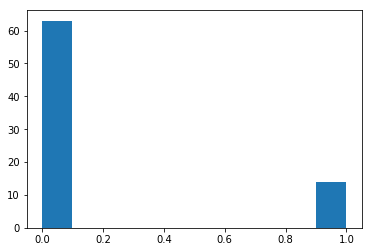

(array([71.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

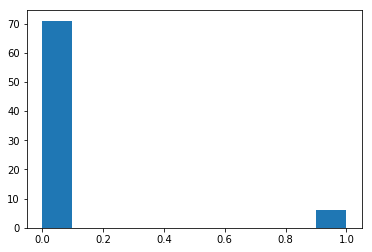

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([1.21491921e-04, 1.00109343e-01, 2.00097194e-01, 3.00085044e-01,
        4.00072895e-01, 5.00060746e-01, 6.00048597e-01, 7.00036448e-01,
        8.00024298e-01, 9.00012149e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

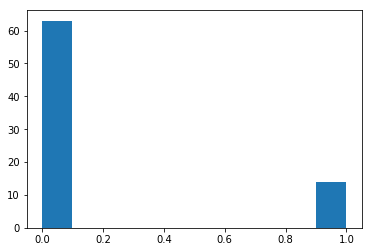

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([5.10169376e-04, 1.00459152e-01, 2.00408136e-01, 3.00357119e-01,
        4.00306102e-01, 5.00255085e-01, 6.00204068e-01, 7.00153051e-01,
        8.00102034e-01, 9.00051017e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

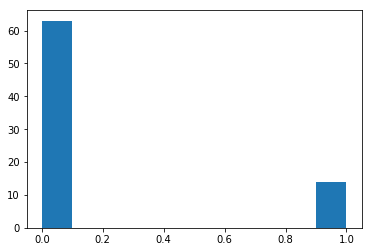

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([6.90636352e-05, 1.00062157e-01, 2.00055251e-01, 3.00048345e-01,
        4.00041438e-01, 5.00034532e-01, 6.00027625e-01, 7.00020719e-01,
        8.00013813e-01, 9.00006906e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

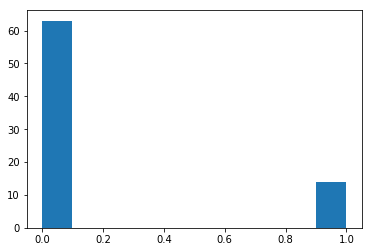

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([2.85049171e-04, 1.00256544e-01, 2.00228039e-01, 3.00199534e-01,
        4.00171030e-01, 5.00142525e-01, 6.00114020e-01, 7.00085515e-01,
        8.00057010e-01, 9.00028505e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

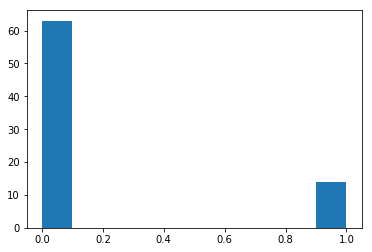

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([1.04135932e-04, 1.00093722e-01, 2.00083309e-01, 3.00072895e-01,
        4.00062482e-01, 5.00052068e-01, 6.00041654e-01, 7.00031241e-01,
        8.00020827e-01, 9.00010414e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

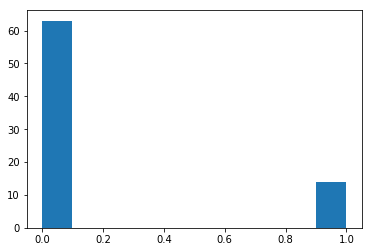

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([1.90915876e-04, 1.00171824e-01, 2.00152733e-01, 3.00133641e-01,
        4.00114550e-01, 5.00095458e-01, 6.00076366e-01, 7.00057275e-01,
        8.00038183e-01, 9.00019092e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

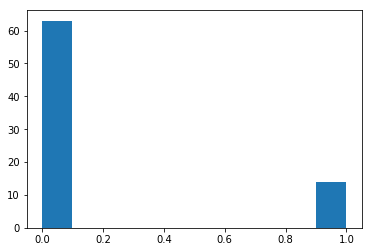

(array([65.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

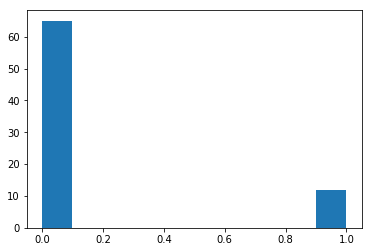

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([1.42524585e-04, 1.00128272e-01, 2.00114020e-01, 3.00099767e-01,
        4.00085515e-01, 5.00071262e-01, 6.00057010e-01, 7.00042757e-01,
        8.00028505e-01, 9.00014252e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

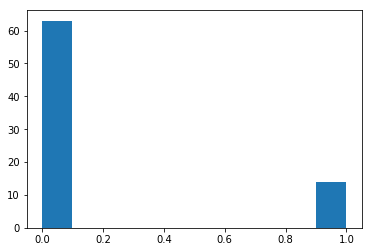

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([3.20399859e-05, 1.00028836e-01, 2.00025632e-01, 3.00022428e-01,
        4.00019224e-01, 5.00016020e-01, 6.00012816e-01, 7.00009612e-01,
        8.00006408e-01, 9.00003204e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

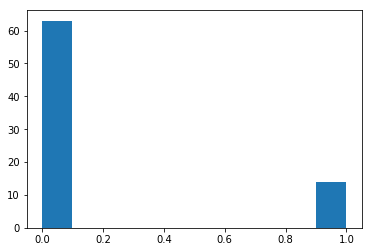

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

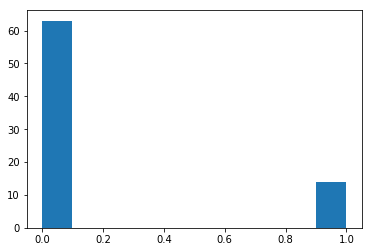

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 13.]),
 array([3.31647459e-04, 1.00298483e-01, 2.00265318e-01, 3.00232153e-01,
        4.00198988e-01, 5.00165824e-01, 6.00132659e-01, 7.00099494e-01,
        8.00066329e-01, 9.00033165e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

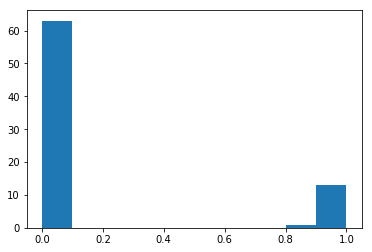

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([7.96059505e-04, 1.00716454e-01, 2.00636848e-01, 3.00557242e-01,
        4.00477636e-01, 5.00398030e-01, 6.00318424e-01, 7.00238818e-01,
        8.00159212e-01, 9.00079606e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

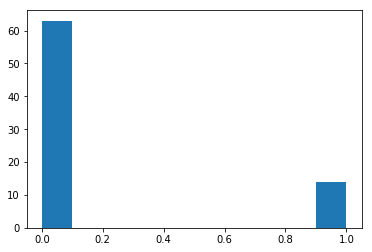

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

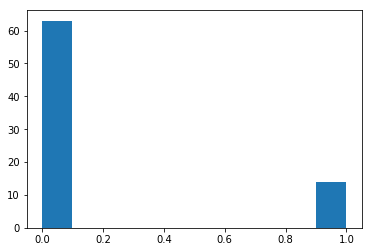

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([1.21491921e-04, 1.00109343e-01, 2.00097194e-01, 3.00085044e-01,
        4.00072895e-01, 5.00060746e-01, 6.00048597e-01, 7.00036448e-01,
        8.00024298e-01, 9.00012149e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

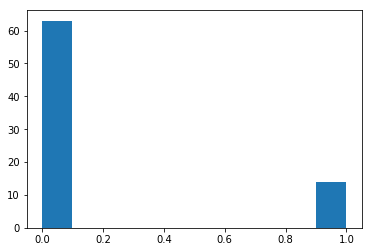

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.00222157, 0.10199941, 0.20177725, 0.3015551 , 0.40133294,
        0.50111078, 0.60088863, 0.70066647, 0.80044431, 0.90022216,
        1.        ]),
 <a list of 10 Patch objects>)

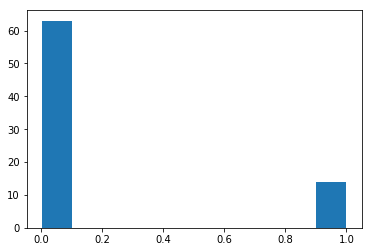

(array([50., 11.,  2.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.00423645, 0.10381281, 0.20338916, 0.30296552, 0.40254187,
        0.50211823, 0.60169458, 0.70127094, 0.80084729, 0.90042365,
        1.        ]),
 <a list of 10 Patch objects>)

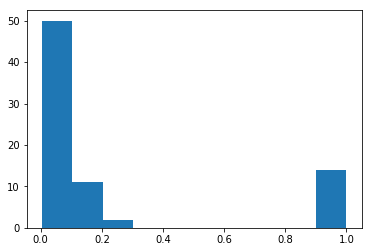

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.00603354, 0.10543019, 0.20482683, 0.30422348, 0.40362012,
        0.50301677, 0.60241342, 0.70181006, 0.80120671, 0.90060335,
        1.        ]),
 <a list of 10 Patch objects>)

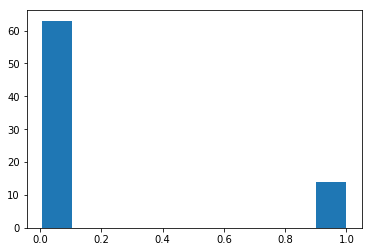

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([3.48098512e-04, 1.00313289e-01, 2.00278479e-01, 3.00243669e-01,
        4.00208859e-01, 5.00174049e-01, 6.00139239e-01, 7.00104430e-01,
        8.00069620e-01, 9.00034810e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

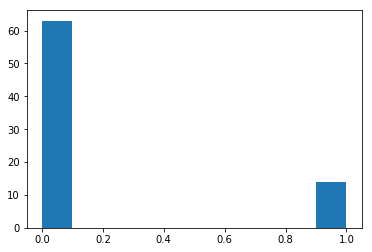

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([3.20399859e-05, 1.00028836e-01, 2.00025632e-01, 3.00022428e-01,
        4.00019224e-01, 5.00016020e-01, 6.00012816e-01, 7.00009612e-01,
        8.00006408e-01, 9.00003204e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

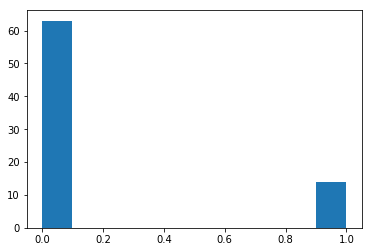

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([6.76269696e-05, 1.00060864e-01, 2.00054102e-01, 3.00047339e-01,
        4.00040576e-01, 5.00033813e-01, 6.00027051e-01, 7.00020288e-01,
        8.00013525e-01, 9.00006763e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

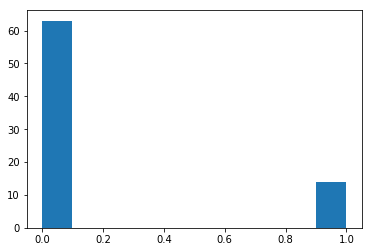

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([6.99202909e-05, 1.00062928e-01, 2.00055936e-01, 3.00048944e-01,
        4.00041952e-01, 5.00034960e-01, 6.00027968e-01, 7.00020976e-01,
        8.00013984e-01, 9.00006992e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

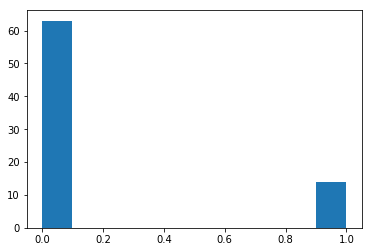

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.00433577, 0.10390219, 0.20346862, 0.30303504, 0.40260146,
        0.50216789, 0.60173431, 0.70130073, 0.80086715, 0.90043358,
        1.        ]),
 <a list of 10 Patch objects>)

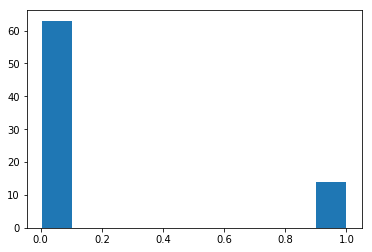

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.00424268, 0.10381841, 0.20339414, 0.30296987, 0.40254561,
        0.50212134, 0.60169707, 0.7012728 , 0.80084854, 0.90042427,
        1.        ]),
 <a list of 10 Patch objects>)

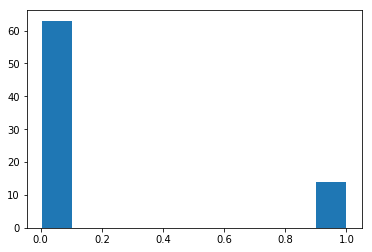

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([2.66631116e-05, 1.00023997e-01, 2.00021330e-01, 3.00018664e-01,
        4.00015998e-01, 5.00013332e-01, 6.00010665e-01, 7.00007999e-01,
        8.00005333e-01, 9.00002666e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

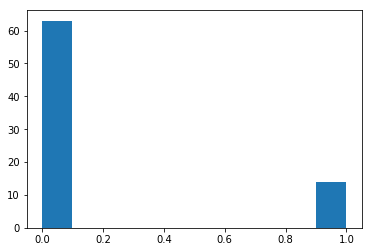

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

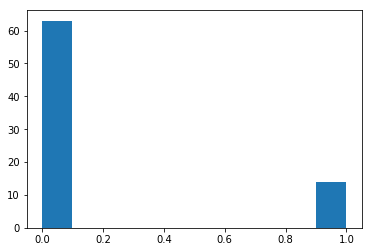

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.00207452, 0.10186707, 0.20165962, 0.30145217, 0.40124471,
        0.50103726, 0.60082981, 0.70062236, 0.8004149 , 0.90020745,
        1.        ]),
 <a list of 10 Patch objects>)

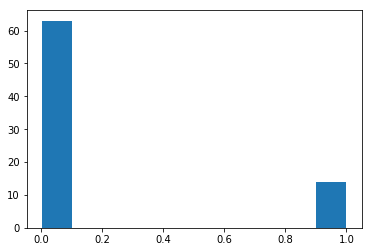

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([1.38127270e-04, 1.00124315e-01, 2.00110502e-01, 3.00096689e-01,
        4.00082876e-01, 5.00069064e-01, 6.00055251e-01, 7.00041438e-01,
        8.00027625e-01, 9.00013813e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

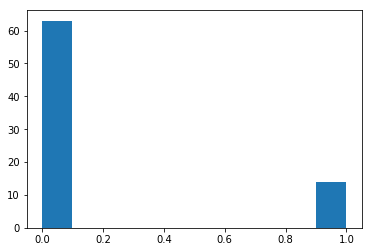

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.00394112, 0.10354701, 0.20315289, 0.30275878, 0.40236467,
        0.50197056, 0.60157645, 0.70118234, 0.80078822, 0.90039411,
        1.        ]),
 <a list of 10 Patch objects>)

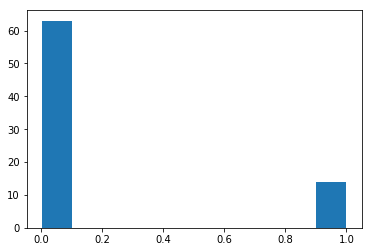

(array([63.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 13.]),
 array([3.18147111e-05, 1.00028633e-01, 2.00025452e-01, 3.00022270e-01,
        4.00019089e-01, 5.00015907e-01, 6.00012726e-01, 7.00009544e-01,
        8.00006363e-01, 9.00003181e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

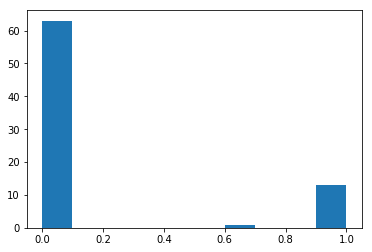

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([3.06101626e-04, 1.00275491e-01, 2.00244881e-01, 3.00214271e-01,
        4.00183661e-01, 5.00153051e-01, 6.00122441e-01, 7.00091830e-01,
        8.00061220e-01, 9.00030610e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

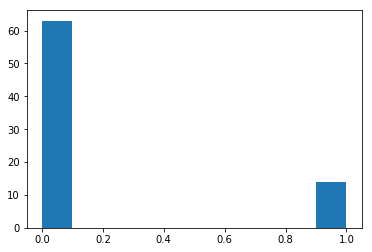

(array([65.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

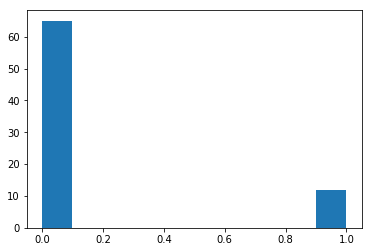

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

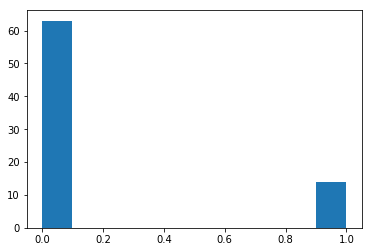

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.00426957, 0.10384262, 0.20341566, 0.3029887 , 0.40256174,
        0.50213479, 0.60170783, 0.70128087, 0.80085391, 0.90042696,
        1.        ]),
 <a list of 10 Patch objects>)

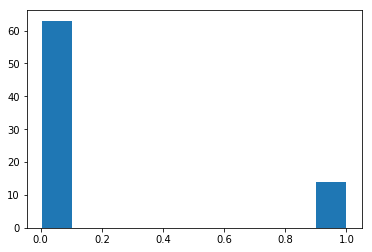

(array([71.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

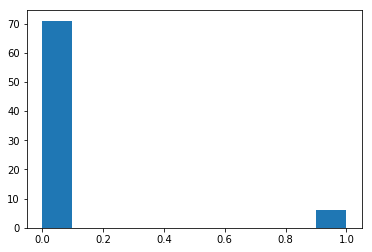

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([8.86819643e-04, 1.00798138e-01, 2.00709456e-01, 3.00620774e-01,
        4.00532092e-01, 5.00443410e-01, 6.00354728e-01, 7.00266046e-01,
        8.00177364e-01, 9.00088682e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

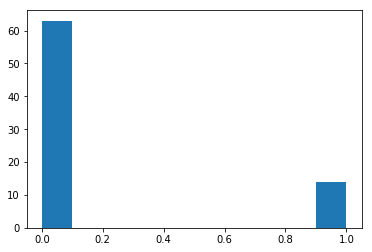

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([1.30536942e-04, 1.00117483e-01, 2.00104430e-01, 3.00091376e-01,
        4.00078322e-01, 5.00065268e-01, 6.00052215e-01, 7.00039161e-01,
        8.00026107e-01, 9.00013054e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

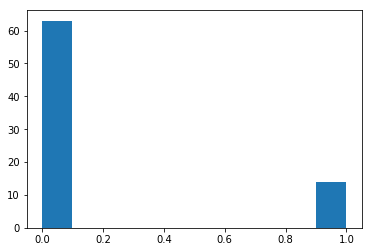

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([8.67799434e-05, 1.00078102e-01, 2.00069424e-01, 3.00060746e-01,
        4.00052068e-01, 5.00043390e-01, 6.00034712e-01, 7.00026034e-01,
        8.00017356e-01, 9.00008678e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

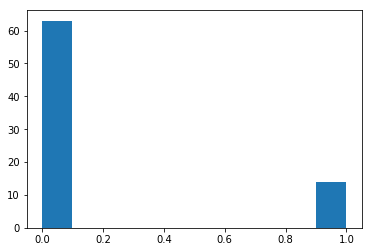

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

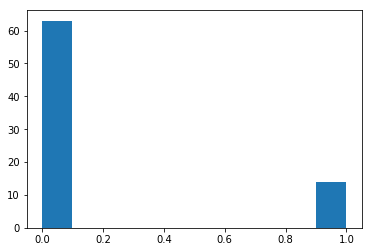

(array([69.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

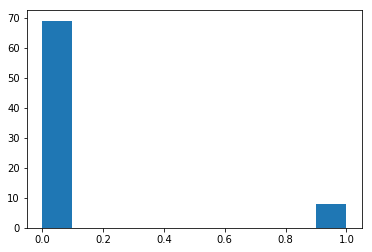

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([1.58360651e-04, 1.00142525e-01, 2.00126689e-01, 3.00110852e-01,
        4.00095016e-01, 5.00079180e-01, 6.00063344e-01, 7.00047508e-01,
        8.00031672e-01, 9.00015836e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

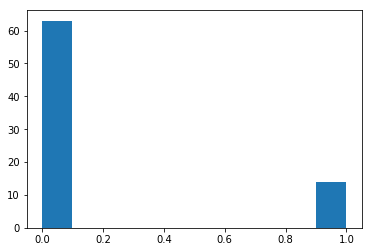

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.00380733, 0.10342659, 0.20304586, 0.30266513, 0.4022844 ,
        0.50190366, 0.60152293, 0.7011422 , 0.80076147, 0.90038073,
        1.        ]),
 <a list of 10 Patch objects>)

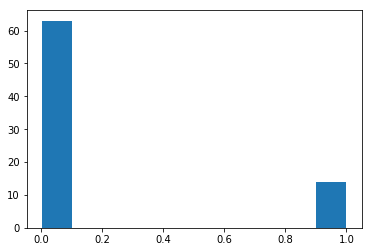

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.00398057, 0.10358251, 0.20318445, 0.3027864 , 0.40238834,
        0.50199028, 0.60159223, 0.70119417, 0.80079611, 0.90039806,
        1.        ]),
 <a list of 10 Patch objects>)

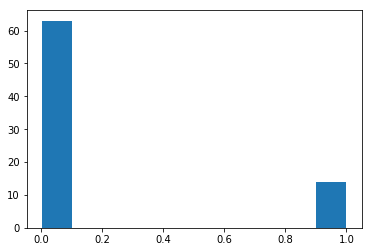

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

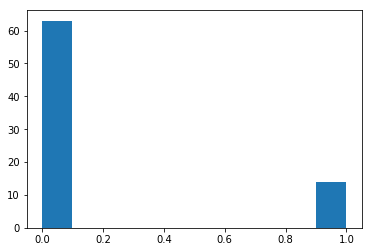

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.00101351, 0.10091216, 0.20081081, 0.30070946, 0.4006081 ,
        0.50050675, 0.6004054 , 0.70030405, 0.8002027 , 0.90010135,
        1.        ]),
 <a list of 10 Patch objects>)

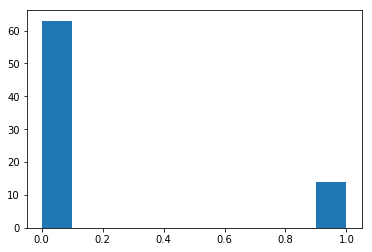

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([2.52729478e-05, 1.00022746e-01, 2.00020218e-01, 3.00017691e-01,
        4.00015164e-01, 5.00012636e-01, 6.00010109e-01, 7.00007582e-01,
        8.00005055e-01, 9.00002527e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

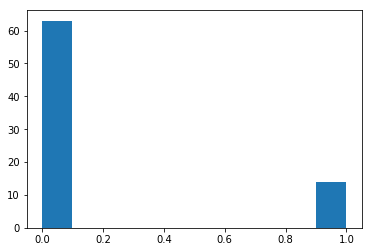

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([7.91803253e-05, 1.00071262e-01, 2.00063344e-01, 3.00055426e-01,
        4.00047508e-01, 5.00039590e-01, 6.00031672e-01, 7.00023754e-01,
        8.00015836e-01, 9.00007918e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

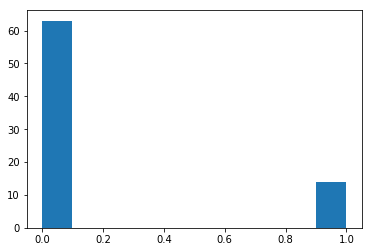

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([2.25627853e-04, 1.00203065e-01, 2.00180502e-01, 3.00157939e-01,
        4.00135377e-01, 5.00112814e-01, 6.00090251e-01, 7.00067688e-01,
        8.00045126e-01, 9.00022563e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

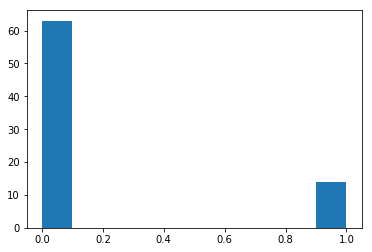

(array([65.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

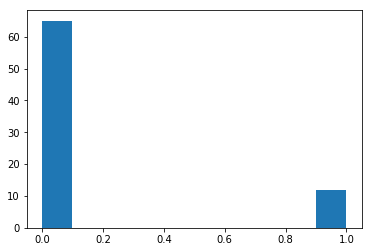

(array([68.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

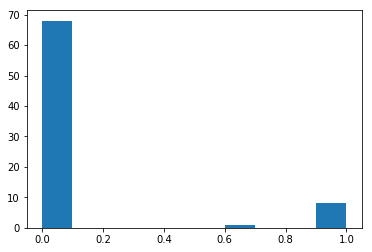

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([1.23333457e-04, 1.00111000e-01, 2.00098667e-01, 3.00086333e-01,
        4.00074000e-01, 5.00061667e-01, 6.00049333e-01, 7.00037000e-01,
        8.00024667e-01, 9.00012333e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

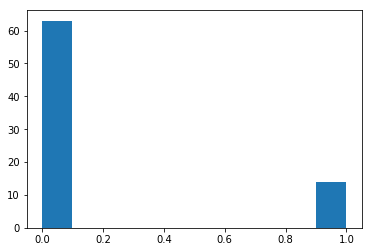

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([6.33442602e-05, 1.00057010e-01, 2.00050675e-01, 3.00044341e-01,
        4.00038007e-01, 5.00031672e-01, 6.00025338e-01, 7.00019003e-01,
        8.00012669e-01, 9.00006334e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

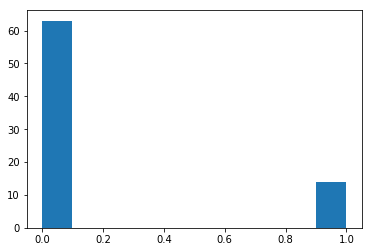

(array([66.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 10.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

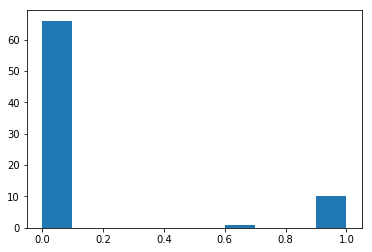

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.00128978, 0.10116081, 0.20103183, 0.30090285, 0.40077387,
        0.50064489, 0.60051591, 0.70038694, 0.80025796, 0.90012898,
        1.        ]),
 <a list of 10 Patch objects>)

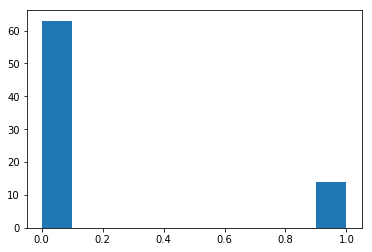

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

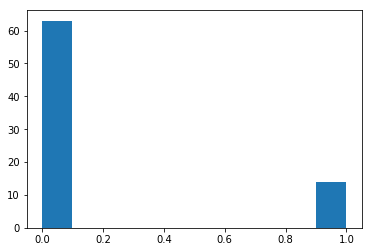

(array([65.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

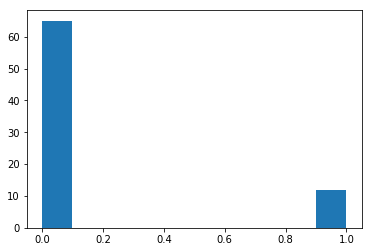

(array([71.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

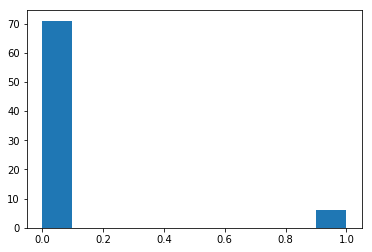

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.00149262, 0.10134335, 0.20119409, 0.30104483, 0.40089557,
        0.50074631, 0.60059705, 0.70044778, 0.80029852, 0.90014926,
        1.        ]),
 <a list of 10 Patch objects>)

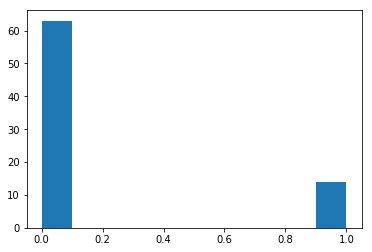

(array([65.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

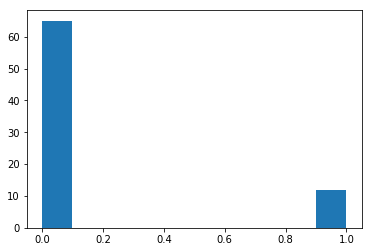

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

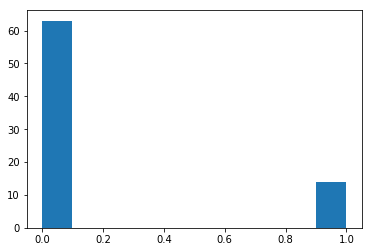

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([7.34787600e-04, 1.00661309e-01, 2.00587830e-01, 3.00514351e-01,
        4.00440873e-01, 5.00367394e-01, 6.00293915e-01, 7.00220436e-01,
        8.00146958e-01, 9.00073479e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

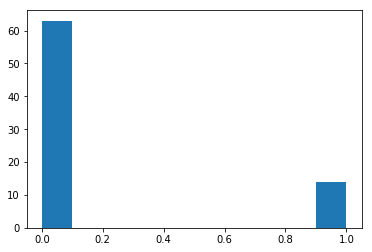

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.00161411, 0.1014527 , 0.20129129, 0.30112987, 0.40096846,
        0.50080705, 0.60064564, 0.70048423, 0.80032282, 0.90016141,
        1.        ]),
 <a list of 10 Patch objects>)

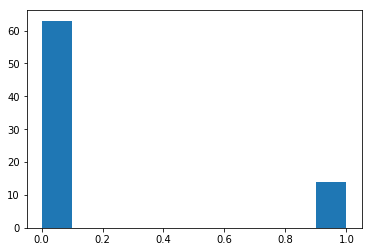

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([2.17561570e-04, 1.00195805e-01, 2.00174049e-01, 3.00152293e-01,
        4.00130537e-01, 5.00108781e-01, 6.00087025e-01, 7.00065268e-01,
        8.00043512e-01, 9.00021756e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

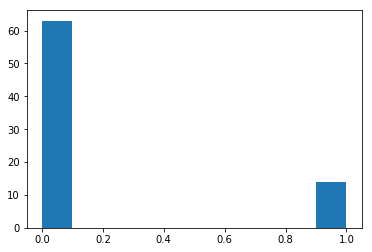

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0.00418842, 0.10376958, 0.20335074, 0.3029319 , 0.40251305,
        0.50209421, 0.60167537, 0.70125653, 0.80083768, 0.90041884,
        1.        ]),
 <a list of 10 Patch objects>)

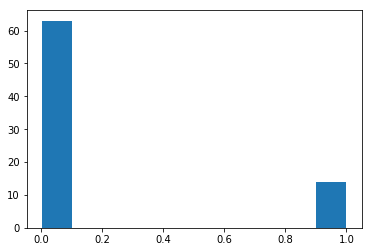

(array([65.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

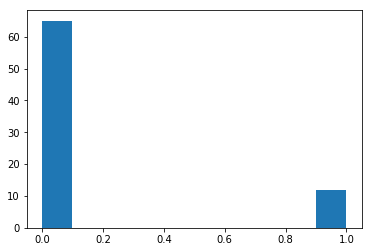

(array([69.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

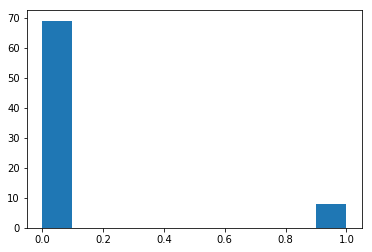

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([1.74049256e-04, 1.00156644e-01, 2.00139239e-01, 3.00121834e-01,
        4.00104430e-01, 5.00087025e-01, 6.00069620e-01, 7.00052215e-01,
        8.00034810e-01, 9.00017405e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

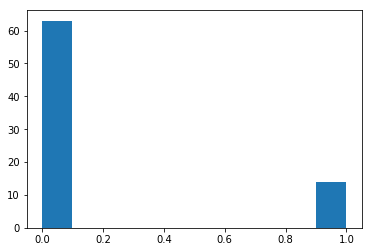

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([4.53823463e-05, 1.00040844e-01, 2.00036306e-01, 3.00031768e-01,
        4.00027229e-01, 5.00022691e-01, 6.00018153e-01, 7.00013615e-01,
        8.00009076e-01, 9.00004538e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

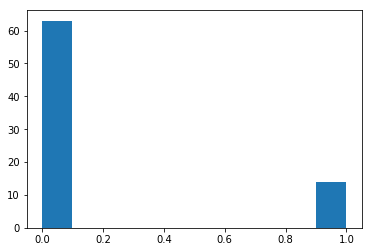

(array([63.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([8.67799434e-05, 1.00078102e-01, 2.00069424e-01, 3.00060746e-01,
        4.00052068e-01, 5.00043390e-01, 6.00034712e-01, 7.00026034e-01,
        8.00017356e-01, 9.00008678e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

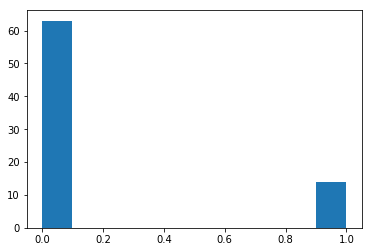

In [28]:
# Using MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train3 = scaler.fit_transform(X_train)
X_test3= scaler.transform(X_test)
X_train3.shape
X_test3.shape
for i in range(77):
    plt.hist(X_train3[i])
    plt.show()

import warnings
warnings.filterwarnings("ignore")

## <font color = RED> II. Regression Task. Applying various Regression models
-  <b><i> Please note that due to computational limitations, I have decided not to use cross-validation with GridSearch in some cases

## <font color = Red> 1. KNN Regression
<font color = Blue>    As we noted above, our dataset has a lot of correlated variables and we do not want that to effect our KNN Regressor model. We will proceed with feature selection so that the variables are not correlated as they will influence the distance equally.
   

In [29]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors = 7).fit(X_train1, y_train)
print(knnreg.predict(X_test1))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test1, y_test)))

[ 64.71428571 104.28571429 150.92857143 ...  47.28571429  66.57142857
  51.        ]
R-squared test score: 0.891


#### <font color = Red> Plotting test and train accuracy

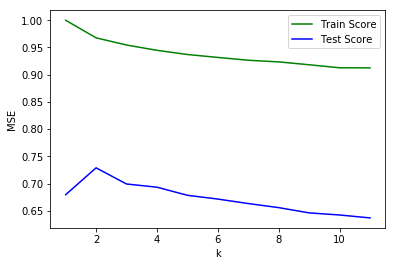

In [115]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,12):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train1, y_train)
    train_score_array.append(knn_reg.score(X_train1, y_train))
    test_score_array.append(knn_reg.score(X_test1, y_test))

x_axis = range(1,12)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE');

<font color=blue> Best Parameter for KNN Regressor: <b> N_Neighbors = 2 </b>

### <font color=red> Plotting true values vs predicted values - KNN (n_neighbors = 2)

In [117]:
from sklearn.neighbors import KNeighborsRegressor

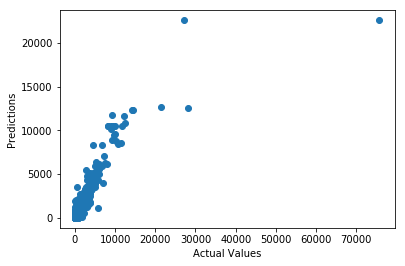

In [118]:
knnreg = KNeighborsRegressor(n_neighbors=2)
knnreg.fit(X_train1, y_train)
predictions = knnreg.predict(X_test1)
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

In [120]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions = knnreg.predict(X_test1)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

432.7618402873267

<font color = blue> Our model is more accurate for lower values and for values in the higher range there is more inconsistency

### <font color=red> Checking Cross Validation Score- KNN

In [121]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsRegressor(n_neighbors=2)
scores = cross_val_score(knn, X_train1, y_train, cv=5)
print("Cross validation scores: {}".format(scores))### Best Parameter for KNN Regressor: - N_Neighbors = 8

Cross validation scores: [0.90601499 0.92023133 0.91814311 0.87106951 0.86438377]


In [122]:
print("Average cv score: {}".format(scores.mean()))### Average cross-validation score for KNN Regressor: 0.9217831277106882

Average cv score: 0.8959685412923699


<font color = blue> The average cross validation score from the KNN regressor with n_neighbors = 2 is <b>  0.8959685412923699 </b>. We can also use GridSearch with Cross-Validation to look for the optimum n_neighbours.

## <font color = Red> 2. Linear Regression

In [82]:
import numpy as np
from sklearn.linear_model import LinearRegression

Reg = LinearRegression()
Reg.fit(X_train1, y_train)
y_predict = Reg.predict(X_train1)

print("lr.coef_: {}".format(Reg.coef_))

print("lr.intercept_: {}".format(Reg.intercept_))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

lr.coef_: [ 3.47643577e+01  5.05500378e+02  4.86820648e+02 -2.36090994e+01
  2.08754004e+01  4.25116202e+01 -1.13505659e+02 -1.44630443e+01
 -1.99151224e+01  2.88395562e+00  7.03722718e+00 -1.67932937e+00
  1.74825394e+01  1.43795334e+01  4.83368149e+01 -2.72143228e+01
 -4.63055847e+00  3.77727568e+01  1.54478676e+01  1.92557465e+01
 -8.57361391e+01 -1.31088856e+01 -1.30511233e+01 -3.37444512e+01
 -7.40507750e+00 -3.87834492e+00 -5.50892959e+00 -3.66742499e+00
  4.00966452e+01 -5.77669113e+01  5.60443989e+00  2.75854103e+01
 -4.29188151e+00  1.73789467e+01 -2.74704685e+01 -2.22051335e+01
  3.26269871e+01  1.35694907e+01 -4.29292793e+01  7.34445517e+00
  5.34874258e+00  8.67013070e+00  1.14258503e+01  7.00213724e+00
  3.32732290e+01  7.38071404e+00  7.77484470e+00  7.62045923e+00
  2.17244563e+00  3.28748114e-02 -9.10587473e-02  7.34186595e-02
 -3.29265012e-02 -2.57451623e-02 -8.03952750e-02 -8.60939182e-02
  1.23724809e+01  5.09407661e+01 -7.44787280e+00 -5.56284232e+01
  5.07644513e+0

In [83]:
print('Train Data score: {}'
     .format(Reg.score(X_train1, y_train)))

print('Test Data score/ R Square: {}'
     .format(Reg.score(X_test1, y_test)))

Train Data score: 0.9485126221266967
Test Data score/ R Square: 0.807531237856965


### <font color=red> Creating a scatter plot for predicted and actual values

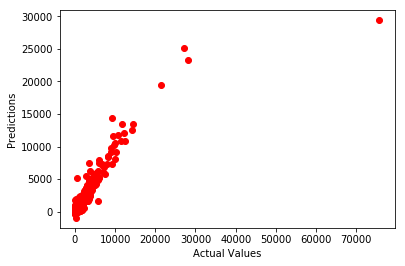

In [84]:
Reg = LinearRegression()
Reg.fit(X_train1, y_train)
predictions = Reg.predict(X_test1)
plt.scatter(y_test, predictions, color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

In [85]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions = Reg.predict(X_test1)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

364.57580091346455

In [86]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Reg, X_train1, y_train, cv=10)
print("Cross validation scores: {}".format(scores))

Cross validation scores: [0.94043248 0.93735391 0.92829173 0.94272783 0.95365334 0.9350239
 0.95414783 0.96714545 0.94581188 0.90759602]


In [87]:
print("Average cross-validation score: {}".format(scores.mean()))

Average cross-validation score: 0.9412184366030525


<font color= blue> Avg Cross Validation Score for Linear Regression is <b> 0.9412184366030525 </b>


## <font color = Red> 3. Ridge Regression

##### - <font color = Red> With default alpha = 1.0

In [88]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train1,y_train)

print('Ridge regression  model coeff (w):\n{}'
      .format(ridge.coef_))
print('\n')

print('Ridge Regression linear intercept (b):\n {:.3f}'
      .format(ridge.intercept_))
print('\n')

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge regression  model coeff (w):
[ 5.21957933e+01  3.42742021e+02  3.11756883e+02  4.78858151e+01
  3.96332947e+01  5.06803638e+01  5.01251551e+01 -1.48155840e+01
 -1.92905486e+01  2.99874518e+00  6.67991156e+00 -1.62990774e+00
  1.74838951e+01  1.43084993e+01  4.85199764e+01 -2.74487725e+01
 -5.12916101e+00  3.79039770e+01  1.59354720e+01  1.93431082e+01
 -8.59082124e+01 -1.31320952e+01 -5.16609351e+00 -2.51932879e+01
 -9.91878820e+00 -3.98855042e+00 -5.44164508e+00 -7.88407081e+00
  3.94194400e+01 -6.09934330e+01  3.24073264e+00  2.86133806e+01
 -3.85158915e+00  1.81895760e+01 -2.60860282e+01 -2.23525144e+01
  3.28831908e+01  1.39767603e+01 -4.31275490e+01  7.03230350e+00
  5.30889274e+00  8.75263932e+00  1.13582745e+01 -1.09326509e+00
  2.47281508e+01  9.90564085e+00  7.97848516e+00  7.57215032e+00
  6.42980043e+00  2.97668245e-02 -9.80013225e-02  6.73827359e-02
 -3.35049347e-02 -3.10491220e-02 -8.06136933e-02 -8.86466896e-02
  1.27180148e+01  4.99027774e+01 -7.04378174e+00 -5.524

In [89]:
print('R-squared score (training set): {:.3f}'
       .format(ridge.score(X_train1, y_train)))
print('\n')

print('R-squared score (test set): {:.3f}'
       .format(ridge.score(X_test1,y_test)))


R-squared score (training set): 0.948


R-squared score (test set): 0.807


##### - <font color = Red> Grid Search for Ridge

In [90]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha':[0.01, 1, 5, 10, 100, 1000]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train1, y_train)

print(' \n Best parameter: {}'.format(grid_search.best_params_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 1, 5, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

 
 Best parameter: {'alpha': 1000}


In [91]:
param_grid = {'alpha':[500,700,900,1100,1500,2000]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train1, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [500, 700, 900, 1100, 1500, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameters: {'alpha': 1500}


In [95]:
param_grid = {'alpha':[1200,1300,1400,1500,1600,1700,2000]}

grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train1, y_train)
print('Best parameters: {}'.format(grid_search.best_params_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1200, 1300, 1400, 1500, 1600, 1700, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameters: {'alpha': 1600}


In [96]:
print('Best Score: {}'.format(grid_search.best_score_))

Best Score: 0.9420333236383074


<font color =Blue>  Best Parameter for Ridge Regressor is <b> Alpha = 1600 </b>    

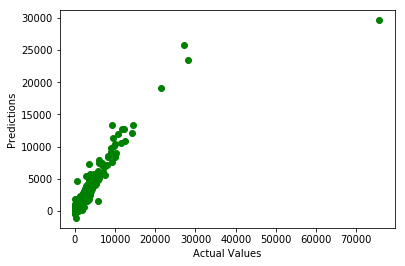

In [100]:
grid_search = GridSearchCV(ridge, param_grid, cv = 5)
grid_search.fit(X_train1, y_train)
predictions = grid_search.predict(X_test1)
plt.scatter(y_test, predictions, color='Green')
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

##### - <font color = Red> Ridge Linear Regression RMSE

In [101]:
from sklearn.metrics import mean_squared_error
from math import sqrt
ridge = Ridge().fit(X_train1, y_train)
predictions = ridge.predict(X_test1)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

364.6232818436187

- <font color=blue> Checking Cross Validation Score- Ridge

In [104]:
ridge=Ridge(alpha=1600)

In [105]:
scoresr = cross_val_score(ridge, X_train1, y_train, cv=5)
print("Cross validation scores: {}".format(scoresr))

Cross validation scores: [0.93949423 0.94186665 0.9481724  0.96024524 0.92038845]


In [106]:
print("Average cross-validation score: {}".format(scoresr.mean()))

Average cross-validation score: 0.9420333928839533


- <font color=blue> The average cross-validation score for Ridge regression is  0.9420333928839533

## <font color = Red> 4. Lasso Regression

- <font color =blue> alpha by default is 0

In [108]:
sample_data.shape

(58325, 77)

In [109]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train1,y_train)

print('Lasso regression linear model coeff (w):{}'
      .format(lasso.coef_))
print('\n')

print('Lasso Regression linear model intercept (b): {:.3f}'
      .format(lasso.intercept_))
print('R-squared score (training): {}'
       .format(lasso.score(X_train1, y_train)))
print('\n')

print('R-squared score (test): {}'
       .format(lasso.score(X_test1, y_test)))
print('\n')

print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X), lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Lasso regression linear model coeff (w):[-0.00000000e+00  3.11302686e+01  2.42837938e+00  2.25299942e+01
  0.00000000e+00  0.00000000e+00  8.64736378e+01 -6.34993735e+00
 -7.19226215e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  2.78739529e+00  1.61087330e+01  3.64543255e+01  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  2.03046738e+01  1.13947210e+01
 -7.22923168e+01 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.96264700e+01 -1.95751335e+00 -0.00000000e+00
 -9.10614790e+00 -3.44513307e+00 -0.00000000e+00 -7.67883598e+00
  7.39023374e+00  8.07909890e+00 -4.90880525e+00  0.00000000e+00
  6.39781945e+00 -1.96954313e-01 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -1.92203239e-02  0.00000000e+00
 -1.02310953e-02 -8.64550675e-03 -4.54473163e-02 -2.36158121e-02
  0.00000000e+00 -0.00000000e+00 -4.69891895e+00 -

##### - <font color = Red> Grid Search for Lasso

In [123]:
lasso = Lasso(max_iter = 10000).fit(X_train1, y_train)
param_grid = {'alpha':[0.5, 1, 2, 3, 5, 10, 50,100]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train1, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.5, 1, 2, 3, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [124]:
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

Best parameters: {'alpha': 2}
Best score: 0.9424811963493169


In [129]:
#update alpha value from above
lasso = Lasso(alpha=2.0).fit(X_train1, y_train)
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Number of features used: 32


In [130]:
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

Best parameters: {'alpha': 2}
Best score: 0.9424811963493169


 - <font color =blue> Best Parameter for Lasso Regressor: <b> alpha= 2.0    ;  Optimal Number of Features: 32 </b>

##### - <font color =blue> Optimal Number of Features and their labels

In [131]:
#use the optimal number of labels from above
lasso = Lasso(alpha=2.0).fit(X_train1, y_train )
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

print('Features with weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X), lasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Number of features used: 32
Features with weight (sorted by absolute magnitude):
	NCD_6, 112.069
	AS(NA)_6, -61.608
	AS(NA)_0, 28.631
	AS(NA)_4, 19.139
	NCD_3, 18.138
	AI_6, 14.719
	NAD_6, 12.195
	AS(NA)_5, 11.154
	NA_4, -9.332
	NCD_1, 9.252
	NA_2, -8.070
	AS(NAC)_6, -7.673
	AS(NAC)_2, 6.832
	AI_0, -6.085
	NCD_2, 4.549
	NA_3, -3.504
	NAD_0, -3.264
	AS(NA)_1, 2.963
	AI_1, -2.890
	AS(NAC)_1, 2.869
	AS(NAC)_5, 2.189
	NA_5, -2.167
	NAC_5, -2.005
	NAC_4, -1.877
	NAC_0, -1.771
	AI_5, 0.213
	ADL_6, 0.039
	AT_5, -0.035
	ADL_1, -0.032
	AT_0, 0.019
	AT_4, -0.012
	ADL_2, -0.003


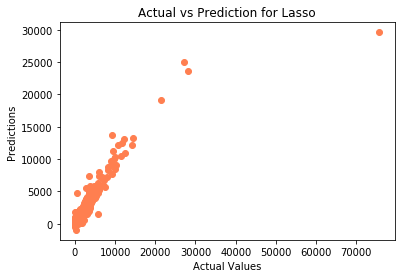

In [135]:
#Plotting chart for predicted and actual values
lasso = Lasso(alpha=2.0).fit(X_train1, y_train)
predictions = lasso.predict(X_test1)
plt.scatter(y_test, predictions, color='Coral')
plt.xlabel("Actual Values")
plt.ylabel("Predictions")
plt.title('Actual vs Prediction for Lasso');

##### - <font color =blue> RMSE from LASSO 

In [136]:
#alpha from above
from sklearn.metrics import mean_squared_error
from math import sqrt
lasso=Lasso(alpha=2.0, max_iter=10000).fit(X_train1, y_train)
predictions = lasso.predict(X_test1)
rmse= sqrt(mean_squared_error(y_test , predictions))
rmse

362.5363236379406

##### - <font color =blue> Cross-validation for LASSO

In [166]:
lasso=Lasso(alpha=2.0, max_iter=10000)
scoresla = cross_val_score(lasso, X_train1, y_train, cv=5)
print("Cross validation scores: {}".format(scoresla))
print("Average cross-validation score: {}".format(scoresla.mean()))

Cross validation scores: [0.93994586 0.94272136 0.94868818 0.95978152 0.92126937]
Average cross-validation score: 0.942481255087085


- <font color = blue> Average cross-validation score for Lasso:  0.942481255087085

## <font color =red> 5. Polynomial regression

In [138]:
from sklearn.preprocessing import PolynomialFeatures

In [139]:
poly = PolynomialFeatures(degree = 2)

X_train_pol= poly.fit_transform(X_train1)
X_test_pol = poly.fit_transform(X_test1)
X_train_pol.shape
X_test_pol.shape

(39077, 3081)

(19248, 3081)

In [140]:
from sklearn.linear_model import LinearRegression
Reg = LinearRegression()

Reg.fit(X_train_pol, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [141]:
print('(poly deg 2) linear model intercept (b): {}'
     .format(Reg.intercept_))
print('(poly deg 2) R-squared score (training): {}'
     .format(Reg.score(X_train_pol, y_train)))
print('(poly deg 2) R-squared score (test): {}\n'
     .format(Reg.score(X_test_pol, y_test)))

(poly deg 2) linear model intercept (b): 14312.533854884114
(poly deg 2) R-squared score (training): 0.9815183342367729
(poly deg 2) R-squared score (test): -1.2583709611082665



<font color =blue> Our model performs well on the test set but it's prediction is extremely poor. Our model is suffering from over-fitting. We often use polynomial features in combination with regression that has a regularization penalty, like ridge regression

In [150]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_pol, y_train)
print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(ridge.coef_))

(poly deg 2 + ridge) linear model coeff (w):
[  0.         -42.39728314 -11.13845619 ... -70.10241171 -23.87952767
  46.25361736]


In [151]:
print('(poly deg 2 + ridge) linear model intercept (b): {}'
     .format(ridge.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {}'
     .format(ridge.score(X_train_pol, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {}'
     .format(ridge.score(X_test_pol, y_test)))

(poly deg 2 + ridge) linear model intercept (b): 24.61665148857898
(poly deg 2 + ridge) R-squared score (training): 0.9803322807112421
(poly deg 2 + ridge) R-squared score (test): -1.7130084108055228


##### -<font color = blue> Grid Search for Polynomial with Ridge

In [152]:
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
param_grid = {'alpha' : [0.01, 1, 5, 10, 50 , 100]}
grid_search = GridSearchCV(ridge, param_grid,cv=5)
grid_search.fit(X_train_pol, y_train)

print('Best parameter: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 1, 5, 10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameter: {'alpha': 100}
Best score: -0.1524091137372458


In [154]:
###### REVISE THIS AFTER OUTPUT FROM ABOVE
param_grid = {'alpha' : [100, 300, 500, 1000,10000,100000]}
grid_search = GridSearchCV(ridge, param_grid)
grid_search.fit(X_train_pol, y_train)
print('Best parameter: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [100, 300, 500, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameter: {'alpha': 10000}
Best score: 0.2999826294947015


- <font color = blue> Best Parameter for Polynomial with Ridge Regressor:  Alpha=10000, which is very huge and this might be due to te reason that we have a too many variables in our model leading to over-fitting in the training set. Even with Ridge regression we have not solved the problem of over fitting
    

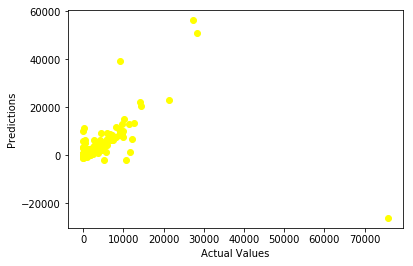

In [155]:
#plotting actual and predicted values for this regression
ridge=Ridge(alpha=10000)
ridge.fit(X_train_pol, y_train)
predictions = ridge.predict(X_test_pol)
plt.scatter(y_test, predictions, color='yellow')
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

##### - <font color =blue> RMSE from Pol. with Ridge

In [156]:
from sklearn.metrics import mean_squared_error
from math import sqrt
ridge=Ridge(alpha=10000)
ridge.fit(X_train_pol, y_train)
predictions = ridge.predict(X_test_pol)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

849.7014477276695

##### - <font color =blue> Cross-Validation Pol. with Ridge

In [157]:
ridge=Ridge(alpha=10000)

In [159]:
from sklearn.model_selection import cross_val_score
scoresp = cross_val_score(ridge, X_train_pol, y_train, cv=5)
print("Cross validation scores: {}".format(scoresp))

Cross validation scores: [ 0.8545069  -2.50879441  0.90795126  0.53630468  0.55899887]


In [160]:
print("Average cross-validation score: {}".format(scoresp.mean()))

Average cross-validation score: 0.06979345871869244


- <font color = blue> Average cross-validation score for Polynomial Regression with Ridge: 0.06979345871869244, which is extremely low and understandable with a total of 3000+ variables (the original variables that are already very correlated)

## <font color =red> 6. SVM

#### <font color = RED> SVR Simple Kernels

In [143]:
from sklearn.svm import LinearSVR

lsvr = LinearSVR(random_state=10).fit(X_train1, y_train)
print('Coefficients:\n', lsvr.coef_)
print('Intercepts:\n', lsvr.intercept_)

print('Accuracy of Linear SVR classifier on training set: {}'
     .format(lsvr.score(X_train1, y_train)))
print('Accuracy of Linear SVR classifier on test set: {}'
     .format(lsvr.score(X_test1, y_test)))

Coefficients:
 [-2.13883580e+00  1.44692422e+01  1.09534622e+01  1.11640170e+01
  1.21324487e+01  1.05405506e+01  4.69469496e+01 -1.35783399e+01
 -1.73950742e+01  3.43142801e+00  8.02977527e+00 -1.36115336e+00
  1.21740228e+01  1.49486598e+01  2.30674858e+01 -7.15262832e+00
 -3.67668520e+00 -3.91098496e+00  8.82781596e+00 -2.42991325e+00
 -1.87471292e+01 -5.35165940e-01 -7.72520676e-02 -9.05868332e-02
 -1.45431038e-01  6.76529427e-02  4.67241934e-01 -2.62244244e-01
 -3.23604695e+00 -1.91075234e+01 -8.06783142e+00  2.79708673e-01
 -8.29890797e+00 -5.35747139e+00  3.48273301e+01  3.20034396e+00
  1.30198422e+01  9.15316682e+00  1.84516932e+00  4.48067133e+00
  3.51974246e+00 -3.25023072e+01  4.89587351e-01 -2.19287187e-01
 -1.24532915e-03  3.16693917e-01 -6.75564963e-02 -4.36618386e-01
 -7.14578720e-01 -3.61867419e-02 -3.20641383e-02  5.88900301e-04
 -7.81740956e-03  9.90713727e-03 -4.82278058e-02  1.43875861e-02
  1.69637728e+01  3.15770845e+01 -3.67856071e+00 -1.36129516e+01
 -8.566096

In [144]:
lsvr = LinearSVR(random_state=10).fit(X_train1, y_train)
param_grid = {'C':[0.0001, 0.001, 0.01, 1, 10, 100, 1000],
             'epsilon': [100, 1000, 10000]}

grid_search = GridSearchCV(lsvr, param_grid, cv = 5)
grid_search.fit(X_train1, y_train)

print('Best parameter of Linear SVR Regressor: {}'.format(grid_search.best_params_))
print('Best score of Linear SVR Regressor: {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=10, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000], 'epsilon': [100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameter of Linear SVR Regressor: {'C': 1, 'epsilon': 100}
Best score of Linear SVR Regressor: 0.9413008182328729


In [162]:
lsvr = LinearSVR(random_state=10).fit(X_train1, y_train)
param_grid = {'C':[1,3,5,7,9],
             'epsilon': [50,70,100,130,150,300,500,700]}

grid_search = GridSearchCV(lsvr, param_grid, cv = 5)
grid_search.fit(X_train1, y_train)

print('Best parameter of Linear SVR Regressor: {}'.format(grid_search.best_params_))
print('Best score of Linear SVR Regressor: {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=10, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 3, 5, 7, 9], 'epsilon': [50, 70, 100, 130, 150, 300, 500, 700]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameter of Linear SVR Regressor: {'C': 1, 'epsilon': 50}
Best score of Linear SVR Regressor: 0.9417801768766292


In [164]:
lsvr = LinearSVR(random_state=10).fit(X_train1, y_train)
param_grid = {'C':[1,1.5],
             'epsilon': [20,30,40,50]}

grid_search = GridSearchCV(lsvr, param_grid, cv = 5)
grid_search.fit(X_train1, y_train)

print('Best parameter of Linear SVR Regressor: {}'.format(grid_search.best_params_))
print('Best score of Linear SVR Regressor: {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=10, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 1.5], 'epsilon': [20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameter of Linear SVR Regressor: {'C': 1.5, 'epsilon': 30}
Best score of Linear SVR Regressor: 0.9419837297295581


- <font color = blue> Best Parameter for SVM SIMPLE KERNEL is <b> C = 1.5 and epsilon = 30 </b>

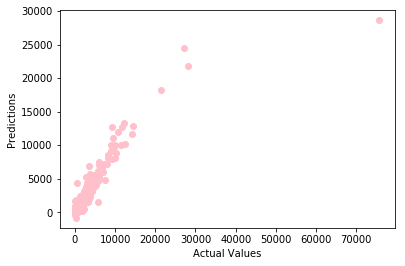

In [163]:
#plotting actual and predicted values for this regression
lsvr = LinearSVR(random_state=10).fit(X_train1, y_train)
predictions = lsvr.predict(X_test1)
plt.scatter(y_test, predictions, color='Pink')
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

##### - <font color = blue> Calculating RMSE for SVM Simple Kernels

In [165]:
from sklearn.metrics import mean_squared_error
from math import sqrt
lsvr = LinearSVR(C= 1.5, epsilon= 30, random_state=10).fit(X_train1, y_train)
predictions = lsvr.predict(X_test1)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

366.5371015037548

##### - <font color = blue> Cross-Validation score for SVM Simple Kernels

In [167]:
lsvr = LinearSVR(C = 1.5, epsilon = 30, random_state=10).fit(X_train1, y_train)
scoressvms = cross_val_score(lsvr, X_train1, y_train, cv=5)
print("Cross validation scores: {}".format(scoressvms))
print("Average cross-validation score: {}".format(scoresla.mean()))

Cross validation scores: [0.94304899 0.9416717  0.95019633 0.95761946 0.91738207]
Average cross-validation score: 0.942481255087085


- <font color = blue> Average CV score for SVM SIMPLE KERNELS is 0.942481255087085

### <font color='red'> SVM(Linear Kernel)

I have taken a really small sample size as a single block of code with 1% of the data was taking more than 10 hours to run. I understand that the current sample  size with the number of variables is not a good sized data for modelling and the results depict that.

In [13]:
from sklearn.model_selection import train_test_split
_, sample_dat, _, sample_tar = train_test_split(X, y, shuffle = True, test_size = 0.0005)
sample_dat.shape
sample_tar.shape

from sklearn.model_selection import train_test_split
X_trainsvm, X_testsvm, y_trainsvm, y_testsvm = train_test_split(sample_dat,sample_tar, test_size = 0.33, random_state = 10)
X_trainsvm.shape
X_testsvm.shape
y_trainsvm.shape
y_testsvm.shape

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_trainsvm = scaler.fit_transform(X_trainsvm)
X_testsvm = scaler.transform(X_testsvm)
X_trainsvm.shape
X_testsvm.shape


(292, 77)

(292,)

(195, 77)

(97, 77)

(195,)

(97,)

(195, 77)

(97, 77)

In [13]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR(kernel = 'linear')
param_grid = {'C':[1, 10, 100], 
              'epsilon': [1, 10, 100]}

grid_search = GridSearchCV(svr, param_grid,cv = 5)
grid_search.fit(X_trainsvm, y_trainsvm)

print('Best parameter {}'.format(grid_search.best_params_))
print('Best score {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100], 'epsilon': [1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameter {'C': 10, 'epsilon': 1}
Best score 0.82051043647298


In [14]:
svr = SVR(kernel = 'linear')
param_grid = {'C':[2, 5, 7,9,10], 
              'epsilon': [0.001,0.01, 1, 5, 7]}

grid_search = GridSearchCV(svr, param_grid,cv =5)
grid_search.fit(X_trainsvm, y_trainsvm)

print('Best parameter {}'.format(grid_search.best_params_))
print('Best score {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [2, 5, 7, 9, 10], 'epsilon': [0.001, 0.01, 1, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameter {'C': 10, 'epsilon': 5}
Best score 0.8251494368006722


- <font color = blue> Best Parameter for SVM (Linear) is <b> C = 10 and epsilon = 5 </b>

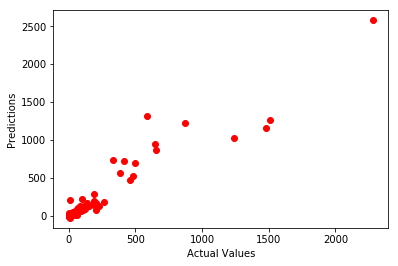

In [16]:
#plotting actual and predicted values for this regression
svr = SVR(kernel = 'linear', epsilon=5, C=10).fit(X_trainsvm,y_trainsvm)
predictions = svr.predict(X_testsvm)
plt.scatter(y_testsvm, predictions, color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

##### - <font color = blue> Calculating RMSE for SVM Linear

In [17]:
from sklearn.metrics import mean_squared_error
from math import sqrt
svr = SVR(kernel = 'linear', epsilon=5, C=10).fit(X_trainsvm,y_trainsvm)
predictions = svr.predict(X_testsvm)
rmse= sqrt(mean_squared_error(y_testsvm, predictions))
rmse

125.65592252511783

##### - <font color = blue> Cross-Validation score for SVM Linear

In [18]:
from sklearn.model_selection import cross_val_score
svr = SVR(kernel = 'linear', epsilon=5, C=10)
scoresSVL = cross_val_score(svr, X_trainsvm, y_trainsvm, cv=5)
print("Cross validation scores: {}".format(scoresSVL))
print("Average cross-validation score: {}".format(scoresSVL.mean()))

Cross validation scores: [0.68976898 0.78644352 0.84224157 0.91206165 0.89523147]
Average cross-validation score: 0.8251494368006723


### <font color='red'> SVM RBF

In [20]:

svr = SVR(kernel = 'rbf',gamma='auto')
param_grid = {'C':[0.001 ,0.01, 0.1, 1, 10, 100], 
              'epsilon': [0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_trainsvm, y_trainsvm)
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'epsilon': [0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameters: {'C': 100, 'epsilon': 10}
Best score: 0.10377884160865351


In [23]:
svr = SVR(kernel = 'rbf',gamma='auto')
param_grid = {'C':[11,30,50,70, 100,400,500,700,900,1000,10000,100000], 
              'epsilon': [2,4,5,11,13,15]}

grid_search = GridSearchCV(svr, param_grid, cv = 5)
grid_search.fit(X_trainsvm, y_trainsvm)
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [11, 30, 50, 70, 100, 400, 500, 700, 900, 1000, 10000, 100000], 'epsilon': [2, 4, 5, 11, 13, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameters: {'C': 400, 'epsilon': 2}
Best score: 0.15513368571868022


- <font color = blue> Best Parameter for SVM (Linear) is <b> C = 400 and epsilon = 2 </b>

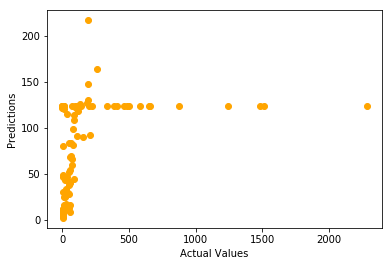

In [26]:
#plotting actual and predicted values for this regression
svr = SVR(kernel = 'rbf', epsilon=2, C=400,gamma='auto').fit(X_trainsvm,y_trainsvm)
predictions = svr.predict(X_testsvm)
plt.scatter(y_testsvm, predictions, color='orange')
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

##### - <font color = blue> Calculating RMSE for SVM RBF

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt
svr = SVR(kernel = 'rbf', epsilon=11, C=400, gamma='auto').fit(X_trainsvm,y_trainsvm)
predictions = svr.predict(X_testsvm)
rmse= sqrt(mean_squared_error(y_testsvm, predictions))
rmse

348.16114337857965

##### - <font color = blue> Cross-Validation score for SVM RBF

In [29]:
svr = SVR(kernel = 'rbf', epsilon=2, C=400, gamma='auto')
scoresSVRBF = cross_val_score(svr, X_trainsvm, y_trainsvm, cv=5)
print("Cross validation scores: {}".format(scoresSVRBF))
print("Average cross-validation score: {}".format(scoresSVRBF.mean()))

Cross validation scores: [0.12521126 0.22848582 0.16515778 0.10657751 0.15023606]
Average cross-validation score: 0.15513368571868022


### <font color='red'> SVM Polynomial 

In [16]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR(kernel = 'poly', degree=2, gamma='auto')
param_grid = {'C':[1, 10, 100, 1000], 
              'epsilon': [1, 10, 100, 1000]}
grid_search = GridSearchCV(svr, param_grid,cv = 5)
grid_search.fit(X_trainsvm, y_trainsvm)
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000], 'epsilon': [1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameters: {'C': 1, 'epsilon': 1}
Best score: -2.3929616972588943


In [18]:
svr = SVR(kernel = 'poly', degree=2, gamma='auto')
param_grid = {'C':[0.001, 0.01, 1, 3, 5, 7, 9], 
              'epsilon': [0.001, 0.01, 1, 3, 5, 7, 9]}
grid_search = GridSearchCV(svr, param_grid,cv = 5)
grid_search.fit(X_trainsvm, y_trainsvm)
print('Best parameters: {}'.format(grid_search.best_params_))
print('Best score: {}'.format(grid_search.best_score_))

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 1, 3, 5, 7, 9], 'epsilon': [0.001, 0.01, 1, 3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best parameters: {'C': 0.01, 'epsilon': 0.001}
Best score: 0.4226063731159316


- <font color = blue> Best Parameter for SVM (Poly) is <b> C = 0.01 and epsilon = 0.001 </b>

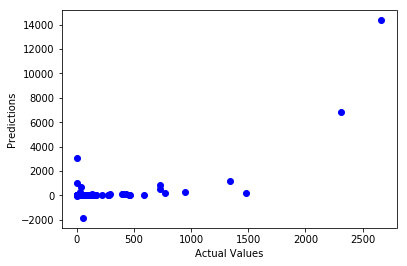

In [21]:
#plotting actual and predicted values for this regression
svr = SVR(kernel = 'poly', epsilon=0.001, C=0.01, gamma='auto').fit(X_trainsvm,y_trainsvm)
predictions = svr.predict(X_testsvm)
plt.scatter(y_testsvm, predictions, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

##### - <font color = blue> Calculating RMSE for SVM POLY

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
svr = SVR(kernel = 'poly', epsilon=0.001, C=0.01, gamma='auto').fit(X_trainsvm,y_trainsvm)
predictions = svr.predict(X_testsvm)
rmse= sqrt(mean_squared_error(y_testsvm, predictions))
rmse

1342.5838962883347

##### - <font color = blue> Cross-Validation score for SVM POLY

In [26]:
from sklearn.model_selection import cross_val_score
svr = SVR(kernel = 'poly', epsilon=0.001, C=0.01, gamma='auto')
scoresSVRBF = cross_val_score(svr, X_trainsvm, y_trainsvm, cv=5)
print("Cross validation scores: {}".format(scoresSVRBF))
print("Average cross-validation score: {}".format(scoresSVRBF.mean()))

Cross validation scores: [  -3.49924617 -838.95579053   -4.99629428 -401.8986096  -262.07344724]
Average cross-validation score: -302.284677564801


## <font color=red> 7. SGD Regressor

In [16]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
model = SGDRegressor()
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
}
clf = GridSearchCV(model, param_grid)
clf.fit(X_train1, y_train)
print("Best score: " + str(clf.best_score_))

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]), 'loss': ['squared_loss', 'huber', 'epsilon_insensitive'], 'penalty': ['l2', 'l1', 'elasticnet'], 'learning_rate': ['constant', 'optimal', 'invscaling']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Best score: 0.9422693681853435


In [18]:
print('Best parameters: {}'.format(clf.best_params_))

Best parameters: {'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'penalty': 'l1'}


- <font color = blue> Best Parameter for SGD Regressor = 'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'penalty': 'l1'

In [33]:
#SGD MODEL WITH BEST PARAMETERS
sgd_reg = SGDRegressor(alpha=0.001, learning_rate = 'optimal',loss='epsilon_insensitive', penalty = 'l1')
sgd_reg.fit(X_train1, y_train)
print(sgd_reg.score(X_train1, y_train))
print(sgd_reg.score(X_test1, y_test))

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='epsilon_insensitive', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l1', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

0.954426657638735
0.949857744680631


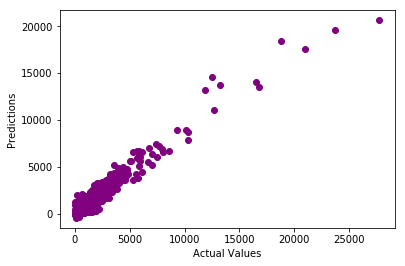

In [36]:
#plotting actual and predicted values for this regression
sgd_reg = SGDRegressor(alpha=0.001, learning_rate = 'optimal',loss='epsilon_insensitive', penalty = 'l1')
sgd_reg.fit(X_train1, y_train)
predictions = sgd_reg.predict(X_test1)
plt.scatter(y_test, predictions, color='purple')
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

##### - <font color = blue> Calculating RMSE for SGD Regressor

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sgd_reg = SGDRegressor(alpha=0.001, learning_rate = 'optimal',loss='epsilon_insensitive', penalty = 'l1')
sgd_reg.fit(X_train1, y_train)
predictions = sgd_reg.predict(X_test1)
rmse= sqrt(mean_squared_error(y_test, predictions))
rmse

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='epsilon_insensitive', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l1', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

141.90913009607473

##### - <font color = blue> Cross Validation Score for SGD Regressor

In [42]:
from sklearn.model_selection import cross_val_score
sgd_reg = SGDRegressor(alpha=0.001, learning_rate = 'optimal',loss='epsilon_insensitive', penalty = 'l1')
scoresSGD = cross_val_score(sgd_reg, X_train1, y_train, cv=5)
print("Cross validation scores: {}".format(scoresSGD))
print("Average cross-validation score: {}".format(scoresSGD.mean()))

Cross validation scores: [0.96978022 0.90870717 0.9295965  0.95299077 0.93985265]
Average cross-validation score: 0.9401854613052631


# <center> <font color=green> Summary Of Scores for Models
<font color=green>\begin{array}{rr} \hline 
Models &RMSE &CV-score &parameters   \\ \hline
KNN &432.7618402873267 &0.8959685412923699 &n=2  \\ \hline
Linear Reg &364.57580091346455 &0.9412184366030525 &  \\ \hline
Ridge &364.6232818436187 &0.9420333928839533 &alpha = 1600 \\ \hline
Lasso &362.5363236379406 &0.942481255087085 &alpha = 2.0 ; Optimal Number of Features: 32   \\ \hline
Polynomial(Ridge) &849.7014477276695 &0.06979345871869244 &alpha=10000  \\ \hline
SVM Simple &366.5371015037548 &0.9419837297295581  &C = 1.5 and epsilon = 30  \\ \hline
SVM (linear) &125.65592252511783 &0.8251494368006723 &  C = 10 and epsilon = 5  \\ \hline
SVM (RBF) &348.16114337857965 &0.15513368571868022 & C = 400 and epsilon = 2  \\ \hline
SVM (Poly) &1342.5838962883347 &-302.284677564801
 &C = 0.01 and epsilon = 0.001   \\ \hline
SGD &141.90913009607473 &0.9401854613052631 &'alpha': 0.001, 'learning_rate': 'optimal', 'loss':'epsilon_insensitive', 'penalty': 'l1'  \\ \hline
\end{array}

### <font color="Blue"> The Lowest RMSE and Highest AVG Cross Validation Score will help us identify the best regressor for our data
    
<b><font color=red> SGD Regressor :-  RMSE = 141.90913009607473, Avg Score= 0.9401854613052631; Paramters=> {′ 𝑎𝑙𝑝ℎ𝑎 ′ :0.001, ′ 𝑙𝑒𝑎𝑟𝑛𝑖𝑛𝑔 𝑟 𝑎𝑡𝑒 ′ : ′ 𝑜𝑝𝑡𝑖𝑚𝑎𝑙 ′ , ′ 𝑙𝑜𝑠𝑠 ′ : ′ 𝑒𝑝𝑠𝑖𝑙𝑜𝑛 𝑖 𝑛𝑠𝑒𝑛𝑠𝑖𝑡𝑖𝑣𝑒 ′ , ′ 𝑝𝑒𝑛𝑎𝑙𝑡𝑦 ′ : ′ 𝑙1 ′}

## <font color='red'>  Training Model on the Entire DataSet using SGD Regressor

In [13]:
#preparing full dataset
from sklearn.model_selection import train_test_split
X_trainfinal, X_testfinal, y_trainfinal, y_testfinal = train_test_split(X, y, test_size = 0.33, random_state = 10)
X_trainfinal.shape
X_testfinal.shape
y_trainfinal.shape
y_testfinal.shape

(390777, 77)

(192473, 77)

(390777,)

(192473,)

In [14]:
#scaling the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_trainfinal = scaler.fit_transform(X_trainfinal)
X_testfinal = scaler.transform(X_testfinal)
X_trainfinal.shape
X_testfinal.shape

(390777, 77)

(192473, 77)

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(alpha=0.001, learning_rate = 'optimal',loss='epsilon_insensitive', penalty = 'l1')
sgd_reg.fit(X_trainfinal, y_trainfinal)
print(sgd_reg.score(X_trainfinal, y_trainfinal))
print(sgd_reg.score(X_testfinal, y_testfinal))

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='epsilon_insensitive', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l1', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

0.90028941011959
0.9180657610341223


##### - <font color = blue> Plotting Predicted and Actual Values

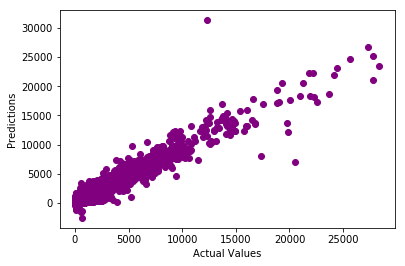

In [19]:
sgd_reg = SGDRegressor(alpha=0.001, learning_rate = 'optimal',loss='epsilon_insensitive', penalty = 'l1')
sgd_reg.fit(X_trainfinal, y_trainfinal)
predictions = sgd_reg.predict(X_testfinal)
plt.scatter(y_testfinal, predictions, color='purple')
plt.xlabel("Actual Values")
plt.ylabel("Predictions");

##### - <font color = blue> Calculating RMSE for SGD Regressor

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt
sgd_reg = SGDRegressor(alpha=0.001, learning_rate = 'optimal',loss='epsilon_insensitive', penalty = 'l1')
sgd_reg.fit(X_trainfinal, y_trainfinal)
predictions = sgd_reg.predict(X_testfinal)
rmse= sqrt(mean_squared_error(y_testfinal, predictions))
rmse

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='epsilon_insensitive', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l1', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

145.64201838789847

##### - <font color = blue> Cross Validation Score for SGD Regressor

In [21]:
from sklearn.model_selection import cross_val_score
sgd_reg = SGDRegressor(alpha=0.001, learning_rate = 'optimal',loss='epsilon_insensitive', penalty = 'l1')
scoresSGD = cross_val_score(sgd_reg, X_trainfinal, y_trainfinal, cv=5)
print("Cross validation scores: {}".format(scoresSGD))
print("Average cross-validation score: {}".format(scoresSGD.mean()))

Cross validation scores: [0.93660517 0.9421961  0.90948758 0.89543169 0.94869037]
Average cross-validation score: 0.9264821822380472


In [25]:
sgd_reg = SGDRegressor(alpha=0.001, learning_rate = 'optimal',loss='epsilon_insensitive', penalty = 'l1')
sgd_reg.fit(X_trainfinal, y_trainfinal)
print('R-squared score for training: {}'
     .format(sgd_reg.score(X_trainfinal, y_trainfinal)))
print('R-squared score for test): {}'
     .format(sgd_reg.score(X_testfinal, y_testfinal)))

SGDRegressor(alpha=0.001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='epsilon_insensitive', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l1', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

R-squared score for training: 0.9264745871780758
R-squared score for test): 0.9416175817143546


In [34]:
predictions = sgd_reg.predict(X_testfinal)

### <font color=blue> Our selected model works quite well with our full data! The test and training R-squared scores for SGD regressor when working with the full data set are 0.9264745871780758 and 0.9416175817143546 respectively.